## Загрузка данных

In [1]:
!pip install -U numpy -q
!pip install matplotlib==3.7.3 -q
!pip install -U numba -q 
!pip install -U phik -q
!pip install -U shap -q
!pip install  -U 'scikit-learn'
import sklearn 
sklearn.__version__

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
matplotlib 3.7.3 requires numpy<2,>=1.20, but you have numpy 2.0.2 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.26.4 which is incompatible.


'1.6.0'

In [368]:
import pandas as pd
import pylab as pb 
import seaborn as sns 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
import scipy.stats as st 
import numpy as np
import warnings
import matplotlib.pyplot as pb
warnings.filterwarnings("ignore", "DeprecationWarning")
warnings.filterwarnings("ignore", "UserWarning")
warnings.filterwarnings('ignore')
import phik
import shap

In [3]:
df_file = pd.read_csv('/datasets/market_file.csv')
df_mark_money = pd.read_csv('/datasets/market_money.csv')
df_time = pd.read_csv('/datasets/market_time.csv')
df_money = pd.read_csv('/datasets/money.csv', sep=';')

In [4]:
display(df_file.head())
display(df_mark_money.head())
display(df_time.head())
display(df_money.head())

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

id Прибыль
0  215348    0,98
1  215349    4,16
2  215350    3,13
3  215351    4,87
4  215352    4,21

In [5]:
display(df_file.info())
display(df_mark_money.info())
display(df_time.info())
display(df_money.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


None

In [6]:
display(df_file.describe())
display(df_mark_money.describe())
display(df_time.describe())
display(df_money.describe())

id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count    1300.000000         1300.000000           1300.000000   1300.000000   
mean   215997.500000            4.253769              4.011538    601.898462   
std       375.421985            1.014814              0.696868    249.856289   
min    215348.000000            0.900000              3.000000    110.000000   
25%    215672.750000            3.700000              4.000000    405.500000   
50%    215997.500000            4.200000              4.000000    606.000000   
75%    216322.250000            4.900000              4.000000    806.000000   
max    216647.000000            6.600000              5.000000   1079.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count        1300.000000                           1300.00000   
mean            0.319808                              3.27000   
std             0.249843                              1.35535   
min             0.000000                              1.00000   
25%             0.170000                              2.00000   
50%             0.240000                              3.00000   
75%             0.300000                              4.00000   
max             0.990000                              6.00000   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
count                         1300.000000     1300.000000       1300.000000  
mean                             2.840000        4.185385          8.176923  
std                              1.971451        1.955298          3.978126  
min                              0.000000        0.000000          1.000000  
25%                              1.000000        3.000000          5.000000  
50%                              3.000000        4.000000          8.000000  
75%                              4.000000        6.000000         11.000000  
max                             10.000000        9.000000         20.000000

id        Выручка
count    3900.000000    3900.000000
mean   215997.500000    5025.696051
std       375.325686    1777.704104
min    215348.000000       0.000000
25%    215672.750000    4590.150000
50%    215997.500000    4957.500000
75%    216322.250000    5363.000000
max    216647.000000  106862.200000

id        минут
count    2600.000000  2600.000000
mean   215997.500000    13.336154
std       375.349754     4.080198
min    215348.000000     4.000000
25%    215672.750000    10.000000
50%    215997.500000    13.000000
75%    216322.250000    16.000000
max    216647.000000    23.000000

id
count    1300.000000
mean   215997.500000
std       375.421985
min    215348.000000
25%    215672.750000
50%    215997.500000
75%    216322.250000
max    216647.000000

## Предобработка данных

План по выполнению пункта предобработки данных :

1. Проверить датафреймы на наличие пропусков и дубликатов, обработать их; 
2. При необходимости устранить все несоответсвия; 
3. Привести названия колонок к удобному виду. 

In [7]:
display(df_file.duplicated().sum())
display(df_mark_money.duplicated().sum())
display(df_time.duplicated().sum())
display(df_money.duplicated().sum())

0

0

0

0

In [8]:
display(df_file.isna().sum())
display(df_mark_money.isna().sum())
display(df_time.isna().sum())
display(df_money.isna().sum())

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

id         0
Период     0
Выручка    0
dtype: int64

id        0
Период    0
минут     0
dtype: int64

id         0
Прибыль    0
dtype: int64

In [9]:
display(df_file.columns)
display(df_mark_money.columns)
display(df_time.columns)
display(df_money.columns)

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

Index(['id', 'Период', 'Выручка'], dtype='object')

Index(['id', 'Период', 'минут'], dtype='object')

Index(['id', 'Прибыль'], dtype='object')

Колонки для редактирования: Покупательская активность', 'Тип сервиса', 'Разрешить сообщать' добавить вместо " " - "_". 

Также необходимо привести все колонки к нижнему регистру.  

In [10]:
def sweet_col(df): 
    for col in df.columns:
        new_col = col
        if ' ' in new_col:
            new_col = new_col.replace(' ', '_')
        new_col = new_col.lower()
        df.rename(columns={col : new_col}, inplace=True)
    return df
    
df_file = sweet_col(df_file)
df_mark_money = sweet_col(df_mark_money)
df_time = sweet_col(df_time)
df_money = sweet_col(df_money)

display(df_file.columns)
display(df_mark_money.columns)
display(df_time.columns)
display(df_money.columns)

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

Index(['id', 'период', 'выручка'], dtype='object')

Index(['id', 'период', 'минут'], dtype='object')

Index(['id', 'прибыль'], dtype='object')

Далее будет проведена проверка на наличие неявных дубликатов и приведения к необходимому типу данных в случае необходимости.

In [11]:
def check_dtype(df):
    for col in df.columns: 
        if df[col].dtype == 'O':
            print(f'Тип данных объект у колонки - {col}, уникальные значения:{df[col].unique()}')

In [12]:
check_dtype(df_file)

Тип данных объект у колонки - покупательская_активность, уникальные значения:['Снизилась' 'Прежний уровень']
Тип данных объект у колонки - тип_сервиса, уникальные значения:['премиум' 'стандартт' 'стандарт']
Тип данных объект у колонки - разрешить_сообщать, уникальные значения:['да' 'нет']
Тип данных объект у колонки - популярная_категория, уникальные значения:['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [13]:
check_dtype(df_mark_money)

Тип данных объект у колонки - период, уникальные значения:['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


In [14]:
check_dtype(df_time)

Тип данных объект у колонки - период, уникальные значения:['текущий_месяц' 'предыдцщий_месяц']


In [15]:
check_dtype(df_money)

Тип данных объект у колонки - прибыль, уникальные значения:['0,98' '4,16' '3,13' '4,87' '4,21' '3,95' '3,62' '5,26' '4,93' '4,66'
 '3,06' '5,08' '4,55' '4,03' '3,49' '1,83' '2,67' '3,65' '2,95' '3,03'
 '6,27' '3,86' '2,82' '1,4' '1,63' '3,69' '4,08' '4,18' '4,26' '4,27'
 '4,42' '3,88' '2,42' '4,78' '4,85' '4,05' '3,48' '5,16' '4,6' '5,7'
 '5,44' '4,1' '2,93' '3,9' '3,28' '5,09' '3,19' '4,77' '5,01' '6,73'
 '7,43' '4,28' '3,73' '3,38' '3,47' '5' '2,02' '3,68' '2,68' '4,46' '2,41'
 '5,4' '3,4' '4,22' '4,5' '4,98' '3,96' '3,18' '4,65' '3,92' '3,89' '5,64'
 '2,76' '4,25' '3,71' '4,63' '2,97' '3,24' '3,81' '4,04' '6,33' '4,68'
 '3,6' '3,04' '4,41' '3,98' '2,47' '4,52' '4,01' '5,31' '2,53' '5,83'
 '4,48' '2,98' '4,92' '3,08' '4,9' '3,94' '2,99' '4,62' '3,76' '3,42'
 '4,17' '4,47' '4,69' '4,59' '2,84' '3,66' '4,97' '2,19' '2,74' '5,41'
 '4,12' '3,93' '5,02' '3,52' '3,39' '6,12' '4,64' '3,14' '4,71' '4,99'
 '3,74' '4' '5,23' '2,08' '6,55' '2,36' '4,32' '3,15' '2,77' '5,56' '3,44'
 '3,58' '2,92

### __Обработка данных df_file__

У данного датафрейма в колонке - тип_сервиса, уникальные значения:[`премиум` `стандартт` `стандарт`]
`стандартт` необходимо заменить на `стандарт`.

In [16]:
df_file['тип_сервиса'] = df_file['тип_сервиса'].str.lower().replace('стандартт', 'стандарт')

### __Обработка данных df_time__

У данного датафрейма в колонке - период, уникальные значения:[`текущий_месяц` `предыдцщий_месяц`]. 
Здесь небольшая опечатка, предлагается поправить с `предыдцщий_месяц` на `предыдущий_месяц`.


In [17]:
df_time['период'] = df_time['период'].str.lower().replace('предыдцщий_месяц', 'предыдущий_месяц')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> Ошибки в данных исправлены.

### __Обработка данных df_money__

Тип данных объект у колонки - прибыль разделен `,` предлаегается привести в числу с плавающей точкой


In [18]:
def set_float_type(df: pd.DataFrame, col: str): 
    df[col] = df[col].apply(lambda x : x.replace(',', '.'))
    df[col] = df[col].astype(float)
    return df 
df_money = set_float_type(df_money, 'прибыль')
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Вывод по предобработке данных: 

- У датафреймов `df_file`, `df_mark_money`, `df_time`, `df_money` отуствуют явные дубликаты;
- У датафреймов `df_file`, `df_mark_money`, `df_time`, `df_money` отуствуют пропуски; 
- у датафрейма df_file в колонке `тип_сервиса` присутсвовал неявный дубликат `стандартт` который был заменён на `стандарт`; 
- у датафрейма df_mark_money в колонке `период` присутсвовал неявный дубликат `препредыдущий_месяц` который был заменён на `предыдущий_месяц`; 
- у датафрейма df_time в колонке `период` присутсвовал неявный дубликат `предыдцщий_месяц` который был заменён на `предыдущий_месяц`; 
- у датафрейма `df_money` в значениях колонки `прибыль` присутствовала `,` она была заменена на `.` и тип данных колонки был заменён на `float64`.  

## Исследовательский анализ данных

План по выполнению пункта исследовательского анализа данных:
- Провести статистический анализ всех признаков и всех таблиц; 
- Построить графики для каждого признака; 
- Отобрать клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период; 
- Сделайть выводы о данных.


### __Исследовательский анализ df_file__

In [19]:
display(df_file.info())
display(df_file.describe().T)
display(df_file.head())
display(df_file.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

None

count           mean         std  \
id                                   1300.0  215997.500000  375.421985   
маркет_актив_6_мес                   1300.0       4.253769    1.014814   
маркет_актив_тек_мес                 1300.0       4.011538    0.696868   
длительность                         1300.0     601.898462  249.856289   
акционные_покупки                    1300.0       0.319808    0.249843   
средний_просмотр_категорий_за_визит  1300.0       3.270000    1.355350   
неоплаченные_продукты_штук_квартал   1300.0       2.840000    1.971451   
ошибка_сервиса                       1300.0       4.185385    1.955298   
страниц_за_визит                     1300.0       8.176923    3.978126   

                                          min        25%        50%  \
id                                   215348.0  215672.75  215997.50   
маркет_актив_6_мес                        0.9       3.70       4.20   
маркет_актив_тек_мес                      3.0       4.00       4.00   
длительность                            110.0     405.50     606.00   
акционные_покупки                         0.0       0.17       0.24   
средний_просмотр_категорий_за_визит       1.0       2.00       3.00   
неоплаченные_продукты_штук_квартал        0.0       1.00       3.00   
ошибка_сервиса                            0.0       3.00       4.00   
страниц_за_визит                          1.0       5.00       8.00   

                                           75%        max  
id                                   216322.25  216647.00  
маркет_актив_6_мес                        4.90       6.60  
маркет_актив_тек_мес                      4.00       5.00  
длительность                            806.00    1079.00  
акционные_покупки                         0.30       0.99  
средний_просмотр_категорий_за_визит       4.00       6.00  
неоплаченные_продукты_штук_квартал        4.00      10.00  
ошибка_сервиса                            6.00       9.00  
страниц_за_визит                         11.00      20.00

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

__Колонка `покупательская_активность`__

Прежний уровень    802
Снизилась          498
Name: покупательская_активность, dtype: int64

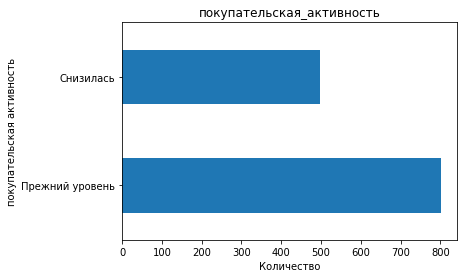

In [20]:
display(df_file['покупательская_активность'].value_counts())
df_file['покупательская_активность'].value_counts().plot.barh(title="покупательская_активность")
pb.xlabel("Количество")
pb.ylabel('покупательская активность')
pb.show()

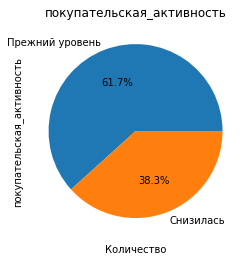

In [21]:
df_file['покупательская_активность'].value_counts().plot.pie(title="покупательская_активность", autopct='%1.1f%%')
pb.xlabel("Количество")
pb.ylabel('покупательская_активность')
pb.show()

#### ___Описание колонки `покупательская_активность`:___

- Распределение неравномерное;
- У 61.7 % пользователей покупательская активность осталась на прежнем уровне, а у 38.3 % пользователей снизилась. 

__Колонка `тип_сервиса`__

стандарт    924
премиум     376
Name: тип_сервиса, dtype: int64

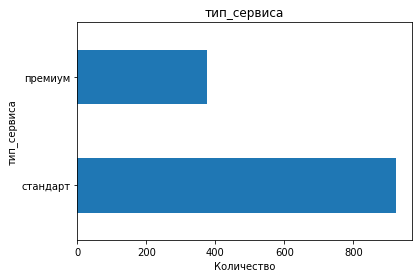

In [22]:
display(df_file['тип_сервиса'].value_counts())
df_file['тип_сервиса'].value_counts().plot.barh(title="тип_сервиса")
pb.ylabel('тип_сервиса')
pb.xlabel("Количество")
pb.show()

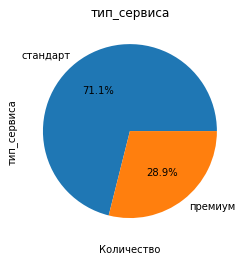

In [23]:
df_file['тип_сервиса'].value_counts().plot.pie(title="тип_сервиса", autopct='%1.1f%%')
pb.ylabel('тип_сервиса')
pb.xlabel("Количество")
pb.show()

#### ___Описание колонки `тип_сервиса`:___

- Распределение неравномерное;
- У 71.1 % пользователей сервис типа `стандарт`, а у 28.9 % пользователей `премиум`. 

__Колонка `разрешить_сообщать`__

да     962
нет    338
Name: разрешить_сообщать, dtype: int64

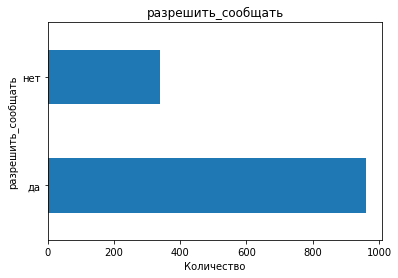

In [24]:
display(df_file['разрешить_сообщать'].value_counts())
df_file['разрешить_сообщать'].value_counts().plot.barh(title="разрешить_сообщать")
pb.ylabel('разрешить_сообщать')
pb.xlabel("Количество")
pb.show()

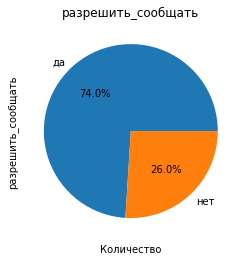

In [25]:
df_file['разрешить_сообщать'].value_counts().plot.pie(title="разрешить_сообщать", autopct='%1.1f%%')
pb.xlabel("Количество")
pb.ylabel('разрешить_сообщать')
pb.show()

#### ___Описание колонки `разрешить_сообщать`:___
- Распределение неравномерное;
- 74 % пользователей можно присылать дополнительные предложения о товаре `да`, а у 26 % пользователей `нет`. 

__Колонка `маркет_актив_6_мес`__

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64

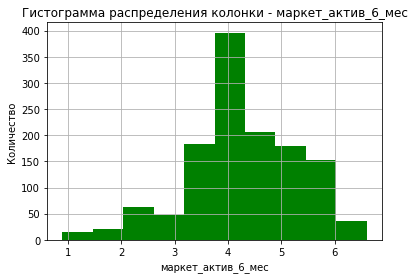

In [26]:
display(df_file['маркет_актив_6_мес'].describe())
df_file['маркет_актив_6_мес'].hist(color='g')
pb.title("ежемесячная зарплата сотрудника")
pb.xlabel("маркет_актив_6_мес")
pb.ylabel("Количество")
pb.show()

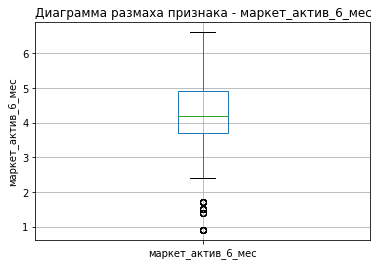

In [27]:
df_file.boxplot(column='маркет_актив_6_мес')
pb.title("Диаграмма размаха признака - маркет_актив_6_мес")
pb.ylabel("маркет_актив_6_мес")
pb.show()

In [28]:
count_anomaly_mark = df_file[df_file['маркет_актив_6_мес'] < 2]
display(len(count_anomaly_mark))
display(len(count_anomaly_mark)/ len(df_file))

36

0.027692307692307693

#### ___Описание колонки `маркет_актив_6_мес`:___
- По гистограмме колонка немного скошенна влево; 
- Медианное значение 4.2; 
- В колонке присутствует 36 анамольно низких значений что состовляет `0.027` % от выборки. 

|Показатели       |   маркет_актив_6_мес |
|:------|---------------------:|
| count |           1300       |
| mean  |              4.25377 |
| std   |              1.01481 |
| min   |              0.9     |
| 25%   |              3.7     |
| 50%   |              4.2     |
| 75%   |              4.9     |
| max   |              6.6     |


__Колонка `маркет_актив_тек_мес`__

4    669
5    323
3    308
Name: маркет_актив_тек_мес, dtype: int64

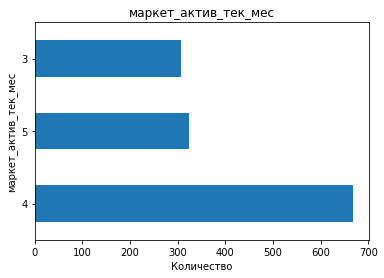

In [29]:
display(df_file['маркет_актив_тек_мес'].value_counts())
df_file['маркет_актив_тек_мес'].value_counts().plot.barh(title="маркет_актив_тек_мес")
pb.ylabel('маркет_актив_тек_мес')
pb.xlabel("Количество")
pb.show()

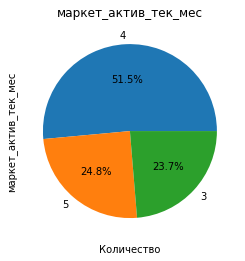

In [30]:
df_file['маркет_актив_тек_мес'].value_counts().plot.pie(title="маркет_актив_тек_мес", autopct='%1.1f%%')
pb.ylabel('маркет_актив_тек_мес')
pb.xlabel("Количество")
pb.show()

#### ___Описание колонки `маркет_актив_тек_мес`:___
- Распределение неравномерное, однако количество маркетинговых коммуникаций: `5` и `3` очень близки;
- количество маркетинговых коммуникаций разделено на три группы: `5`(24.8%), `4`(51.5%), `3`(23.7%). 

__Колонка `длительность`__

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64

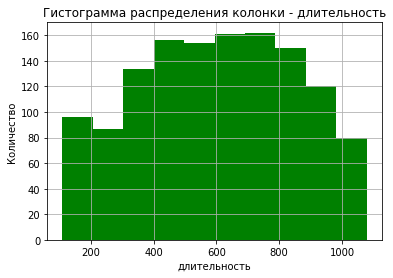

In [31]:
display(df_file['длительность'].describe())
df_file['длительность'].hist(color='g')
pb.title("Гистограмма распределения колонки - длительность")
pb.xlabel("длительность")
pb.ylabel("Количество")
pb.show()

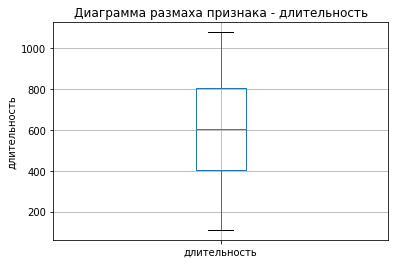

In [32]:
df_file.boxplot(column='длительность')
pb.title("Диаграмма размаха признака - длительность")
pb.ylabel("длительность")
pb.show()

#### ___Описание колонки `длительность`:___
- Гистограмма распределения показывает равномерное распределение;
- В колонке отсутствуют выбросы; 
- Диапазон регистрации пользователей с 110 до 1079 дней, медианое значение 606. 

|Показатель       |   длительность |
|:------|---------------:|
| count |       1300     |
| mean  |        601.898 |
| std   |        249.856 |
| min   |        110     |
| 25%   |        405.5   |
| 50%   |        606     |
| 75%   |        806     |
| max   |       1079     |

__Колонка `акционные_покупки`__

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64

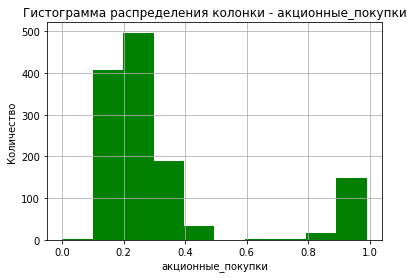

In [33]:
display(df_file['акционные_покупки'].describe())
df_file['акционные_покупки'].hist(color='g')
pb.title("Гистограмма распределения колонки - акционные_покупки")
pb.xlabel("акционные_покупки")
pb.ylabel("Количество")
pb.show()

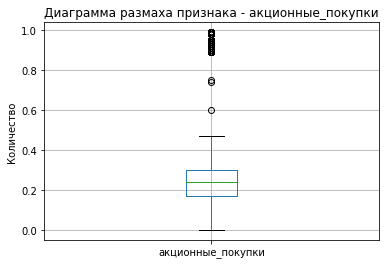

In [34]:
df_file.boxplot(column='акционные_покупки')
pb.title("Диаграмма размаха признака - акционные_покупки")
pb.ylabel("Количество")
pb.show()

In [35]:
len(df_file[df_file['акционные_покупки'] > 0.5])

168

#### ___Описание колонки `акционные_покупки`:___
Данную колонку возможно имеет смысл перевести категориальный признак, прослеживается две группы пользователей на гистограмме рис ниже 

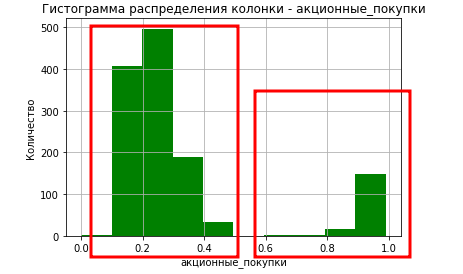


Хотя также видно что группа пользователей которая совершает акционные покупки меньше.

__Колонка `популярная_категория`__

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64

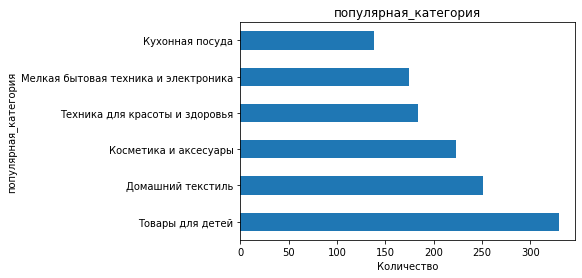

In [36]:
display(df_file['популярная_категория'].value_counts())
df_file['популярная_категория'].value_counts().plot.barh(title="популярная_категория")
pb.ylabel('популярная_категория')
pb.xlabel("Количество")
pb.show()

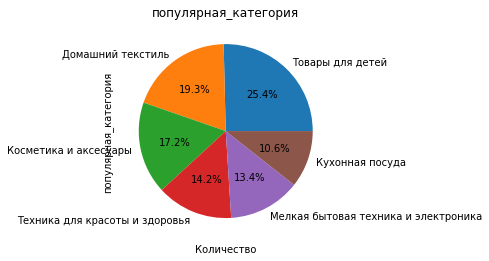

In [37]:
df_file['популярная_категория'].value_counts().plot.pie(title="популярная_категория", autopct='%1.1f%%')
pb.ylabel('популярная_категория')
pb.xlabel("Количество")
pb.show()

#### ___Описание колонки `популярная_категория`:___
- Колонка относительно нормально распределенна; 
- Товары для детей являются самыми многочисленными за последние 6 мес. и составляют 25.4 % от общего числа.

|      популярная_категория            | Количество             |
|:-------------------------------------|-----------------------:|
| Товары для детей                     |                    330 |
| Домашний текстиль                    |                    251 |
| Косметика и аксесуары                |                    223 |
| Техника для красоты и здоровья       |                    184 |
| Мелкая бытовая техника и электроника |                    174 |
| Кухонная посуда                      |                    138 |

__Колонка `средний_просмотр_категорий_за_визит`__

3    356
2    312
4    263
5    177
1    106
6     86
Name: средний_просмотр_категорий_за_визит, dtype: int64

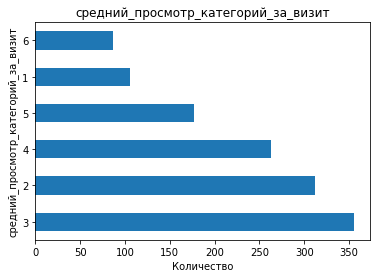

In [38]:
display(df_file['средний_просмотр_категорий_за_визит'].value_counts())
df_file['средний_просмотр_категорий_за_визит'].value_counts().plot.barh(title="средний_просмотр_категорий_за_визит")
pb.ylabel('средний_просмотр_категорий_за_визит')
pb.xlabel("Количество")
pb.show()

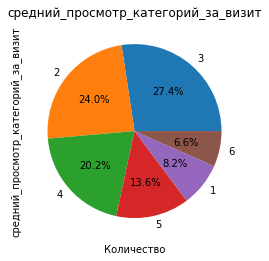

In [39]:
df_file['средний_просмотр_категорий_за_визит'].value_counts().plot.pie(title="средний_просмотр_категорий_за_визит", 
                                                                       autopct='%1.1f%%')
pb.ylabel('средний_просмотр_категорий_за_визит')
pb.xlabel("Количество")
pb.show()

#### ___Описание колонки `средний_просмотр_категорий_за_визит`:___
- Наиболее многочисленая категория  `3` и составляет 27.4 %; 
- В среднем видно небольшую тенденцию что пользователи больше всего смотрят `2`(24%), `3`( 27.4%), `4`(20.2%) категории товаров и меньше всего `5`(13.6%), `6`(8.2%) и `1`(6.6%).  

| Количество просмотренных категорий   |   средний_просмотр_категорий_за_визит |    средний_просмотр_категорий_за_визит в %       |
|---:|--------------------------------------:|----------:|
|  3 |                                   356 |    27.4%  |
|  2 |                                   312 |    24%    |
|  4 |                                   263 |    20.2%  |
|  5 |                                   177 |    13.6%  |
|  1 |                                   106 |    8.2%   |
|  6 |                                    86 |    6.6%   |


__Колонка `неоплаченные_продукты_штук_квартал`__

1     261
2     261
3     218
4     197
5     135
0     116
6      44
7      34
8      20
9      10
10      4
Name: неоплаченные_продукты_штук_квартал, dtype: int64

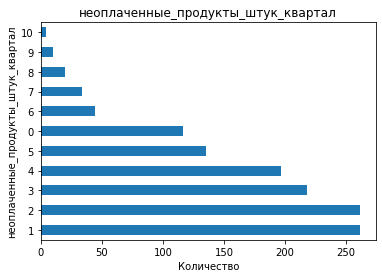

In [40]:
display(df_file['неоплаченные_продукты_штук_квартал'].value_counts())
df_file['неоплаченные_продукты_штук_квартал'].value_counts().plot.barh(title="неоплаченные_продукты_штук_квартал")
pb.ylabel('неоплаченные_продукты_штук_квартал')
pb.xlabel("Количество")
pb.show()

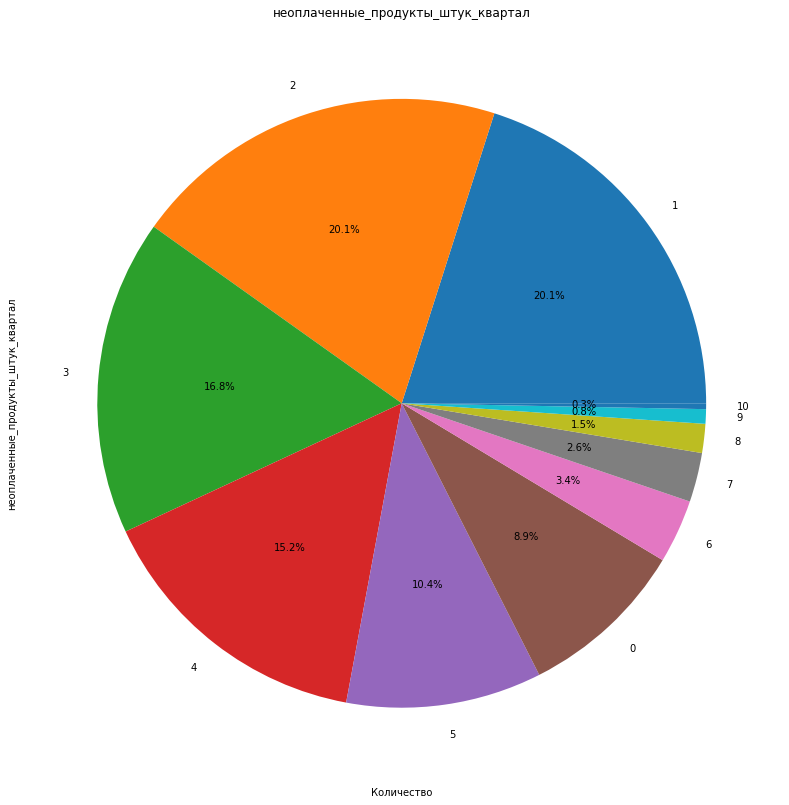

In [41]:
df_file['неоплаченные_продукты_штук_квартал'].value_counts().plot.pie(figsize=(18,14),
                  title="неоплаченные_продукты_штук_квартал", autopct='%1.1f%%')
pb.ylabel('неоплаченные_продукты_штук_квартал')
pb.xlabel("Количество")
pb.show()

#### ___Описание колонки `неоплаченные_продукты_штук_квартал`:___
- Тут показатели данной колонки также можно разделить на большие подгруппы `1`(20.1%) - `4`(15.2%) и `5`(10.4%) - `10`(0.3%); 
- Можно сказать что больше всего польззователи неоплачивают от 1 до 4 товаров за последние три месяца и гараздо реже производят неоплату  от 5 до 10 покупок; 
- Также небольшой процент пользователей не имеет неоплаченных товаров `0`(8.9%). 
| Количество неоплаченных тов   |   неоплаченные_продукты_штук_квартал | неоплаченные_продукты_штук_квартал в %|
|---:|-------------------------------------:|-------------------------------------:|
|  1 |                                  261 |20.1|
|  2 |                                  261 |20.1|
|  3 |                                  218 |16.8|
|  4 |                                  197 |15.2|
|  5 |                                  135 |10.4|
|  0 |                                  116 |8.9|
|  6 |                                   44 |3.4|
|  7 |                                   34 |2.6|
|  8 |                                   20 |1.5|
|  9 |                                   10 |0.8|
| 10 |                                    4 |0.3|




__Колонка `ошибка_сервиса`__

4    257
3    226
5    208
2    189
6    156
7     92
1     74
8     66
0     17
9     15
Name: ошибка_сервиса, dtype: int64

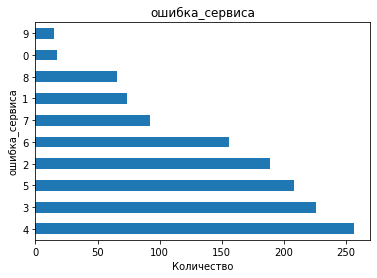

In [42]:
display(df_file['ошибка_сервиса'].value_counts())
df_file['ошибка_сервиса'].value_counts().plot.barh(title="ошибка_сервиса")
pb.ylabel('ошибка_сервиса')
pb.xlabel("Количество")
pb.show()

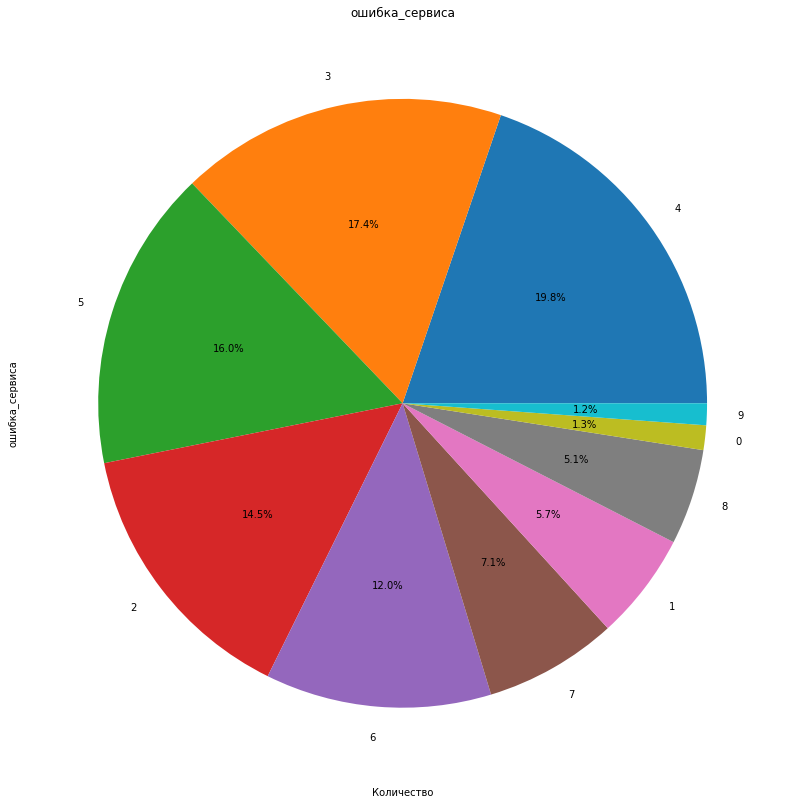

In [43]:
df_file['ошибка_сервиса'].value_counts().plot.pie(figsize=(18,14),
                  title="ошибка_сервиса", autopct='%1.1f%%')
pb.ylabel('ошибка_сервиса')
pb.xlabel("Количество")
pb.show()

#### ___Описание колонки `ошибка_сервиса`:___
- Наибольшое количество сбоев - `4`(19.8%);
- Примечательно что отсутсвие сбоев у пользователей `0` - 1.3%, почти такое же количество с числом сбоев `9` - 1.2%.

| Количество сбоев    |   ошибка_сервиса |    ошибка_сервиса в %         |
|---:|-----------------:|-----------------:|
|  4 |              257 |           19.8      |
|  3 |              226 |           17.4      |
|  5 |              208 |           16        |
|  2 |              189 |           14.5      |
|  6 |              156 |           12        |
|  7 |               92 |           7.1       |
|  1 |               74 |           5.7       |
|  8 |               66 |           5.1       |
|  0 |               17 |           1.3       |
|  9 |               15 |           1.2       |



__Колонка `страниц_за_визит`__

In [44]:
df_file['страниц_за_визит'].value_counts()

6     127
5     115
4     112
8     109
9     108
10    104
7     102
11     92
3      76
12     73
13     61
2      58
14     53
15     36
16     21
1      20
17     19
18      7
19      5
20      2
Name: страниц_за_визит, dtype: int64

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64

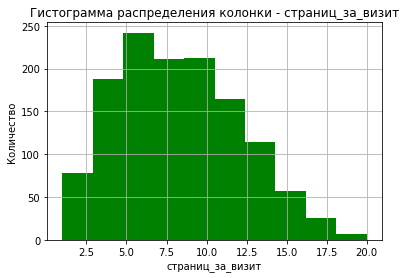

In [45]:
display(df_file['страниц_за_визит'].describe())
df_file['страниц_за_визит'].hist(color='g')
pb.title("Гистограмма распределения колонки - страниц_за_визит")
pb.xlabel("страниц_за_визит")
pb.ylabel("Количество")
pb.show()

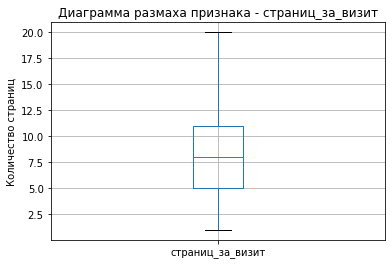

In [46]:
df_file.boxplot(column='страниц_за_визит')
pb.title("Диаграмма размаха признака - страниц_за_визит")
pb.ylabel("Количество страниц")
pb.show()

#### ___Описание колонки `страниц_за_визит`:___
- На гистограмме распределения показатели смещена вправо; 
- Медианое значение: `8`; 
- Минимальное количество посещенных страниц `1`, максимальное `20`; 
- Стандартное распределение - `3.9` страниц. 

|   Показатели    |   страниц_за_визит |
|:------|-------------------:|
| count |         1300       |
| mean  |            8.17692 |
| std   |            3.97813 |
| min   |            1       |
| 25%   |            5       |
| 50%   |            8       |
| 75%   |           11       |
| max   |           20       |




### __Исследовательский анализ df_mark__

In [47]:
display(df_mark_money.info())
display(df_mark_money.describe().T)
display(df_mark_money.head())
display(df_mark_money.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

count           mean          std       min        25%       50%  \
id       3900.0  215997.500000   375.325686  215348.0  215672.75  215997.5   
выручка  3900.0    5025.696051  1777.704104       0.0    4590.15    4957.5   

               75%       max  
id       216322.25  216647.0  
выручка    5363.00  106862.2

id               период  выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

Index(['id', 'период', 'выручка'], dtype='object')

__Колонка `период`__

предыдущий_месяц       1300
препредыдущий_месяц    1300
текущий_месяц          1300
Name: период, dtype: int64

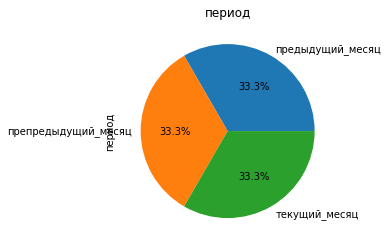

In [48]:
display(df_mark_money['период'].value_counts())
df_mark_money['период'].value_counts().plot.pie(title="период", autopct='%1.1f%%')
pb.show()

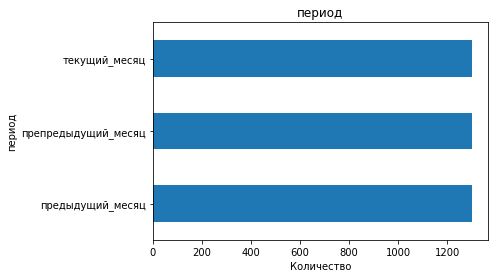

In [49]:
df_mark_money['период'].value_counts().plot.barh(title="период")
pb.ylabel('период')
pb.xlabel("Количество")
pb.show()

#### ___Описание колонки `период`:___
- Данные о периоде равномерно распределенны по 1200 наблюдений;

__Колонка `выручка`__

In [50]:
display(df_mark_money['выручка'].describe())

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64

In [51]:
df_mark_money[df_mark_money['выручка'] == 0]

id               период  выручка
0   215348  препредыдущий_месяц      0.0
2   215348     предыдущий_месяц      0.0
28  215357  препредыдущий_месяц      0.0
29  215357     предыдущий_месяц      0.0
34  215359     предыдущий_месяц      0.0
35  215359  препредыдущий_месяц      0.0

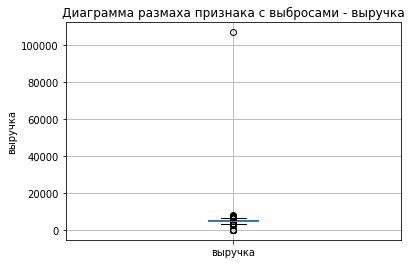

In [52]:
df_mark_money.boxplot(column='выручка')
pb.title("Диаграмма размаха признака с выбросами - выручка")
pb.ylabel("выручка")
pb.show()

In [53]:
df_mark_money_cp = df_mark_money[(df_mark_money['выручка'] < 100000) &\
                                 (df_mark_money['выручка'] > 0)]
display(df_mark_money_cp['выручка'].describe())

count    3893.000000
mean     5007.282918
std       679.724898
min      2758.700000
25%      4592.000000
50%      4959.000000
75%      5363.000000
max      7799.400000
Name: выручка, dtype: float64

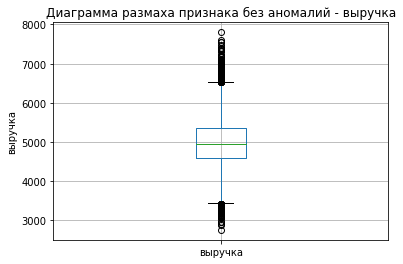

In [54]:
df_mark_money_cp.boxplot(column='выручка')
pb.title("Диаграмма размаха признака без аномалий - выручка")
pb.ylabel("выручка")
pb.show()

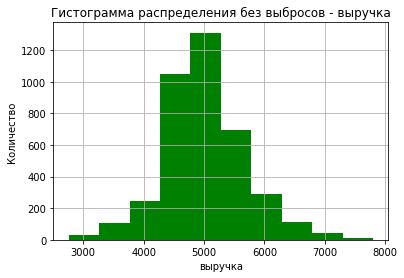

In [55]:
df_mark_money_cp['выручка'].hist(color='g')
pb.title("Гистограмма распределения без выбросов - выручка")
pb.xlabel("выручка")
pb.ylabel("Количество")
pb.show()

#### ___Описание колонки `выручка`:___
- В колонки присутсвуют нулевые значения, тоесть у определенных покупателей нет покупок; 
- Также присутствует выброс: один из покупателей потратил 106862 руб; 
- Если убрать нулевые и аномальный выброс гистограмма вуручки распределенна нормально;
- медианная выручка - 4957 руб. 



__Исследование колонки `выручка` за три месяца:__


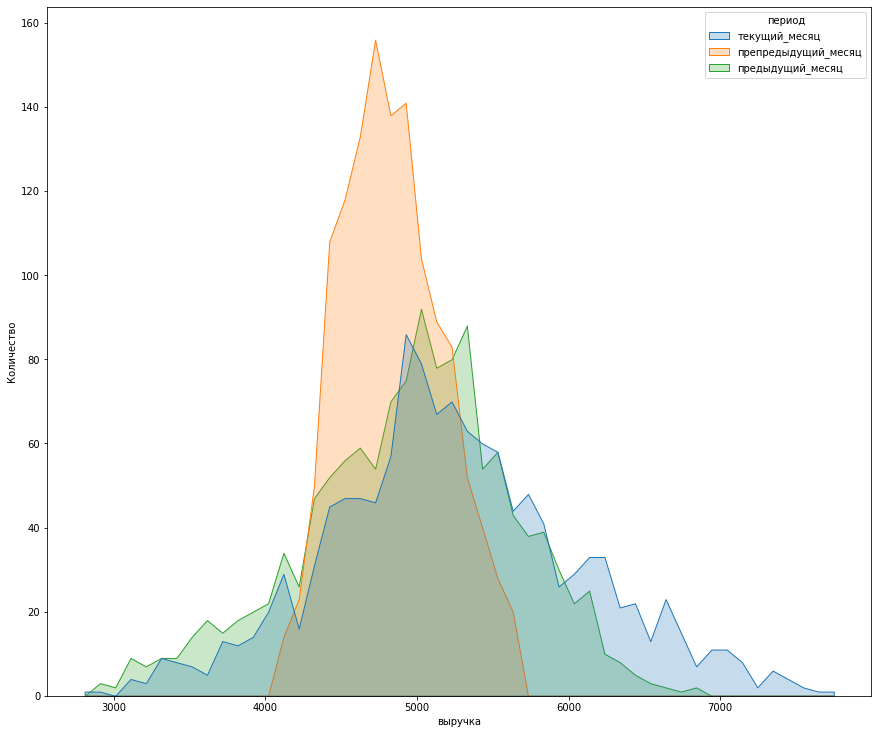

In [56]:
fig, ax = pb.subplots(figsize=(12, 10))
sns.histplot(data=df_mark_money_cp, x="выручка", hue="период", element="poly", bins=50)
ax.set(ylabel='Количество')
pb.tight_layout(pad=0)

In [57]:
df_mark_money_cp.groupby('период').agg('выручка').median()

период
предыдущий_месяц       5005.5
препредыдущий_месяц    4812.0
текущий_месяц          5179.6
Name: выручка, dtype: float64

In [58]:
df_mark_money_cp.groupby('период').agg('выручка').mean()

период
предыдущий_месяц       4948.339630
препредыдущий_месяц    4836.367772
текущий_месяц          5236.787452
Name: выручка, dtype: float64

In [59]:
df_mark_money_cp_new = df_mark_money_cp.copy()
df_mark_money_cp_new['выручка'] = (df_mark_money_cp_new['выручка'] / 100).astype(int)
df_mark_money_cp_new.head()

id               период  выручка
1  215348        текущий_месяц       32
3  215349  препредыдущий_месяц       44
4  215349        текущий_месяц       49
5  215349     предыдущий_месяц       52
6  215350  препредыдущий_месяц       48

In [60]:
df_mark_money_cp_new.query('период == "препредыдущий_месяц"').describe()

id      выручка
count    1297.000000  1297.000000
mean   215998.986893    47.876638
std       374.578554     3.337990
min    215349.000000    40.000000
25%    215675.000000    45.000000
50%    215999.000000    48.000000
75%    216323.000000    50.000000
max    216647.000000    56.000000

In [61]:
df_mark_money_cp_new.query('период == "предыдущий_месяц"').describe()

id      выручка
count    1297.000000  1297.000000
mean   215998.986893    48.993832
std       374.578554     7.015962
min    215349.000000    28.000000
25%    215675.000000    44.000000
50%    215999.000000    50.000000
75%    216323.000000    54.000000
max    216647.000000    68.000000

In [62]:
df_mark_money_cp_new.query('период == "текущий_месяц"').describe()

id      выручка
count    1299.000000  1299.000000
mean   215997.975366    51.866821
std       375.174972     8.373962
min    215348.000000    27.000000
25%    215673.500000    47.000000
50%    215998.000000    51.000000
75%    216322.500000    57.000000
max    216647.000000    77.000000

In [63]:
df_mark_money_cp.groupby('период').agg('выручка').sum()

период
предыдущий_месяц       6417996.5
препредыдущий_месяц    6272769.0
текущий_месяц          6802586.9
Name: выручка, dtype: float64

#### __Описание исследования колонки `выручка` за три месяца:__

Средний и медианный объём выручки растёт от месяца к месяцу, но стоит отметить что в 

- `препредыдущий_месяц` диапазон выручки сегментируется в диапазоне примерно от 4000 до 5600;
- `предыдущий_месяц` диапазон выручки сегментируется в диапазоне примерно от 2800 до 6800;
- `текущий_месяц` диапазон выручки сегментируется в диапазоне примерно от 2700 до 7700.

Также растёт и общая сумма покупок:

| период              |     выручка |
|:--------------------|------------:|
| препредыдущий_месяц |  6272769.0  |
| предыдущий_месяц    |  6417996.5  |
| текущий_месяц       |  6802586.9  |

### __Исследовательский анализ df_time__ 

In [64]:
display(df_time.info())
display(df_time.describe().T)
display(df_time.head())
display(df_time.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

count           mean         std       min        25%       50%  \
id     2600.0  215997.500000  375.349754  215348.0  215672.75  215997.5   
минут  2600.0      13.336154    4.080198       4.0      10.00      13.0   

             75%       max  
id     216322.25  216647.0  
минут      16.00      23.0

id            период  минут
0  215348     текущий_месяц     14
1  215348  предыдущий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдущий_месяц     12
4  215350     текущий_месяц     13

Index(['id', 'период', 'минут'], dtype='object')

__Колонка `период`__

предыдущий_месяц    1300
текущий_месяц       1300
Name: период, dtype: int64

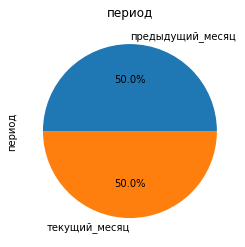

In [65]:
display(df_time['период'].value_counts())
df_time['период'].value_counts().plot.pie(title="период", autopct='%1.1f%%')
pb.show()

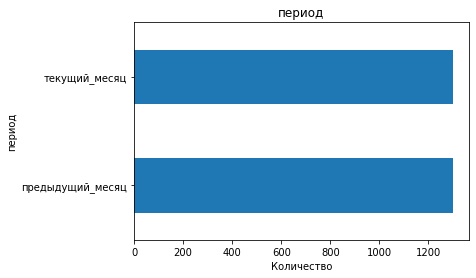

In [66]:
df_time['период'].value_counts().plot.barh(title="период")
pb.xlabel("Количество")
pb.ylabel('период')
pb.show()

#### ___Описание колонки `период`:___
- Данных о предедущем месяце(1300) столько же сколько и в текущем(1300).

__Колонка `минут`__

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

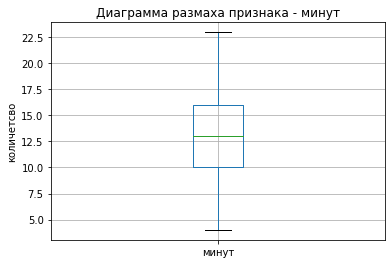

In [67]:
display(df_time['минут'].describe())
df_time.boxplot(column='минут')
pb.title("Диаграмма размаха признака - минут")
pb.ylabel("количетсво")
pb.show()

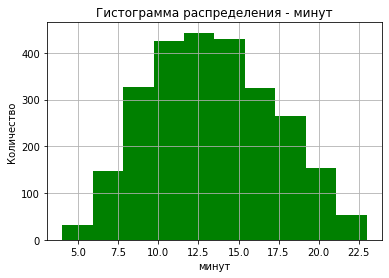

In [68]:
df_time['минут'].hist(color='g')
pb.title("Гистограмма распределения - минут")
pb.xlabel("минут")
pb.ylabel("Количество")
pb.show()

#### ___Описание колонки `минут`:___
- Гистограмма нормально распределена с небольшим скосом вправо; 
- Медианое время проведенное пользователем на сайте 13. 

### __Исследовательский анализ df_money__ 

In [69]:
display(df_money.info())
display(df_money.describe().T)
display(df_money.head())
display(df_money.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

count           mean         std        min        25%         50%  \
id       1300.0  215997.500000  375.421985  215348.00  215672.75  215997.500   
прибыль  1300.0       3.996631    1.013722       0.86       3.30       4.045   

               75%        max  
id       216322.25  216647.00  
прибыль       4.67       7.43

id  прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

Index(['id', 'прибыль'], dtype='object')

__Колонка `прибыль`__

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

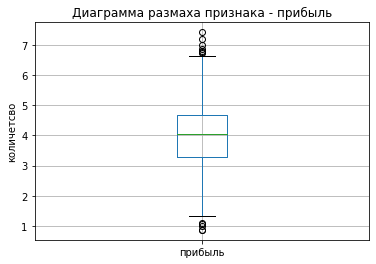

In [70]:
display(df_money['прибыль'].describe())
df_money.boxplot(column='прибыль')
pb.title("Диаграмма размаха признака - прибыль")
pb.ylabel("количетсво")
pb.show()

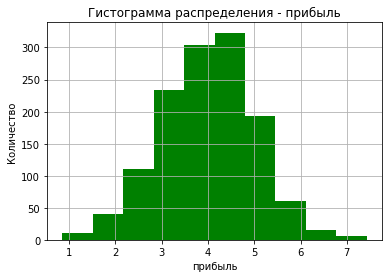

In [71]:
df_money['прибыль'].hist(color='g')
pb.title("Гистограмма распределения - прибыль")
pb.xlabel("прибыль")
pb.ylabel("Количество")
pb.show()

#### ___Описание колонки `прибыль`:___
- Гистограмма нормально распределена с небольшим скосом влево; 
- Медианая прибыль: 4.045. 

### ___Вывод по исследовательскому анализу данных:___

Описание колонок датафрейма _`df_file`_: 

1.1 `покупательская_активность`:

- Распределение неравномерное;
- У 61.7 % пользователей покупательская активность осталась на прежнем уровне, а у 38.3 % пользователей снизилась. 
1.2 `тип_сервиса`:

- Распределение неравномерное;
- У 71.1 % пользователей сервис типа `стандарт`, а у 28.9 % пользователей `премиум`. 

1.3 `разрешить_сообщать`:

- Распределение неравномерное;
- 74 % пользователей можно присылать дополнительные предложения о товаре `да`, а у 26 % пользователей `нет`. 

1.4 `маркет_актив_6_мес`:

- По гистограмме колонка немного скошенна влево; 
- Медианное значение 4.2; 
- В колонке присутствует 36 анамольно низких значений что состовляет `0.027` % от выборки. 

|Показатели       |   маркет_актив_6_мес |
|:------|---------------------:|
| count |           1300       |
| mean  |              4.25377 |
| std   |              1.01481 |
| min   |              0.9     |
| 25%   |              3.7     |
| 50%   |              4.2     |
| 75%   |              4.9     |
| max   |              6.6     |

1.5 `маркет_актив_тек_мес`:

- Распределение неравномерное, однако количество маркетинговых коммуникаций: `5` и `3` очень близки;
- количество маркетинговых коммуникаций разделено на три группы: `5`(24.8%), `4`(51.5%), `3`(23.7%). 

1.6 `длительность`:
- Гистограмма распределения показывает равномерное распределение;
- В колонке отсутствуют выбросы; 
- Диапазон регистрации пользователей с 110 до 1079 дней, медианое значение 606. 

|Показатель       |   длительность |
|:------|---------------:|
| count |       1300     |
| mean  |        601.898 |
| std   |        249.856 |
| min   |        110     |
| 25%   |        405.5   |
| 50%   |        606     |
| 75%   |        806     |
| max   |       1079     |

1.7 `акционные_покупки`:
Данную колонку возможно имеет смысл перевести категориальный признак, прослеживается две группы пользователей на гистограмме рис ниже 

![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png)


Хотя также видно что группа пользователей которая совершает акционные покупки меньше.

1.8  `популярная_категория`:
- Колонка относительно нормально распределенна; 
- Товары для детей являются самыми многочисленными за последние 6 мес. и составляют 25.4 % от общего числа.

|      популярная_категория            | Количество             |
|:-------------------------------------|-----------------------:|
| Товары для детей                     |                    330 |
| Домашний текстиль                    |                    251 |
| Косметика и аксесуары                |                    223 |
| Техника для красоты и здоровья       |                    184 |
| Мелкая бытовая техника и электроника |                    174 |
| Кухонная посуда                      |                    138 |

1.9 `популярная_категория`:
- Наиболее многочисленая категория  `3` и составляет 27.4 %; 
- В среднем видно небольшую тенденцию что пользователи больше всего смотрят `2`(24%), `3`( 27.4%), `4`(20.2%) категории товаров и меньше всего `5`(13.6%), `6`(8.2%) и `1`(6.6%).  

| Количество просмотренных категорий   |   средний_просмотр_категорий_за_визит |    средний_просмотр_категорий_за_визит в %       |
|---:|--------------------------------------:|----------:|
|  3 |                                   356 |    27.4%  |
|  2 |                                   312 |    24%    |
|  4 |                                   263 |    20.2%  |
|  5 |                                   177 |    13.6%  |
|  1 |                                   106 |    8.2%   |
|  6 |                                    86 |    6.6%   |

1.10 `неоплаченные_продукты_штук_квартал`:
- Тут показатели данной колонки также можно разделить на большие подгруппы `1`(20.1%) - `4`(15.2%) и `5`(10.4%) - `10`(0.3%); 
- Можно сказать что больше всего польззователи неоплачивают от 1 до 4 товаров за последние три месяца и гараздо реже производят неоплату  от 5 до 10 покупок; 
- Также небольшой процент пользователей не имеет неоплаченных товаров `0`(8.9%). 
| Количество неоплаченных тов   |   неоплаченные_продукты_штук_квартал | неоплаченные_продукты_штук_квартал в %|
|---:|-------------------------------------:|-------------------------------------:|
|  1 |                                  261 |20.1|
|  2 |                                  261 |20.1|
|  3 |                                  218 |16.8|
|  4 |                                  197 |15.2|
|  5 |                                  135 |10.4|
|  0 |                                  116 |8.9|
|  6 |                                   44 |3.4|
|  7 |                                   34 |2.6|
|  8 |                                   20 |1.5|
|  9 |                                   10 |0.8|
| 10 |                                    4 |0.3|

1.11 `неоплаченные_продукты_штук_квартал`:
- Тут показатели данной колонки также можно разделить на большие подгруппы `1`(20.1%) - `4`(15.2%) и `5`(10.4%) - `10`(0.3%); 
- Можно сказать что больше всего польззователи неоплачивают от 1 до 4 товаров за последние три месяца и гараздо реже производят неоплату  от 5 до 10 покупок; 
- Также небольшой процент пользователей не имеет неоплаченных товаров `0`(8.9%). 
| Количество неоплаченных тов   |   неоплаченные_продукты_штук_квартал | неоплаченные_продукты_штук_квартал в %|
|---:|-------------------------------------:|-------------------------------------:|
|  1 |                                  261 |20.1|
|  2 |                                  261 |20.1|
|  3 |                                  218 |16.8|
|  4 |                                  197 |15.2|
|  5 |                                  135 |10.4|
|  0 |                                  116 |8.9|
|  6 |                                   44 |3.4|
|  7 |                                   34 |2.6|
|  8 |                                   20 |1.5|
|  9 |                                   10 |0.8|
| 10 |                                    4 |0.3|

1.12 `страниц_за_визит`:
- На гистограмме распределения показатели смещена вправо; 
- Медианое значение: `8`; 
- Минимальное количество посещенных страниц `1`, максимальное `20`; 
- Стандартное распределение - `3.9` страниц. 

|   Показатели    |   страниц_за_визит |
|:------|-------------------:|
| count |         1300       |
| mean  |            8.17692 |
| std   |            3.97813 |
| min   |            1       |
| 25%   |            5       |
| 50%   |            8       |
| 75%   |           11       |
| max   |           20       |

Описание колонок датафрейма _`df_mark`_:

2.1 `период`:
- Данные о периоде равномерно распределенны по 1200 наблюдений;

2.2 `выручка`:
- В колонки присутсвуют нулевые значения, тоесть у определенных покупателей нет покупок; 
- Также присутствует выброс: один из покупателей потратил 106862 руб; 
- Если убрать нулевые и аномальный выброс гистограмма вуручки распределенна нормально;
- медианная выручка - 4957 руб. 

2.3 `исследование вуручки за три месяца`

Средний и медианный объём выручки растёт от месяца к месяцу, но стоит отметить что в 

- `препредыдущий_месяц` диапазон выручки сегментируется в диапазоне примерно от 4000 до 5600;
- `предыдущий_месяц` диапазон выручки сегментируется в диапазоне примерно от 2800 до 6800;
- `текущий_месяц` диапазон выручки сегментируется в диапазоне примерно от 2700 до 7700.

Также растёт и общая сумма покупок:

| период              |     выручка |
|:--------------------|------------:|
| препредыдущий_месяц |  6272769.0  |
| предыдущий_месяц    |  6417996.5  |
| текущий_месяц       |  6802586.9  |

Описание колонок датафрейма `df_time`:

3.1 `период`:
- Данных о предедущем месяце(1300) столько же сколько и в текущем(1300).

3.2 `минут`:
- Гистограмма нормально распределена с небольшим скосом вправо; 
- Медианое время проведенное пользователем на сайте 13. 

Описание колонок датафрейма `df_money`:

4.1 `прибыль`:
- Гистограмма нормально распределена с небольшим скосом влево; 
- Медианая прибыль: 4.045. 




## Объединение таблиц

Необходимо учесть, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделать отдельный столбец для каждого периода.

### __pivot_table для df_mark_money_cp__ 

In [72]:
display(df_mark_money_cp.shape)
display(df_file.shape)
display(df_time.shape)

(3893, 3)

(1300, 13)

(2600, 3)

In [73]:
display(df_mark_money_cp.columns)
display(df_file.columns)
display(df_time.columns)

Index(['id', 'период', 'выручка'], dtype='object')

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

Index(['id', 'период', 'минут'], dtype='object')

In [74]:
pivot_mark_money = df_mark_money_cp.pivot_table(index='id', 
                                                columns='период', 
                                               values='выручка', 
                                               aggfunc='sum')
pivot_mark_money = pivot_mark_money.dropna()
display(pivot_mark_money.columns)

Index(['предыдущий_месяц', 'препредыдущий_месяц', 'текущий_месяц'], dtype='object', name='период')

In [75]:
pivot_mark_money.columns = ['предыдущий_месяц_выручка', 
                           'препредыдущий_месяц_выручка', 
                           'текущий_месяц_выручка']
display(pivot_mark_money.isna().sum())

предыдущий_месяц_выручка       0
препредыдущий_месяц_выручка    0
текущий_месяц_выручка          0
dtype: int64

In [76]:
pivot_mark_money.columns

Index(['предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка',
       'текущий_месяц_выручка'],
      dtype='object')

### __pivot_table для df_time__ 

In [77]:
pivot_time = df_time.pivot_table(index='id', 
                                columns='период', 
                                values='минут',
                                aggfunc='sum')

display(pivot_time)
display(pivot_time.columns)
display(pivot_time.isna().sum())


период  предыдущий_месяц  текущий_месяц
id                                     
215348                13             14
215349                12             10
215350                 8             13
215351                11             13
215352                 8             11
...                  ...            ...
216643                14              7
216644                12             11
216645                12             18
216646                18              7
216647                15             10

[1300 rows x 2 columns]

Index(['предыдущий_месяц', 'текущий_месяц'], dtype='object', name='период')

период
предыдущий_месяц    0
текущий_месяц       0
dtype: int64

In [78]:
pivot_time.columns = ['предыдущий_месяц_время', 'текущий_месяц_время']
display(pivot_time.columns)

Index(['предыдущий_месяц_время', 'текущий_месяц_время'], dtype='object')

In [79]:
pivot_time = pivot_time.dropna()
display(pivot_time)

предыдущий_месяц_время  текущий_месяц_время
id                                                 
215348                      13                   14
215349                      12                   10
215350                       8                   13
215351                      11                   13
215352                       8                   11
...                        ...                  ...
216643                      14                    7
216644                      12                   11
216645                      12                   18
216646                      18                    7
216647                      15                   10

[1300 rows x 2 columns]

### __Объеденение pivot_tables с  df_file__ 

In [80]:
df_full = df_file.merge(pivot_mark_money, on='id')
display(df_full.head())
display(df_full.isna().sum())
display(pivot_mark_money.shape)
display(df_full.shape)
display(df_full.head().T)

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   
2  215351                 Снизилась    стандарт                 да   
3  215352                 Снизилась    стандарт                нет   
4  215353                 Снизилась    стандарт                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 4.4                     4           819               0.75   
1                 4.9                     3           539               0.14   
2                 3.2                     5           896               0.99   
3                 5.1                     3          1064               0.94   
4                 3.3                     4           762               0.26   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   предыдущий_месяц_выручка  препредыдущий_месяц_выручка  \
0                    5216.0                       4472.0   
1                    5457.5                       4826.0   
2                    6158.0                       4793.0   
3                    5807.5                       4594.0   
4                    4738.5                       5124.0   

   текущий_месяц_выручка  
0                 4971.6  
1                 5058.4  
2                 6610.4  
3                 5872.5  
4                 5388.5

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
предыдущий_месяц_выручка               0
препредыдущий_месяц_выручка            0
текущий_месяц_выручка                  0
dtype: int64

(1296, 3)

(1296, 16)

0                  1  \
id                                             215349             215350   
покупательская_активность                   Снизилась          Снизилась   
тип_сервиса                                   премиум           стандарт   
разрешить_сообщать                                 да                нет   
маркет_актив_6_мес                                4.4                4.9   
маркет_актив_тек_мес                                4                  3   
длительность                                      819                539   
акционные_покупки                                0.75               0.14   
популярная_категория                 Товары для детей  Домашний текстиль   
средний_просмотр_категорий_за_визит                 4                  5   
неоплаченные_продукты_штук_квартал                  4                  2   
ошибка_сервиса                                      2                  1   
страниц_за_визит                                    5                  5   
предыдущий_месяц_выручка                       5216.0             5457.5   
препредыдущий_месяц_выручка                    4472.0             4826.0   
текущий_месяц_выручка                          4971.6             5058.4   

                                                    2                 3  \
id                                             215351            215352   
покупательская_активность                   Снизилась         Снизилась   
тип_сервиса                                  стандарт          стандарт   
разрешить_сообщать                                 да               нет   
маркет_актив_6_мес                                3.2               5.1   
маркет_актив_тек_мес                                5                 3   
длительность                                      896              1064   
акционные_покупки                                0.99              0.94   
популярная_категория                 Товары для детей  Товары для детей   
средний_просмотр_категорий_за_визит                 5                 3   
неоплаченные_продукты_штук_квартал                  0                 2   
ошибка_сервиса                                      6                 3   
страниц_за_визит                                    4                 2   
предыдущий_месяц_выручка                       6158.0            5807.5   
препредыдущий_месяц_выручка                    4793.0            4594.0   
текущий_месяц_выручка                          6610.4            5872.5   

                                                     4  
id                                              215353  
покупательская_активность                    Снизилась  
тип_сервиса                                   стандарт  
разрешить_сообщать                                  да  
маркет_актив_6_мес                                 3.3  
маркет_актив_тек_мес                                 4  
длительность                                       762  
акционные_покупки                                 0.26  
популярная_категория                 Домашний текстиль  
средний_просмотр_категорий_за_визит                  4  
неоплаченные_продукты_штук_квартал                   1  
ошибка_сервиса                                       1  
страниц_за_визит                                     4  
предыдущий_месяц_выручка                        4738.5  
препредыдущий_месяц_выручка                     5124.0  
текущий_месяц_выручка                           5388.5

In [81]:
df_full = df_full.merge(pivot_time, on='id')
display(df_full.head())
display(df_full.isna().sum())
display(df_time.shape)
display(df_full.shape)
display(df_full.head().T)

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   
2  215351                 Снизилась    стандарт                 да   
3  215352                 Снизилась    стандарт                нет   
4  215353                 Снизилась    стандарт                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 4.4                     4           819               0.75   
1                 4.9                     3           539               0.14   
2                 3.2                     5           896               0.99   
3                 5.1                     3          1064               0.94   
4                 3.3                     4           762               0.26   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   предыдущий_месяц_выручка  препредыдущий_месяц_выручка  \
0                    5216.0                       4472.0   
1                    5457.5                       4826.0   
2                    6158.0                       4793.0   
3                    5807.5                       4594.0   
4                    4738.5                       5124.0   

   текущий_месяц_выручка  предыдущий_месяц_время  текущий_месяц_время  
0                 4971.6                      12                   10  
1                 5058.4                       8                   13  
2                 6610.4                      11                   13  
3                 5872.5                       8                   11  
4                 5388.5                      10                   10

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
предыдущий_месяц_выручка               0
препредыдущий_месяц_выручка            0
текущий_месяц_выручка                  0
предыдущий_месяц_время                 0
текущий_месяц_время                    0
dtype: int64

(2600, 3)

(1296, 18)

0                  1  \
id                                             215349             215350   
покупательская_активность                   Снизилась          Снизилась   
тип_сервиса                                   премиум           стандарт   
разрешить_сообщать                                 да                нет   
маркет_актив_6_мес                                4.4                4.9   
маркет_актив_тек_мес                                4                  3   
длительность                                      819                539   
акционные_покупки                                0.75               0.14   
популярная_категория                 Товары для детей  Домашний текстиль   
средний_просмотр_категорий_за_визит                 4                  5   
неоплаченные_продукты_штук_квартал                  4                  2   
ошибка_сервиса                                      2                  1   
страниц_за_визит                                    5                  5   
предыдущий_месяц_выручка                       5216.0             5457.5   
препредыдущий_месяц_выручка                    4472.0             4826.0   
текущий_месяц_выручка                          4971.6             5058.4   
предыдущий_месяц_время                             12                  8   
текущий_месяц_время                                10                 13   

                                                    2                 3  \
id                                             215351            215352   
покупательская_активность                   Снизилась         Снизилась   
тип_сервиса                                  стандарт          стандарт   
разрешить_сообщать                                 да               нет   
маркет_актив_6_мес                                3.2               5.1   
маркет_актив_тек_мес                                5                 3   
длительность                                      896              1064   
акционные_покупки                                0.99              0.94   
популярная_категория                 Товары для детей  Товары для детей   
средний_просмотр_категорий_за_визит                 5                 3   
неоплаченные_продукты_штук_квартал                  0                 2   
ошибка_сервиса                                      6                 3   
страниц_за_визит                                    4                 2   
предыдущий_месяц_выручка                       6158.0            5807.5   
препредыдущий_месяц_выручка                    4793.0            4594.0   
текущий_месяц_выручка                          6610.4            5872.5   
предыдущий_месяц_время                             11                 8   
текущий_месяц_время                                13                11   

                                                     4  
id                                              215353  
покупательская_активность                    Снизилась  
тип_сервиса                                   стандарт  
разрешить_сообщать                                  да  
маркет_актив_6_мес                                 3.3  
маркет_актив_тек_мес                                 4  
длительность                                       762  
акционные_покупки                                 0.26  
популярная_категория                 Домашний текстиль  
средний_просмотр_категорий_за_визит                  4  
неоплаченные_продукты_штук_квартал                   1  
ошибка_сервиса                                       1  
страниц_за_визит                                     4  
предыдущий_месяц_выручка                        4738.5  
препредыдущий_месяц_выручка                     5124.0  
текущий_месяц_выручка                           5388.5  
предыдущий_месяц_время                              10  
текущий_месяц_время                                 10

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Данные соединены корректно.

## Корреляционный анализ

In [82]:
df_phik = df_full.copy().drop(['id'], axis=1)
df_phik_corr = df_phik.phik_matrix(interval_cols=['предыдущий_месяц_выручка', 
                           'препредыдущий_месяц_выручка', 
                           'текущий_месяц_выручка',
                            'маркет_актив_6_мес',
                            'акционные_покупки', 'длительность'])

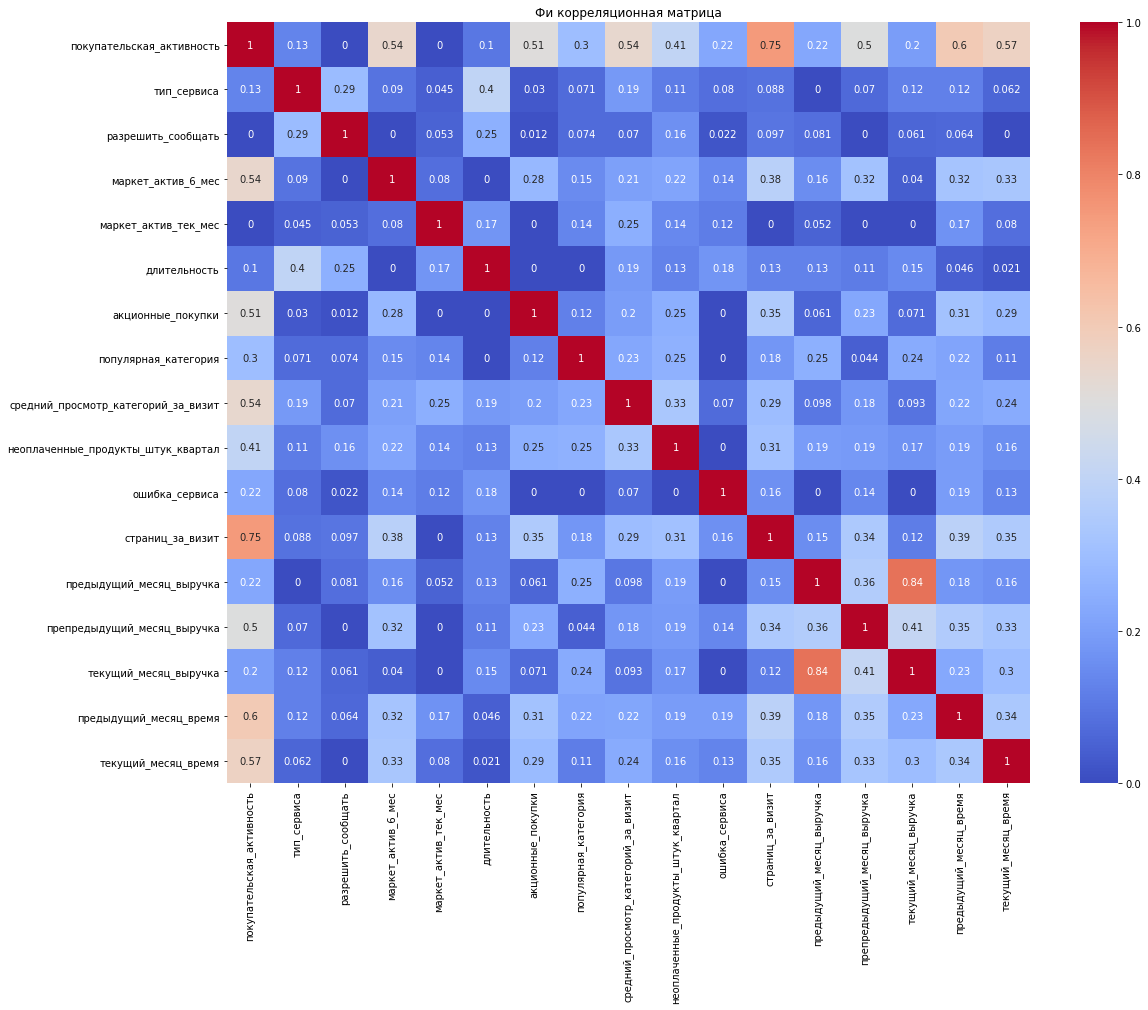

In [83]:
pb.figure(figsize=(18, 14))
sns.heatmap(df_phik_corr, annot=True, cmap='coolwarm')
pb.title('Фи корреляционная матрица')
pb.show()

In [84]:
def get_corr(col:'str', alpha:float=0.5): 
    idx_big_corr = df_phik_corr[col]\
    [df_phik_corr[col] >= alpha].index
    display(idx_big_corr)
    for idx_corr in idx_big_corr: 
        if idx_corr != col:
            value_corr = round(df_phik_corr[col][idx_corr], 2)
            print(f'`{idx_corr}` корреляция больше 0.5 с колонкой `{col}`'\
            f': `{value_corr}`') 

In [85]:
get_corr('покупательская_активность')

Index(['покупательская_активность', 'маркет_актив_6_мес', 'акционные_покупки',
       'средний_просмотр_категорий_за_визит', 'страниц_за_визит',
       'предыдущий_месяц_время', 'текущий_месяц_время'],
      dtype='object')

`маркет_актив_6_мес` корреляция больше 0.5 с колонкой `покупательская_активность`: `0.54`
`акционные_покупки` корреляция больше 0.5 с колонкой `покупательская_активность`: `0.51`
`средний_просмотр_категорий_за_визит` корреляция больше 0.5 с колонкой `покупательская_активность`: `0.54`
`страниц_за_визит` корреляция больше 0.5 с колонкой `покупательская_активность`: `0.75`
`предыдущий_месяц_время` корреляция больше 0.5 с колонкой `покупательская_активность`: `0.6`
`текущий_месяц_время` корреляция больше 0.5 с колонкой `покупательская_активность`: `0.57`


In [86]:
get_corr('длительность')

Index(['длительность'], dtype='object')

In [87]:
get_corr('текущий_месяц_выручка')

Index(['предыдущий_месяц_выручка', 'текущий_месяц_выручка'], dtype='object')

`предыдущий_месяц_выручка` корреляция больше 0.5 с колонкой `текущий_месяц_выручка`: `0.84`


### ___Вывод по Корреляционному анализу:___

__Корреляция больше 0.5 для колонки `покупательская_активность`:__

- `маркет_актив_6_мес` корреляция больше 0.5 с колонкой `покупательская_активность`: `0.61`;

- `акционные_покупки` корреляция больше 0.5 с колонкой `покупательская_активность`: `0.68`;

- `средний_просмотр_категорий_за_визит` корреляция больше 0.5 с колонкой `покупательская_активность`: `0.54`;

- `страниц_за_визит` корреляция больше 0.5 с колонкой `покупательская_активность`: `0.75`;

- `предыдущий_месяц_время` корреляция больше 0.5 с колонкой `покупательская_активность`: `0.69`;

- `текущий_месяц_время` корреляция больше 0.5 с колонкой `покупательская_активность`: `0.58`.


__Корреляция больше 0.5 для колонки `длительность`:__
    
- `тип_сервиса` корреляция больше 0.5 с колонкой `длительность`: `0.61`;

- `разрешить_сообщать` корреляция больше 0.5 с колонкой `длительность`: `0.61`;

- `маркет_актив_6_мес` корреляция больше 0.5 с колонкой `длительность`: `0.7`; 

- `маркет_актив_тек_мес` корреляция больше 0.5 с колонкой `длительность`: `0.68`;

- `акционные_покупки` корреляция больше 0.5 с колонкой `длительность`: `0.59`;

- `популярная_категория` корреляция больше 0.5 с колонкой `длительность`: `0.76`;

- `средний_просмотр_категорий_за_визит` корреляция больше 0.5 с колонкой `длительность`: `0.77`;

- `неоплаченные_продукты_штук_квартал` корреляция больше 0.5 с колонкой `длительность`: `0.85`;

- `ошибка_сервиса` корреляция больше 0.5 с колонкой `длительность`: `0.68`;

- `страниц_за_визит` корреляция больше 0.5 с колонкой `длительность`: `0.51`;

- `текущий_месяц_время` корреляция больше 0.5 с колонкой `длительность`: `0.53`;

__Корреляция больше 0.5 для колонки `текущий_месяц_выручка`:__ 

- `предыдущий_месяц_выручка` корреляция больше 0.5 с колонкой `текущий_месяц_выручка`: `0.84`;

__Мультиколлинеарность:__

Мультиколлинеарность не прослеживается, хотя безусловно некоторая взимосвязь между признаками присутствует.



## Использование пайплайнов

План по выполнению: 

__6.1__ Во время подготовки данных использовать `ColumnTransformer`. Количественные и категориальные признаки обработайте в пайплайне раздельно. Для кодирования категориальных признаков используйте как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.


__6.2__ Обучить четыре модели: `KNeighborsClassifier()`, `DecisionTreeClassifier()`, `LogisticRegression()` и `SVC()`. Для каждой из них подобрать как минимум один гиперпараметр. Выбрать подходящую для задачи метрику, аргументировать свой выбор. Использовать эту метрику при подборе гиперпараметров.

__6.3__ Выбрать лучшую модель, используя заданную метрику. Для этого примените одну из стратегий:

In [88]:
df_full_train = df_full.copy()
df_full_train.head()

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   
2  215351                 Снизилась    стандарт                 да   
3  215352                 Снизилась    стандарт                нет   
4  215353                 Снизилась    стандарт                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 4.4                     4           819               0.75   
1                 4.9                     3           539               0.14   
2                 3.2                     5           896               0.99   
3                 5.1                     3          1064               0.94   
4                 3.3                     4           762               0.26   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   предыдущий_месяц_выручка  препредыдущий_месяц_выручка  \
0                    5216.0                       4472.0   
1                    5457.5                       4826.0   
2                    6158.0                       4793.0   
3                    5807.5                       4594.0   
4                    4738.5                       5124.0   

   текущий_месяц_выручка  предыдущий_месяц_время  текущий_месяц_время  
0                 4971.6                      12                   10  
1                 5058.4                       8                   13  
2                 6610.4                      11                   13  
3                 5872.5                       8                   11  
4                 5388.5                      10                   10

In [89]:
df_full_train.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'предыдущий_месяц_выручка',
       'препредыдущий_месяц_выручка', 'текущий_месяц_выручка',
       'предыдущий_месяц_время', 'текущий_месяц_время'],
      dtype='object')

In [90]:
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

In [91]:
df_full_train = df_full_train.drop(['id'], axis=1)
col_ord = ['разрешить_сообщать', 'популярная_категория'] 
col_ohe = ['тип_сервиса']
# col_ohe = ['разрешить_сообщать', 'популярная_категория'] 
# col_ord = ['тип_сервиса']

In [92]:
cols_num = [] 
for col in df_full_train.columns: 
    if df_full_train[col].dtype != 'O': 
        cols_num.append(col)
cols_num

['маркет_актив_6_мес',
 'маркет_актив_тек_мес',
 'длительность',
 'акционные_покупки',
 'средний_просмотр_категорий_за_визит',
 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса',
 'страниц_за_визит',
 'предыдущий_месяц_выручка',
 'препредыдущий_месяц_выручка',
 'текущий_месяц_выручка',
 'предыдущий_месяц_время',
 'текущий_месяц_время']

In [93]:
X = df_full_train.drop(['покупательская_активность'], axis=1)
y = df_full_train['покупательская_активность'].copy()
RANDOM_STATE = 42 

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        stratify=y, 
        random_state=RANDOM_STATE
) 

In [95]:
label_encoder = LabelEncoder()

In [96]:
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

### __Pipeline преобразование данных:__

In [97]:
ohe_pipe = Pipeline([
      (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe',
#             OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
#              OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
])

In [98]:
# !pip install -U sklearn 
import sklearn
sklearn.__version__

'1.6.0'

In [99]:
# col_ord= ['разрешить_сообщать', 'популярная_категория'] 
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['да', 'нет'],
                    ['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
                       'Техника для красоты и здоровья',
                       'Мелкая бытовая техника и электроника', 'Кухонная посуда']
                ],
                handle_unknown='use_encoded_value', 
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [100]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, col_ohe),
        ('ord', ord_pipe, col_ord),
        ('num', StandardScaler(), cols_num)
    ], 
    remainder='passthrough'
)


In [101]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['тип_сервиса']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='mos...
                                                   'маркет_актив_тек_мес',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит',
                                                   'предыдущий_месяц_выручка',
                                                   'препредыдущий_месяц_выручка',
                                                   'текущий_месяц_выручка',
                                                   'предыдущий_месяц_время',
                                                   'текущий_месяц_время'])])),
                ('models', DecisionTreeClassifier(random_state=42))])

### __Pipline для моделей:__

In [102]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,10),
        'models__max_features': range(2,18),
        'preprocessor__num': [StandardScaler(), RobustScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(5,20),
        'preprocessor__num': [StandardScaler(), RobustScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    # {
    #     'models': [LogisticRegression(
    #         random_state=RANDOM_STATE)],
    #     'models__C': range(1,10),
    #     'preprocessor__num': [StandardScaler(), RobustScaler(), MinMaxScaler(), 'passthrough']  
    # },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__C': [0.1, 1, 5], 
        'models__kernel': ['rbf', 'linear', 'sigmoid'],
        'models__probability': [True],
        'preprocessor__num': [StandardScaler(), RobustScaler(), MinMaxScaler(), 'passthrough']  

    },
]

In [103]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=30
)


### __Обучение Pipline и результаты:__

In [104]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['тип_сервиса']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_befor...
                                         'models__C': range(1, 10),
                                         'preprocessor__num': [StandardScaler(),
                                                               RobustScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(random_state=42)],
                                         'models__C': [0.1, 1, 5],
                                         'models__kernel': ['rbf', 'linear',
                                                            'sigmoid'],
                                         'models__probability': [True],
                                         'preprocessor__num': [StandardScaler(),
                                                               RobustScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [105]:
randomized_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['тип_сервиса']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='mos...
                                                   'маркет_актив_тек_мес',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит',
                                                   'предыдущий_месяц_выручка',
                                                   'препредыдущий_месяц_выручка',
                                                   'текущий_месяц_выручка',
                                                   'предыдущий_месяц_время',
                                                   'текущий_месяц_время'])])),
                ('models', LogisticRegression(C=6, random_state=42))])

In [106]:
randomized_search.best_score_

0.8957443402079767

In [107]:
model_best = randomized_search.best_estimator_

In [108]:
pred = model_best.predict(X_test)

In [109]:
display(accuracy_score(y_test, pred))

0.8950617283950617

In [110]:
proba = model_best.predict_proba(X_test)[:, 1]

In [111]:
display(roc_auc_score(y_test, proba))

0.9162722970513288

In [369]:
X_train_pre = model_best['preprocessor'].transform(X_train)
X_test_pre =  model_best['preprocessor'].transform(X_test)
dummy_model = DummyClassifier(random_state=RANDOM_STATE)
dummy_model.fit(X_train_pre, y_train)
dummy_model_preds = dummy_model.predict(X_test_pre)
dummy_model_probas = dummy_model.predict_proba(X_test_pre)[ :,1]

dummy_acc = accuracy_score(y_test, dummy_model_preds)
print('Dummy Accuracy =', round(dummy_acc,2))

Dummy Accuracy = 0.62


### __Итог по использованию piplene:__

- Лучшая модель: `KNeighborsClassifier(n_neighbors=10)`, модель показала результат на тренировочном датасете 89.8%;
- Оценка на тесте `accuracy`: 90.7%; 
- Оценка на тесте `roc_auc`: 92.1%. 


## Анализ важности признаков

__7.1__ Оценить важность признаков для лучшей модели и построить график важности с помощью метода SHAP.

__7.2__ Сделайть выводы о значимости признаков:

- какие признаки мало значимы для модели;
- какие признаки сильнее всего влияют на целевой признак;
- как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

In [112]:
X_train_pre = model_best['preprocessor'].transform(X_train)
X_test_pre =  model_best['preprocessor'].transform(X_test)

# ohe_features_names = model_best.named_steps['preprocessor'].transformers_[0][1]['ohe'].get_feature_names()
# all_cols = ohe_features_names.tolist() + col_ord + cols_num
all_cols = model_best['preprocessor'].get_feature_names_out()
X_train_pre = pd.DataFrame(X_train_pre, columns=all_cols)
X_test_pre = pd.DataFrame(X_test_pre, columns=all_cols)

In [113]:
def f(x):
    return model_best['models'].predict_proba(x)[:, 1]


med = X_train_pre.median().values.reshape((1, X_train_pre.shape[1]))
explainer = shap.Explainer(f, med)
# shap_values = explainer(X_test_pre.iloc[0:1000, :])
shap_values = explainer(X_test_pre[:1000])

In [114]:
def plot_shap(func_shap='s'):
    fig, ax = pb.gcf(), pb.gca()

    # Modifying main plot parameters
    ax.tick_params(labelsize=14)
    ax.set_xlabel("SHAP значение", fontsize=14)
    ax.set_title('Важность признака', fontsize=16)

    # Get colorbar
    cb_ax = fig.axes[0] 

    # Modifying color bar parameters
    cb_ax.tick_params(labelsize=15)
    cb_ax.set_ylabel("Значение признаков", fontsize=20)
    if func_shap == 's':
        shap.summary_plot(shap_values)
    elif func_shap == 'b':
        shap.plots.beeswarm(shap_values, max_display=20)
    elif func_shap == 'h':
        shap.plots.heatmap(shap_values, max_display=20)
    elif func_shap == 'bar':
        shap.plots.bar(shap_values, max_display=20)
    elif func_shap == 'w':
        shap.plots.waterfall(shap_values[0], max_display=20)
    pb.show()

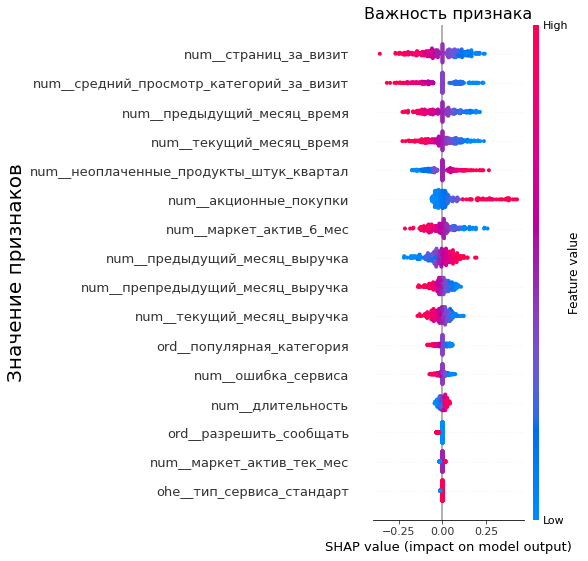

In [115]:
plot_shap('s')

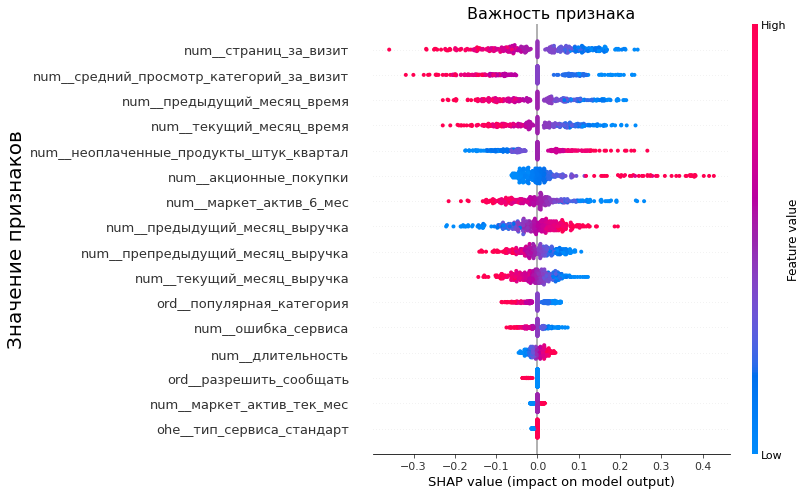

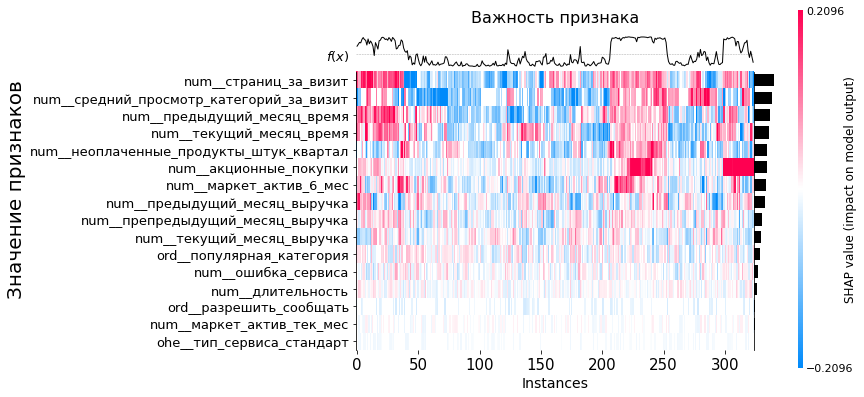

In [117]:
plot_shap('h')

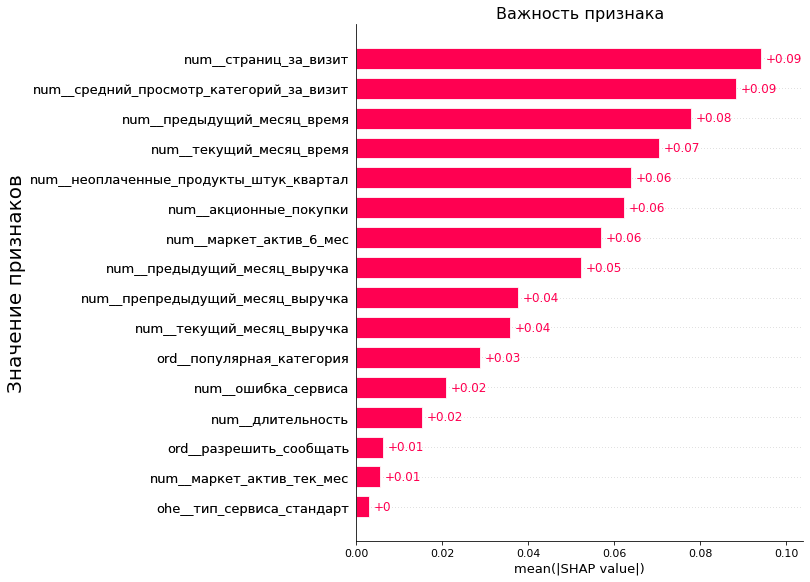

In [118]:
plot_shap('bar')

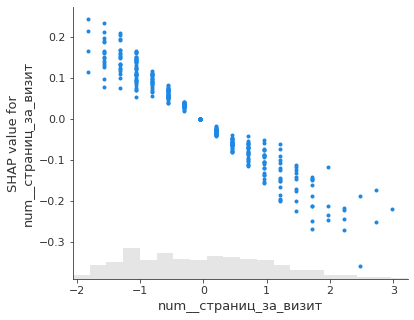

In [119]:
shap.plots.scatter(shap_values[:, "num__страниц_за_визит"])


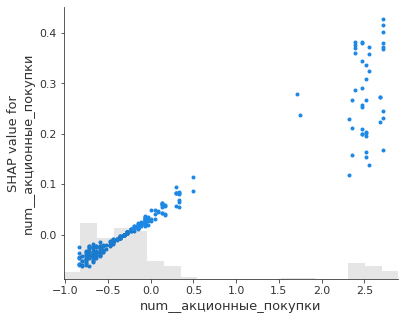

In [120]:
shap.plots.scatter(shap_values[:, "num__акционные_покупки"])

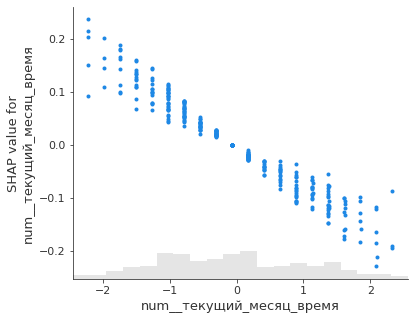

In [121]:
shap.plots.scatter(shap_values[:, "num__текущий_месяц_время"])

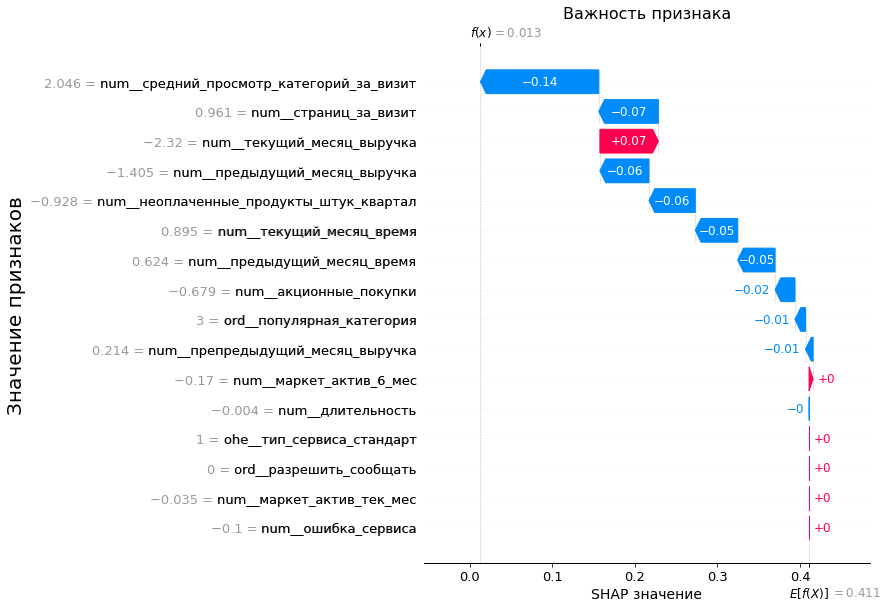

In [122]:
plot_shap('w')

### __Вывод по важности признаков:__

1. признаки мало значимы для модели: 

- `популярные категории`; 
- `маркет_актив_тек_мес`; 
- `тип_сервиса`. 

2. признаки сильнее всего влияют на целевой признак: 

- `страниц_за_визит`; 
- `акционные_покупки`;
- `текущий_месяц_время`;

3. как можно использовать эти наблюдения при моделировании и принятии бизнес-решений: 

- `страниц_за_визит`: Компании необходимо обратать внимание на среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца, возможно проанализировать поведение пользователей на сайте;  

- `акционные_покупки`: Также компании следуюет учесть что акционные покупки сильно влияют на целевой признак, возможно делать больше промоакций; 

- `текущий_месяц_время`: также подпадает под логическую категорию `времени` проведенного пользователем на сайте; 

- `ошибка сервиса`: вносит вклад в модель, компании также стоит обратить внимание на ошибки сервиса. 


## Сегментация покупателей

__8.1__ Выполнить сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.

__8.2__ Выберать группу покупателей и предложить, как увеличить её покупательскую активность:

- Проведисти графическое и аналитическое исследование группы покупателей.
- Сделайть предложения по работе с сегментом для увеличения покупательской активности.

__8.3__ Сделайть выводы о сегментах:

- какой сегмент вы взяли для дополнительного исследования,
- какие предложения вы сделали и почему.


In [123]:
df_full_new = df_full.copy().merge(df_money,on='id')
df_full_new.head()

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   
2  215351                 Снизилась    стандарт                 да   
3  215352                 Снизилась    стандарт                нет   
4  215353                 Снизилась    стандарт                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 4.4                     4           819               0.75   
1                 4.9                     3           539               0.14   
2                 3.2                     5           896               0.99   
3                 5.1                     3          1064               0.94   
4                 3.3                     4           762               0.26   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   предыдущий_месяц_выручка  препредыдущий_месяц_выручка  \
0                    5216.0                       4472.0   
1                    5457.5                       4826.0   
2                    6158.0                       4793.0   
3                    5807.5                       4594.0   
4                    4738.5                       5124.0   

   текущий_месяц_выручка  предыдущий_месяц_время  текущий_месяц_время  прибыль  
0                 4971.6                      12                   10     4.16  
1                 5058.4                       8                   13     3.13  
2                 6610.4                      11                   13     4.87  
3                 5872.5                       8                   11     4.21  
4                 5388.5                      10                   10     3.95

In [124]:
df_full_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

### __Анализ страниц_за_визит__

In [125]:
group_page = df_full_new.pivot_table(index='страниц_за_визит', columns='покупательская_активность',
                                     values=['прибыль'], 
                                     aggfunc='sum')
group_page

прибыль          
покупательская_активность Прежний уровень Снизилась
страниц_за_визит                                   
1                                     NaN     78.39
2                                     NaN    235.35
3                                   31.86    277.94
4                                  132.81    318.31
5                                  138.24    304.97
6                                  271.91    233.33
7                                  267.99    150.42
8                                  397.36     46.72
9                                  361.56     58.11
10                                 358.33     50.12
11                                 289.13     68.81
12                                 255.85     38.65
13                                 213.14     31.20
14                                 183.72     23.15
15                                 127.29     20.02
16                                  69.69     15.06
17                                  57.59     22.36
18                                  23.11      3.66
19                                  17.46       NaN
20                                   7.41       NaN

[]

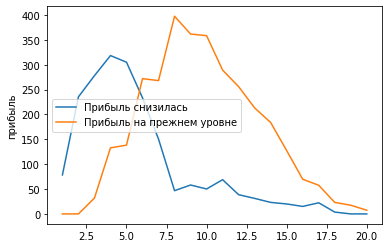

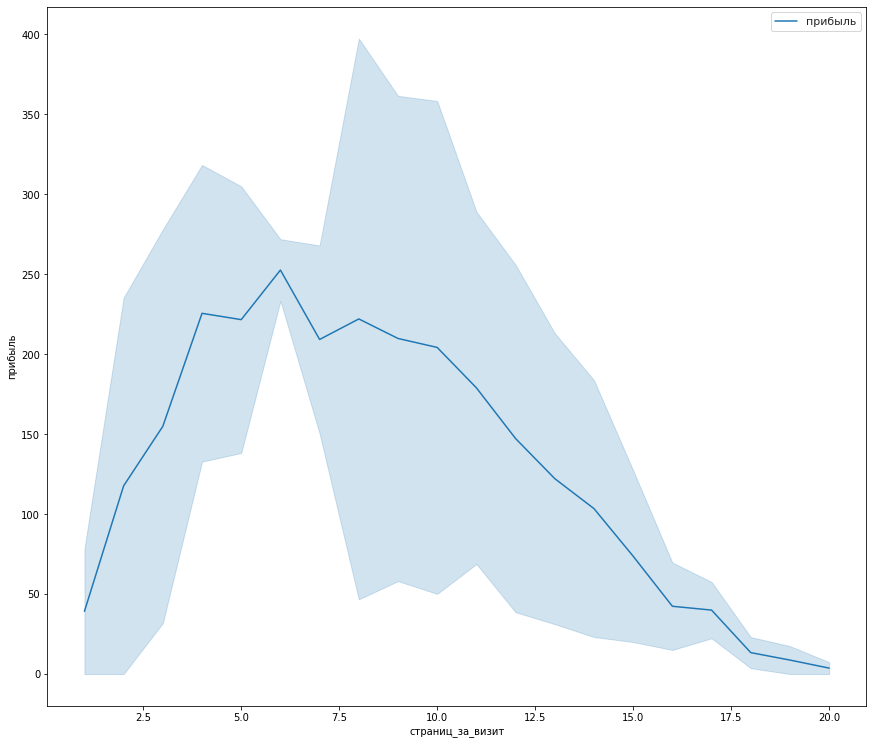

In [126]:
group_page = group_page.fillna(0)
pb.plot(group_page['прибыль']['Снизилась'], label='Прибыль снизилась')
pb.plot(group_page['прибыль']['Прежний уровень'],  label='Прибыль на прежнем уровне')
pb.legend()
pb.ylabel('прибыль')
fig, ax = pb.subplots(figsize=(12, 10))
ax.set(ylabel='прибыль')
pb.tight_layout(pad=0)
sns.set_theme(style="whitegrid")
sns.lineplot(data=group_page, palette="tab10", linewidth=1.5, label='')
pb.plot()

#### __Вывод по анализу страниц_за_визит__

- значение `прибыли` при снижении `покупательской активности` при просмотре 4-х `страниц за визит`; 

- значение `прибыли` при прежнем уровне `покупательской активности` при просмотре 8-и `страниц за визит`; 

- наименьшая дисперсия `прибыли` между снижением `покупательской активности` и прежней `покупательской активности` составляет при просмотре 6-и `страниц за визит`;

- наибольшая дисперсия `прибыли` между снижением `покупательской активности` и прежней `покупательской активности` составляет при просмотре 8-и `страниц за визит`.

### __Анализ акционные_покупки__

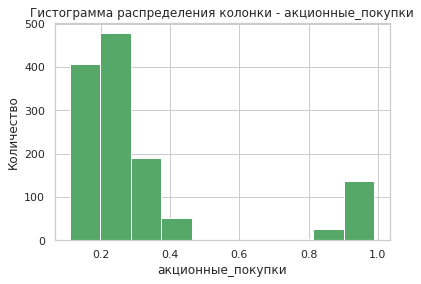

In [127]:
df_full_new['акционные_покупки'].hist(color='g')
pb.title("Гистограмма распределения колонки - акционные_покупки")
pb.xlabel("акционные_покупки")
pb.ylabel("Количество")
pb.show()

In [128]:
lower = df_full_new[df_full_new['акционные_покупки'] < 0.5] 
higher = df_full_new[df_full_new['акционные_покупки'] > 0.5]
display(len(higher)/ len(df_full_new))

0.12885802469135801

In [129]:
higher = higher.groupby('покупательская_активность').agg('прибыль').sum()
display(higher)
display(higher.values[0] / higher.values.sum())
display(higher.values[1] / higher.values.sum())

покупательская_активность
Прежний уровень    133.47
Снизилась          512.57
Name: прибыль, dtype: float64

0.20659711472973805

0.7934028852702619

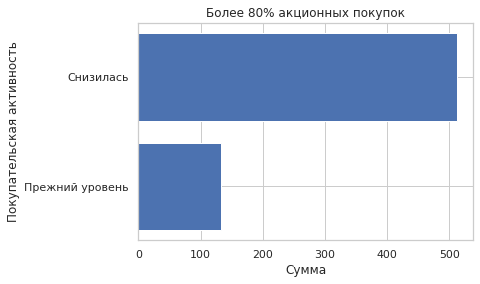

In [130]:
pb.barh(higher.index, higher.values)
pb.title('Более 80% акционных покупок')
pb.xlabel('Сумма')
pb.ylabel('Покупательская активность')
pb.show()

In [131]:
lower = lower.groupby('покупательская_активность').agg('прибыль').sum()
display(lower)
display(lower.values[0] / lower.values.sum())
display(lower.values[1] / lower.values.sum())

покупательская_активность
Прежний уровень    3070.98
Снизилась          1464.00
Name: прибыль, dtype: float64

0.6771760845692815

0.3228239154307184

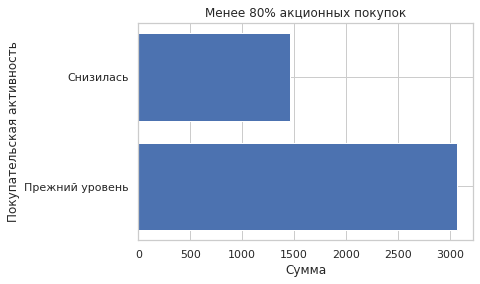

In [132]:
pb.barh(lower.index, lower.values)
pb.title('Менее 80% акционных покупок')
pb.xlabel('Сумма')
pb.ylabel('Покупательская активность')
pb.show()

#### __Вывод по анализу акционные_покупки__

1. Пользователи предпочитающие в основном `акционные покупки` по `прибыли`: 

- группа пользователей которая совершает более 80% `акционных покупок` значитально меньше оставшейся группы, всего 12.8%; 

- `покупательская активность` у группы пользоватей которая совершает в основном `акционные покупки` __снизилась__ на 79.3%, 20.6% из этой группы осталось на __прежнем__ уровне;

2. Пользователи которые совершают `акционные покупки` реже по `прибыли`: 

- `покупательская активность` которая осталась __прежней__ в сумме `прибыли` составляет 67.7%; 

- `покупательская активность` которая __снизилась__  в сумме `прибыли` составляет 32.2%; 

### __Анализ ошибка_сервиса__

In [133]:
df_full_new['ошибка_сервиса']

0       2
1       1
2       6
3       3
4       1
       ..
1291    3
1292    3
1293    5
1294    5
1295    3
Name: ошибка_сервиса, Length: 1296, dtype: int64

In [134]:
group_error = df_full_new.pivot_table(index='ошибка_сервиса', columns='покупательская_активность',
                                     values=['прибыль'], 
                                     aggfunc='sum')
group_error

прибыль          
покупательская_активность Прежний уровень Снизилась
ошибка_сервиса                                     
0                                   75.04       NaN
1                                  163.72    119.49
2                                  371.49    387.18
3                                  467.16    422.25
4                                  638.14    370.75
5                                  575.18    262.07
6                                  459.64    172.00
7                                  232.02    137.93
8                                  176.23     96.30
9                                   45.83      8.60

[]

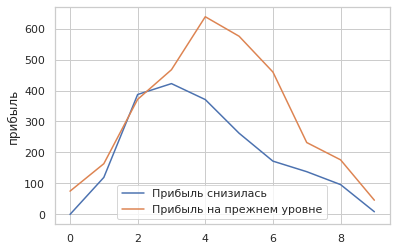

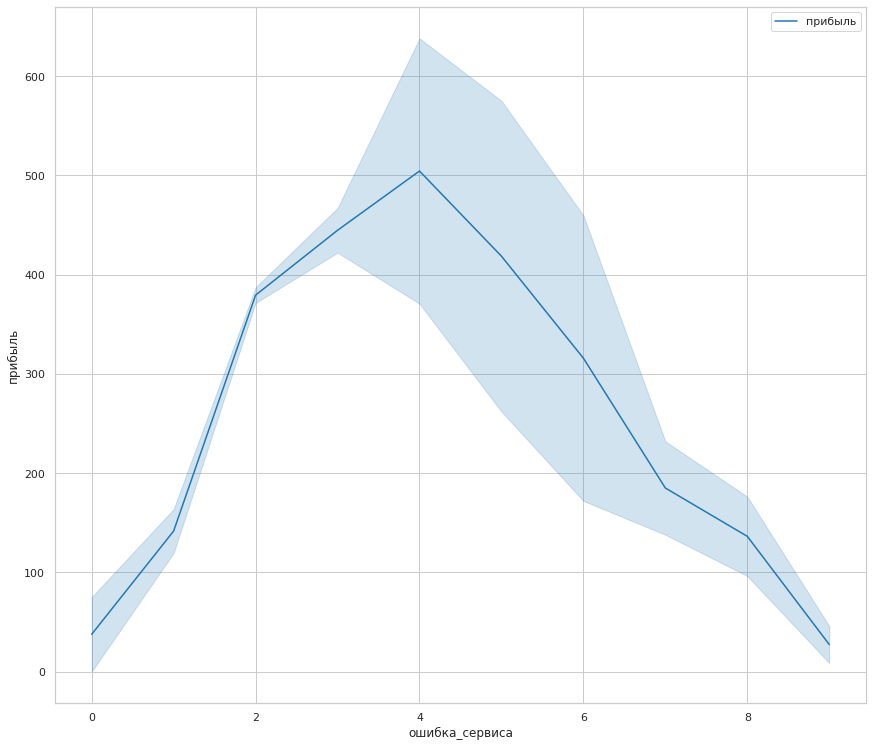

In [135]:
group_error = group_error.fillna(0)
pb.plot(group_error['прибыль']['Снизилась'], label='Прибыль снизилась')
pb.plot(group_error['прибыль']['Прежний уровень'],  label='Прибыль на прежнем уровне')
pb.legend()
pb.ylabel('прибыль')
fig, ax = pb.subplots(figsize=(12, 10))
ax.set(ylabel='прибыль')
pb.tight_layout(pad=0)
sns.set_theme(style="whitegrid")
sns.lineplot(data=group_error, palette="tab10", linewidth=1.5, label='')
pb.plot()

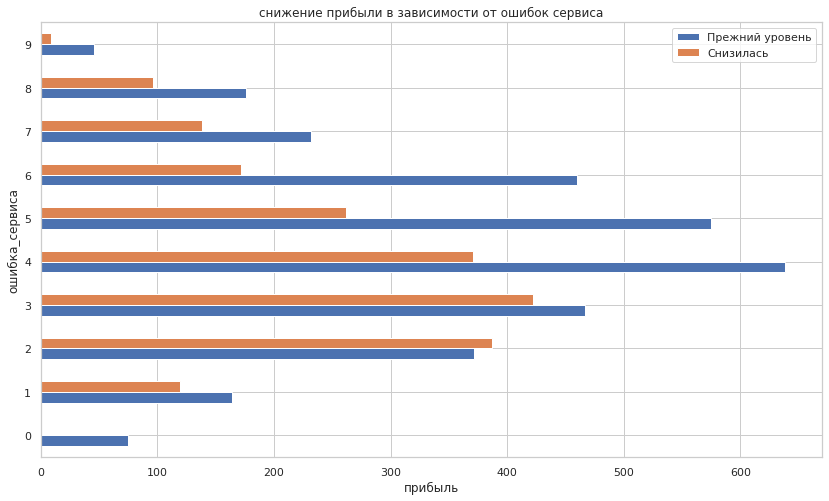

In [136]:
group_error.columns = ['Прежний уровень', 'Снизилась']
group_error.plot(kind='barh', figsize=(14, 8))
pb.title('снижение прибыли в зависимости от ошибок сервиса')
pb.xlabel('прибыль')
pb.show()

####  __Вывод по анализу ошибка_сервиса__

- `прибыль` начинает снижаться при количестве ошибок более 4 по обоим сегментам; 

- наибольшая дисcперсия по `прибыли` между сегментами при 5 ошибках; 


### __Рассмотрение корреляций__

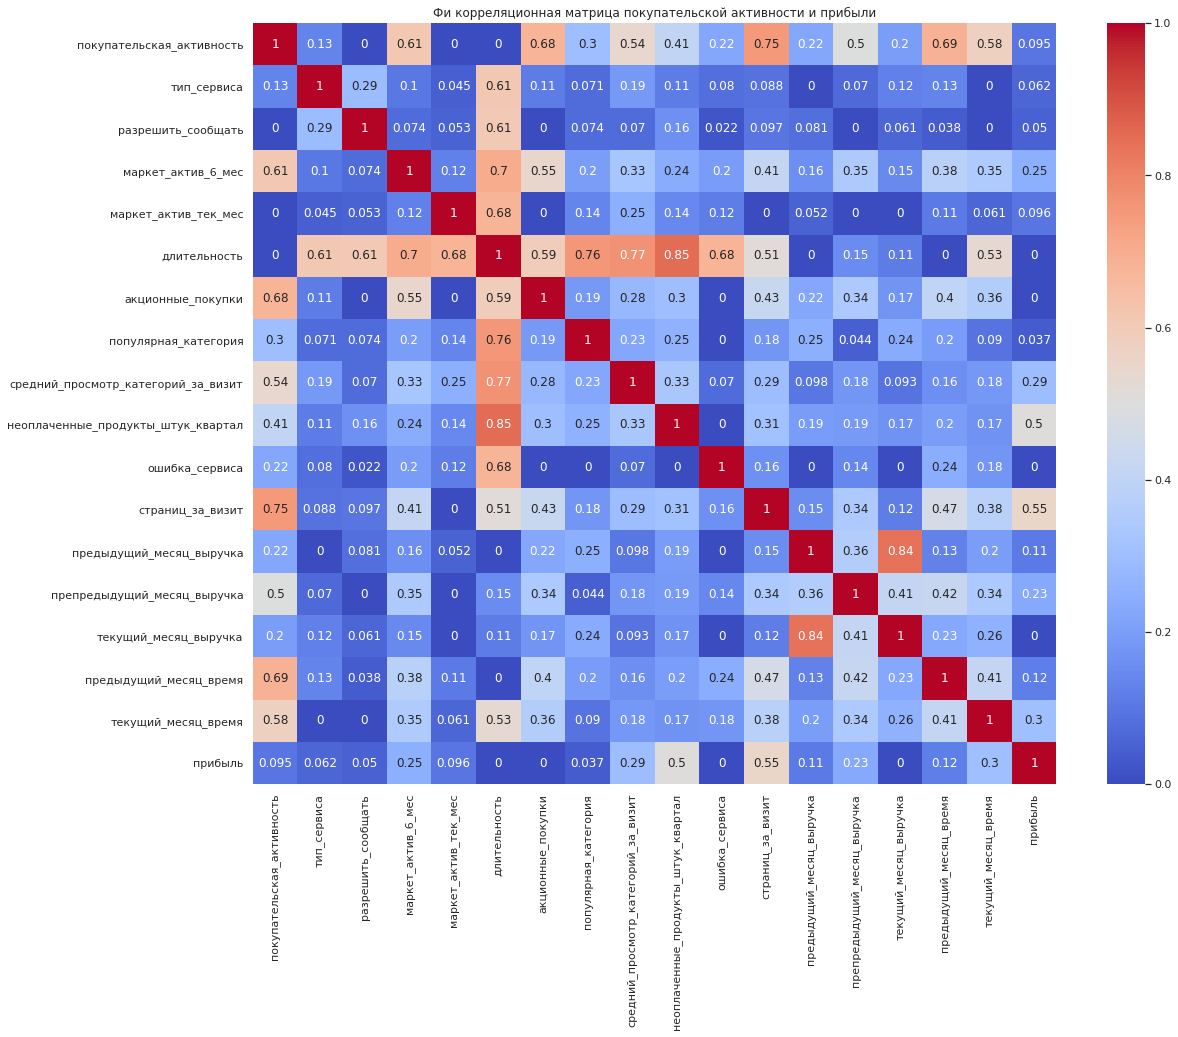

In [137]:
df_phik_new = df_full_new.copy().drop(['id'], axis=1)
df_phik_corr_new = df_phik_new.phik_matrix(interval_cols=['предыдущий_месяц_выручка', 
                           'препредыдущий_месяц_выручка', 
                           'текущий_месяц_выручка',
                            'предыдущий_месяц_время',
                            'текущий_месяц_время'])
pb.figure(figsize=(18, 14))
sns.heatmap(df_phik_corr_new, annot=True, cmap='coolwarm')
pb.title('Фи корреляционная матрица покупательской активности и прибыли')
pb.show()

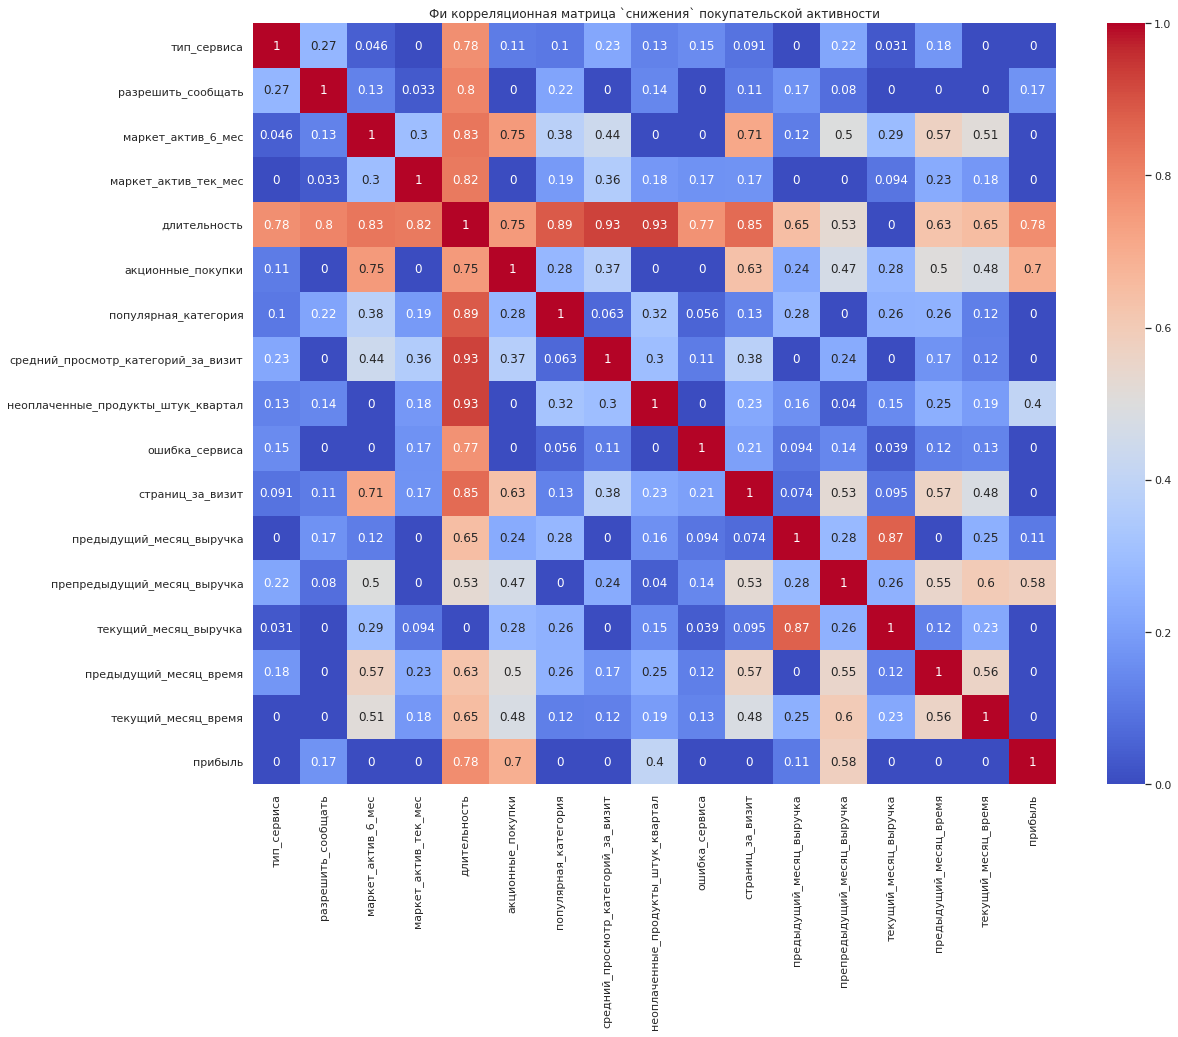

In [138]:
df_phik_lower = df_full_new[df_full_new['покупательская_активность'] == 'Снизилась'].copy().drop(['id'], axis=1)
df_phik_corr_lower = df_phik_lower.phik_matrix(interval_cols=['предыдущий_месяц_выручка', 
                           'препредыдущий_месяц_выручка', 
                           'текущий_месяц_выручка',
                            'предыдущий_месяц_время',
                            'текущий_месяц_время'])
pb.figure(figsize=(18, 14))
sns.heatmap(df_phik_corr_lower, annot=True, cmap='coolwarm')
pb.title('Фи корреляционная матрица `снижения` покупательской активности')
pb.show()

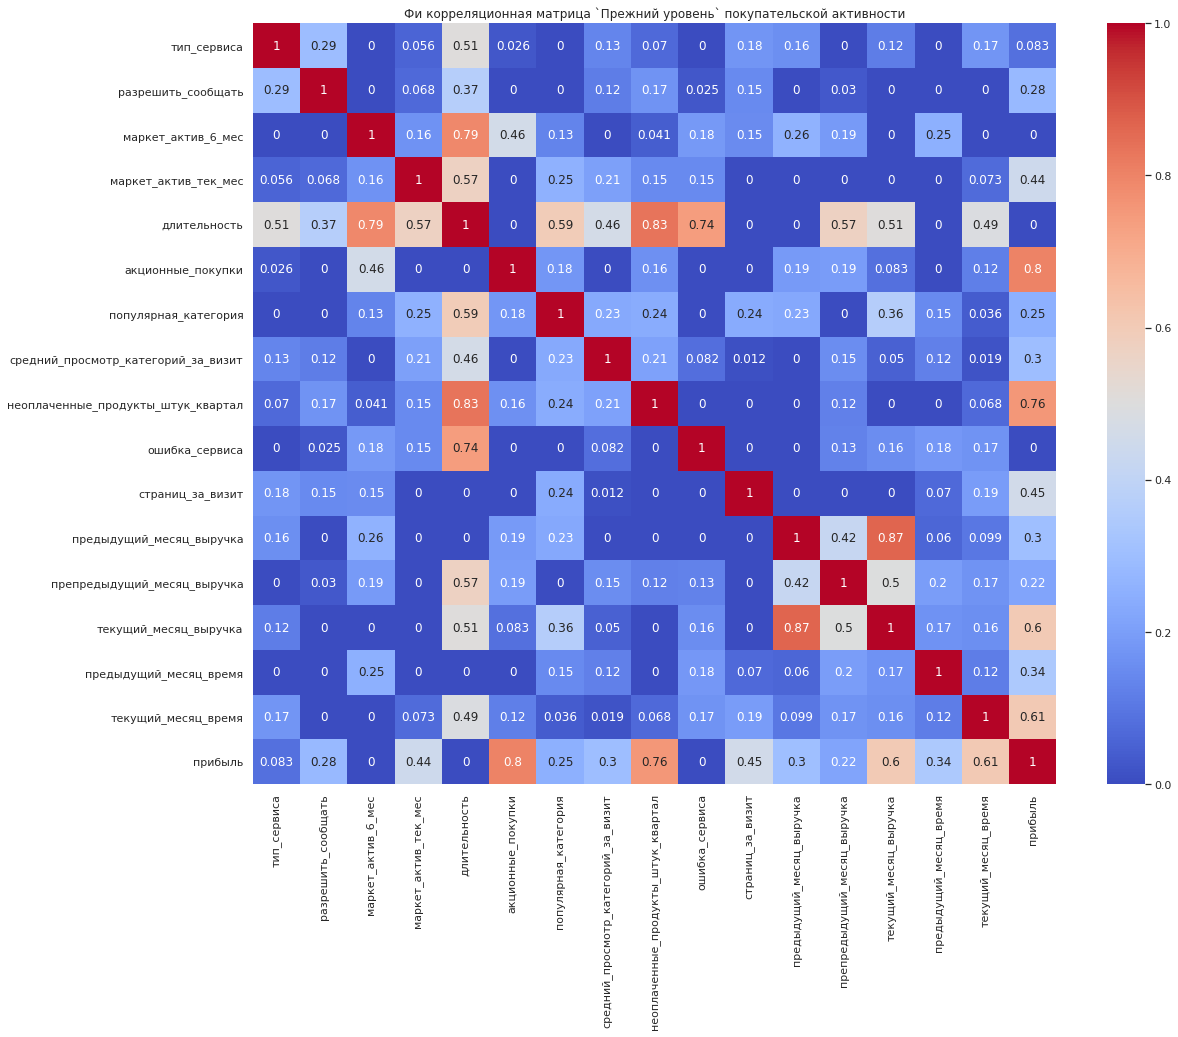

In [139]:
df_phik_higher = df_full_new[df_full_new['покупательская_активность'] == 'Прежний уровень'].copy().drop(['id'], axis=1)
df_phik_corr_higher = df_phik_higher.phik_matrix(interval_cols=['предыдущий_месяц_выручка', 
                           'препредыдущий_месяц_выручка', 
                           'текущий_месяц_выручка',
                            'предыдущий_месяц_время',
                            'текущий_месяц_время'])
pb.figure(figsize=(18, 14))
sns.heatmap(df_phik_corr_higher, annot=True, cmap='coolwarm')
pb.title('Фи корреляционная матрица `Прежний уровень` покупательской активности')
pb.show()

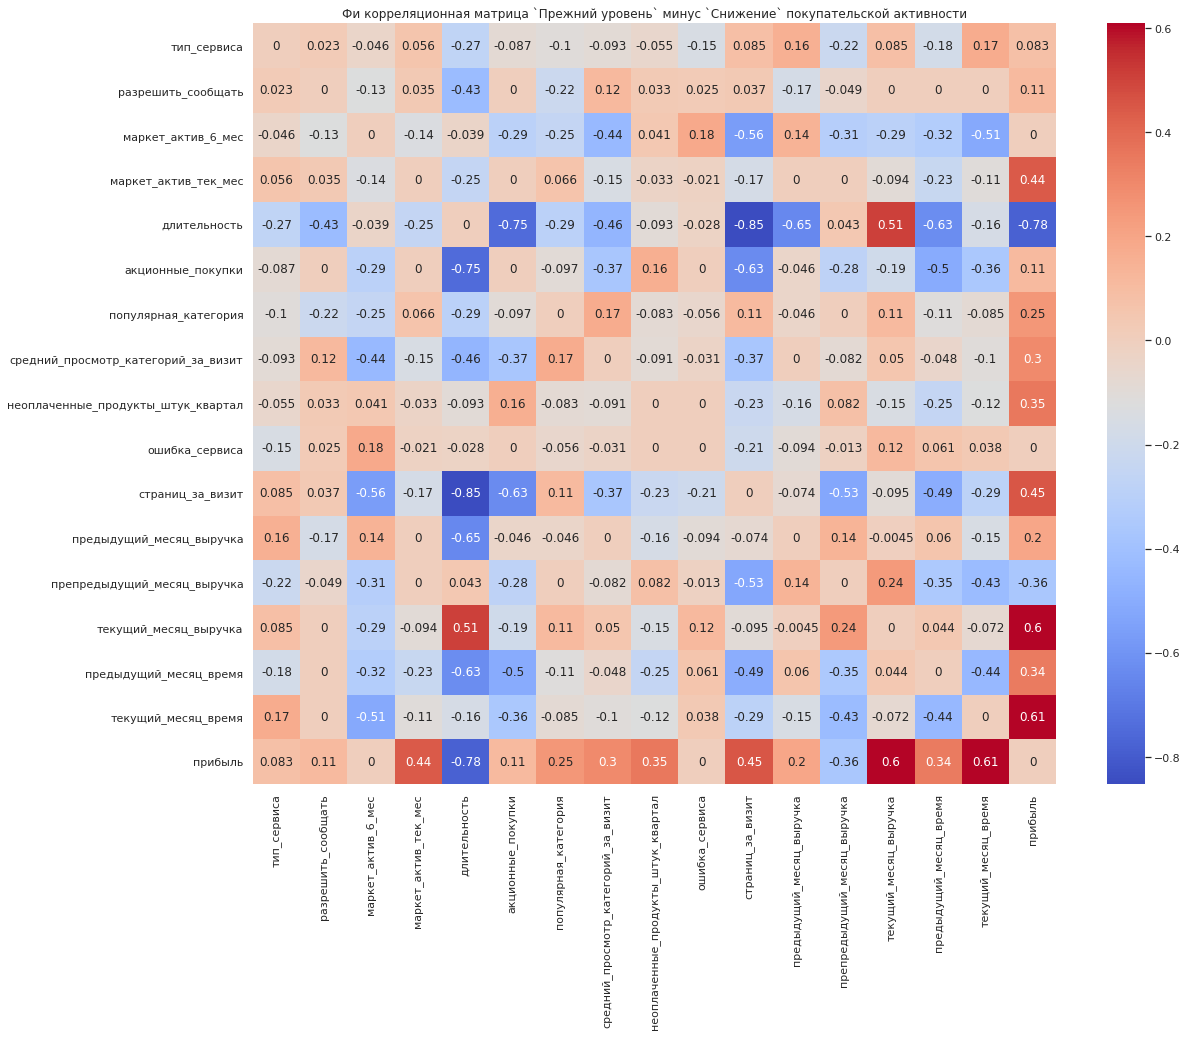

In [140]:
pb.figure(figsize=(18, 14))
sns.heatmap(df_phik_corr_higher - df_phik_corr_lower, annot=True, cmap='coolwarm')
pb.title('Фи корреляционная матрица `Прежний уровень` минус `Снижение` покупательской активности')
pb.show()

In [141]:
df_low = df_full_new[df_full_new['покупательская_активность'] == 'Прежний уровень']
df_low.groupby('неоплаченные_продукты_штук_квартал').agg('прибыль').sum()

неоплаченные_продукты_штук_квартал
0    349.55
1    798.26
2    709.31
3    579.45
4    480.90
5    260.13
6     13.80
7      9.52
8      3.53
Name: прибыль, dtype: float64

In [142]:
df_low_pivot = df_low.pivot_table(index='популярная_категория', 
                   columns='неоплаченные_продукты_штук_квартал',
                   values='прибыль', aggfunc='sum')
df_low_pivot

неоплаченные_продукты_штук_квартал        0       1       2       3       4  \
популярная_категория                                                          
Домашний текстиль                     24.64   94.80  131.42  149.56  122.20   
Косметика и аксесуары                 72.82  151.48  102.16   65.21   63.95   
Кухонная посуда                       59.87  103.65   35.16   32.77   47.77   
Мелкая бытовая техника и электроника  76.32  153.71  142.16   95.37   65.24   
Техника для красоты и здоровья        62.84  145.33  123.90  108.36   30.39   
Товары для детей                      53.06  149.29  174.51  128.18  151.35   

неоплаченные_продукты_штук_квартал        5     6     7     8  
популярная_категория                                           
Домашний текстиль                     92.49   NaN   NaN   NaN  
Косметика и аксесуары                 16.22  8.95   NaN   NaN  
Кухонная посуда                       15.55   NaN  5.58   NaN  
Мелкая бытовая техника и электроника  45.06   NaN   NaN   NaN  
Техника для красоты и здоровья        14.81  4.85   NaN  3.53  
Товары для детей                      76.00   NaN  3.94   NaN

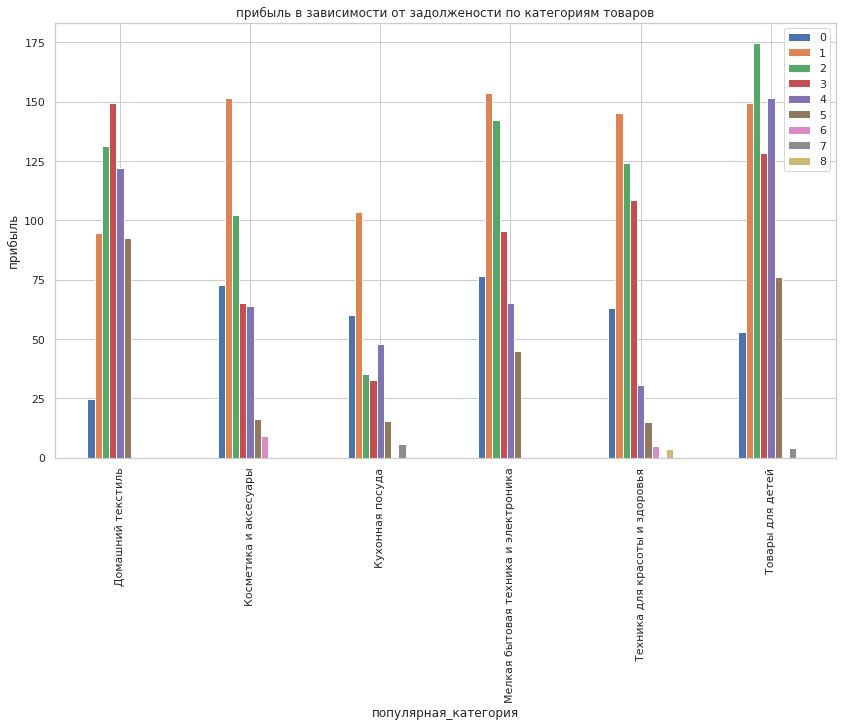

In [143]:
df_low_pivot = df_low_pivot.fillna(0)
df_low_pivot.plot(kind='bar', figsize=(14, 8))
pb.title('прибыль в зависимости от задолжености по категориям товаров')
pb.legend()
pb.ylabel('прибыль')
pb.show()

#### __Вывод по анализу рассмотрение корреляций__

- При рассмотрении Фи корреляционной матрицы `снижения` покупательской активности можно заметить что присутствует корреляция на `Длительность`, `маркет_актив_за_6_мес` коррелирует с `акциоными_покупками` а они в свою очередь влияют на `прибыль`; 

- При рассмотрении Фи корреляционной матрицы на `Прежний уровень` покупательской активности, можно заметить корреляцию между `неоплаченные_продукты_штук_квартал` и `прибылью`, также между `прибылью` и `акциоными_покупками` из чего можно сделать вывод что на прежнем уровне `покупальская активность` вероятно осталась при покупках товаров по акции в долг; 

- Наибольшая категория неоплаченных товаров в `товарах для детей`   от 1 до 4 покупок. 


###  __EDA Сегментация__

### Комунникация с клиентом 

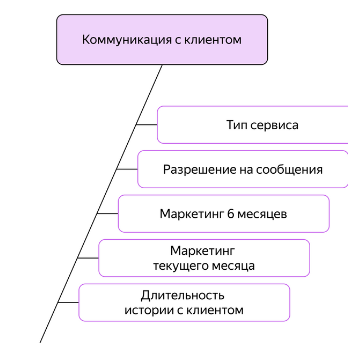

In [144]:
cols_communicate = ['тип_сервиса', 'разрешить_сообщать', 
                    'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность']
cols_target = ['покупательская_активность', 'прибыль']

df_communicate_with_client =  df_full_new.copy().drop(['id'], axis=1)[cols_communicate + cols_target]
df_communicate_with_client.head()

тип_сервиса разрешить_сообщать  маркет_актив_6_мес  маркет_актив_тек_мес  \
0     премиум                 да                 4.4                     4   
1    стандарт                нет                 4.9                     3   
2    стандарт                 да                 3.2                     5   
3    стандарт                нет                 5.1                     3   
4    стандарт                 да                 3.3                     4   

   длительность покупательская_активность  прибыль  
0           819                 Снизилась     4.16  
1           539                 Снизилась     3.13  
2           896                 Снизилась     4.87  
3          1064                 Снизилась     4.21  
4           762                 Снизилась     3.95

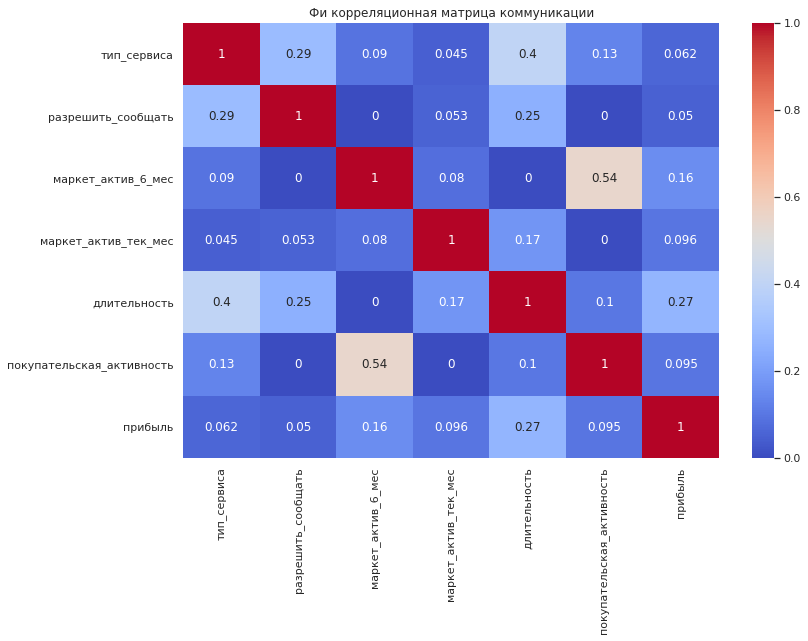

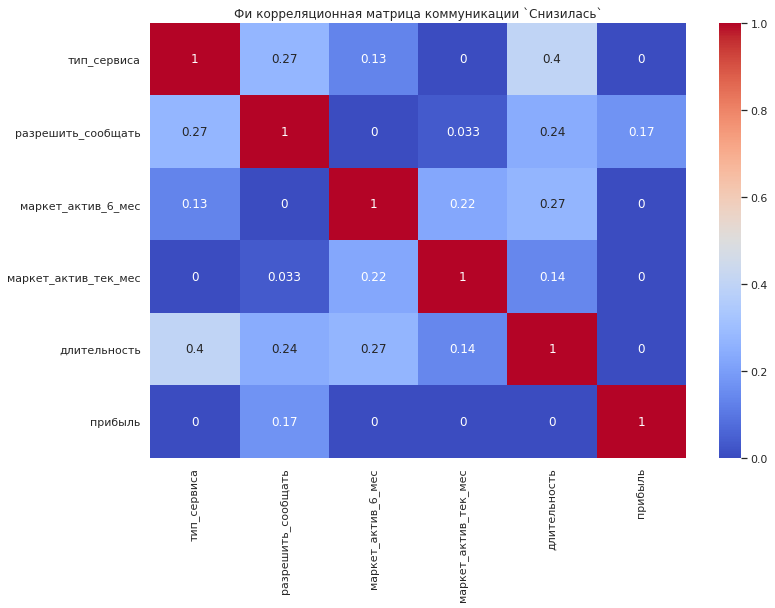

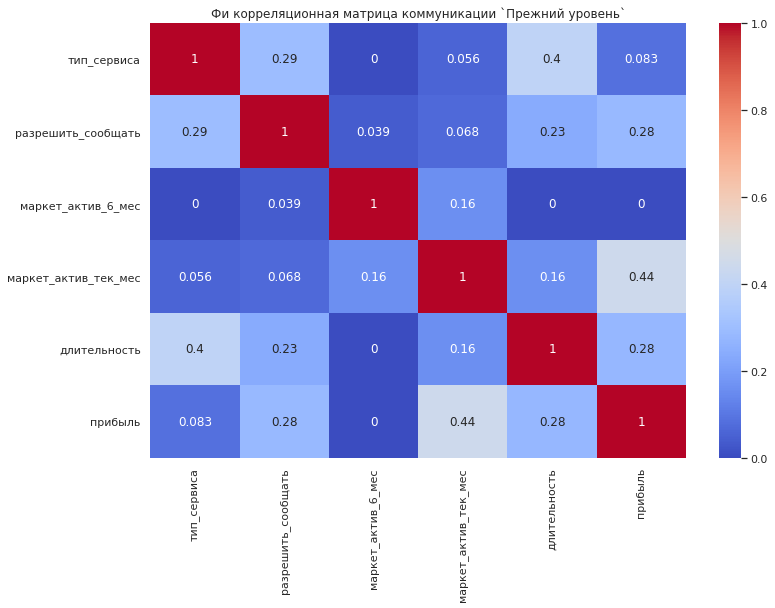

In [145]:
def plot_fi_matrix(df:pd.DataFrame, inter_cols:list, title:str): 
    df_phik = df.phik_matrix(interval_cols=inter_cols)
    pb.figure(figsize=(12, 8))
    sns.heatmap(df_phik, annot=True, cmap='coolwarm')
    pb.title(title)
    pb.show()

high, low = 'Прежний уровень', 'Снизилась'
plot_fi_matrix(df_communicate_with_client, ['маркет_актив_6_мес', 'длительность'], 
               'Фи корреляционная матрица коммуникации')
plot_fi_matrix(df_communicate_with_client[df_communicate_with_client['покупательская_активность'] == low], 
                ['маркет_актив_6_мес', 'длительность'], 
               f'Фи корреляционная матрица коммуникации `{low}`')
plot_fi_matrix(df_communicate_with_client[df_communicate_with_client['покупательская_активность'] == high], 
                ['маркет_актив_6_мес', 'длительность'], 
               f'Фи корреляционная матрица коммуникации `{high}`')

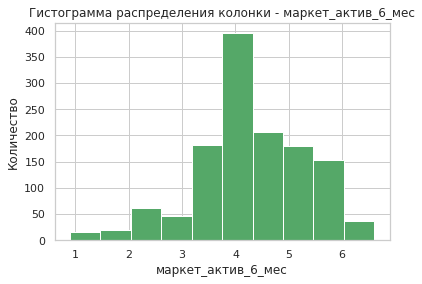

In [146]:
df_communicate_with_client['маркет_актив_6_мес'].hist(color='g')
pb.title("Гистограмма распределения колонки - маркет_актив_6_мес")
pb.xlabel("маркет_актив_6_мес")
pb.ylabel("Количество")
pb.show()

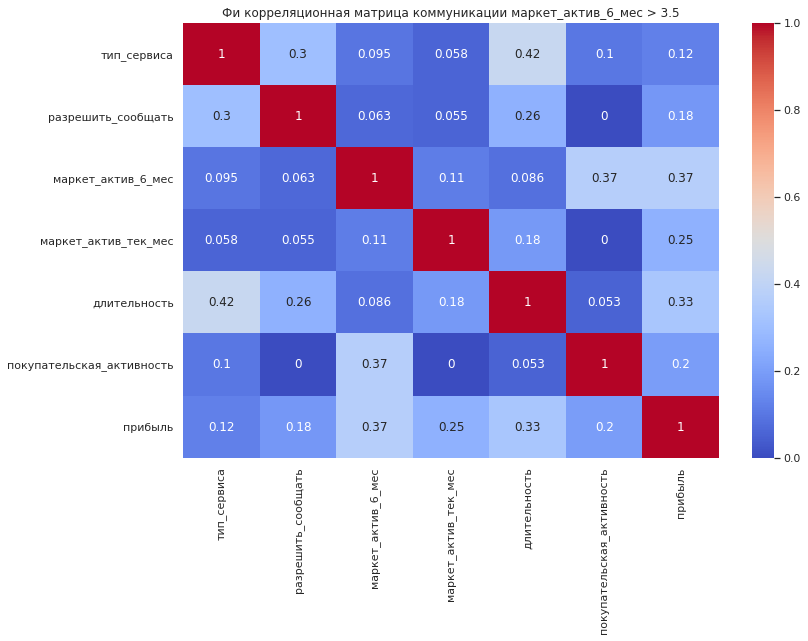

In [147]:
plot_fi_matrix(df_communicate_with_client[df_communicate_with_client['маркет_актив_6_мес'] >= 3.5], 
               ['маркет_актив_6_мес', 'длительность'],
               'Фи корреляционная матрица коммуникации маркет_актив_6_мес > 3.5')

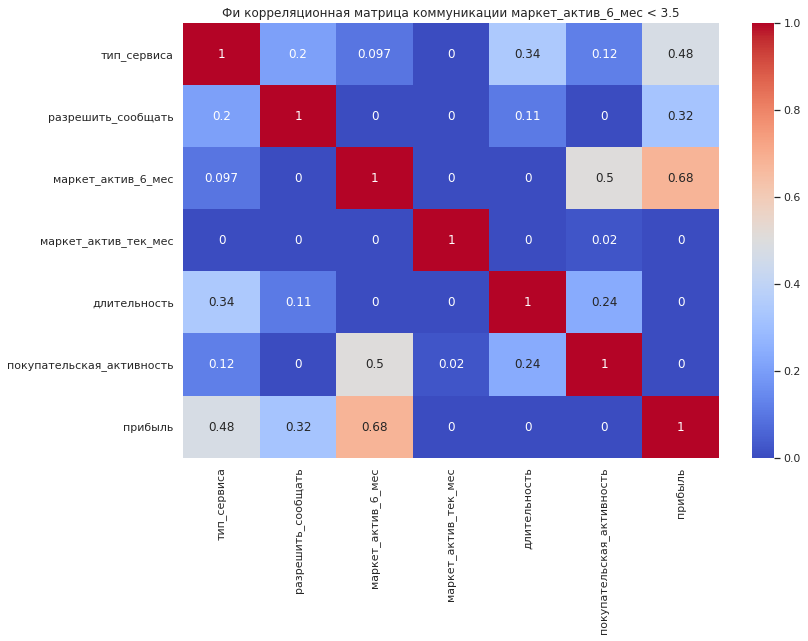

In [148]:
plot_fi_matrix(df_communicate_with_client[df_communicate_with_client['маркет_актив_6_мес'] < 3.5], 
               ['маркет_актив_6_мес', 'длительность'],
               'Фи корреляционная матрица коммуникации маркет_актив_6_мес < 3.5')

In [149]:
display(df_communicate_with_client[df_communicate_with_client['маркет_актив_6_мес'] < 3.5]['прибыль'].sum())
display(df_communicate_with_client[df_communicate_with_client['маркет_актив_6_мес'] >= 3.5]['прибыль'].sum())

932.3299999999999

4248.6900000000005

In [150]:
col_act = 'покупательская_активность'
display(df_communicate_with_client[df_communicate_with_client['маркет_актив_6_мес'] < 3.5][col_act].value_counts())
display(df_communicate_with_client[df_communicate_with_client['маркет_актив_6_мес'] >= 3.5][col_act].value_counts())

Снизилась          159
Прежний уровень     75
Name: покупательская_активность, dtype: int64

Прежний уровень    727
Снизилась          335
Name: покупательская_активность, dtype: int64

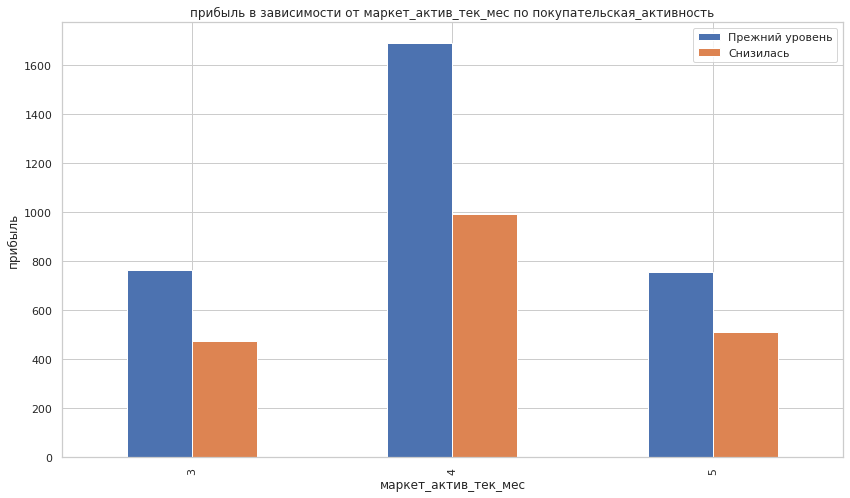

In [151]:
df_communicate_with_client.pivot_table(index='маркет_актив_тек_мес', 
                                       columns=col_act, 
                                       values='прибыль', aggfunc='sum').plot(kind='bar', figsize=(14, 8))
pb.title('прибыль в зависимости от маркет_актив_тек_мес по покупательская_активность')
pb.legend()
pb.ylabel('прибыль')
pb.show()


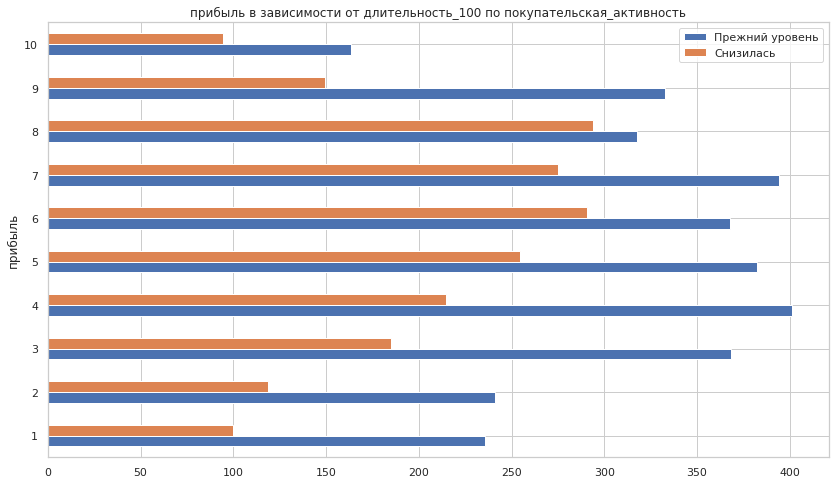

In [152]:
df_communicate_with_client['длительность_100'] = (df_communicate_with_client['длительность'] / 100).astype(int)
df_communicate_with_client.pivot_table(index='длительность_100',
                                       columns=[col_act],
                                       values='прибыль', aggfunc='sum').plot(kind='barh', figsize=(14, 8))

pb.title('прибыль в зависимости от длительность_100 по покупательская_активность')
pb.legend()
pb.ylabel('прибыль')
pb.show()


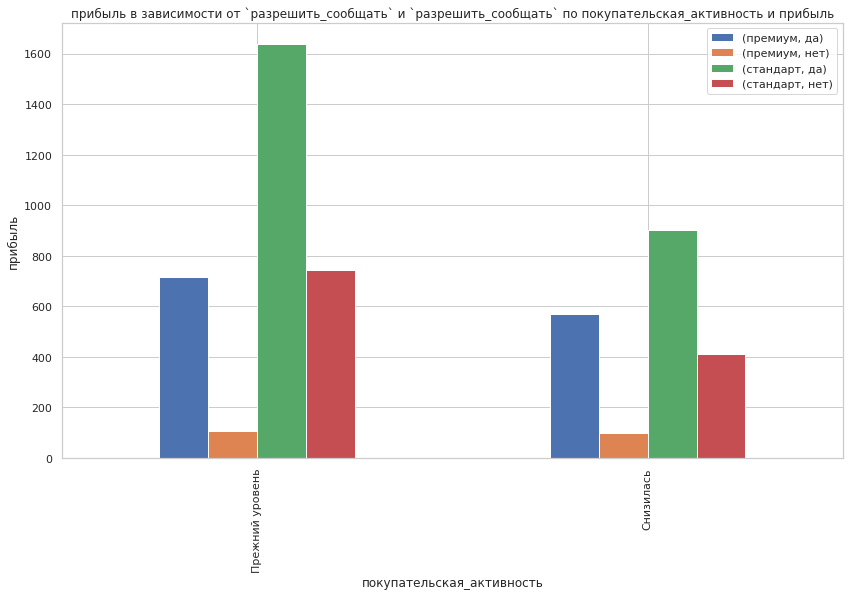

In [153]:
df_communicate_with_client.pivot_table(index='покупательская_активность', 
                                       columns=['тип_сервиса', 'разрешить_сообщать'],
                                       values='прибыль', aggfunc='sum').plot(kind='bar', figsize=(14, 8))
pb.title('прибыль в зависимости от `разрешить_сообщать` и `разрешить_сообщать` по покупательская_активность и прибыль')
pb.legend()
pb.ylabel('прибыль')
pb.show()

- Возвожно клиентам не нравиться слишком навязчивая реклама; 
- Прибыль по покупательской активности замечан у пользователей которые находятся зарегестрированными порядка 400 дней; 
- Наибольшая прибыль у группы людей у которых `Разрешить сообщать` - `да` допольнительная `Тип сервиса` - `Стандарт`. 

### Продуктовое поведение 

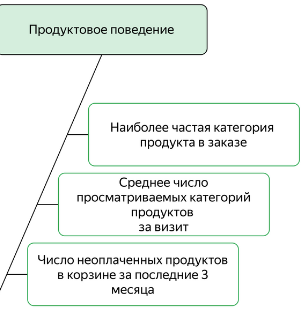

In [154]:
cols_product = ['популярная_категория', 'средний_просмотр_категорий_за_визит', 
                    'неоплаченные_продукты_штук_квартал']
cols_target = ['покупательская_активность', 'прибыль']

df_product =  df_full_new.copy().drop(['id'], axis=1)[cols_product + cols_target]
df_product.head()

популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   неоплаченные_продукты_штук_квартал покупательская_активность  прибыль  
0                                   4                 Снизилась     4.16  
1                                   2                 Снизилась     3.13  
2                                   0                 Снизилась     4.87  
3                                   2                 Снизилась     4.21  
4                                   1                 Снизилась     3.95

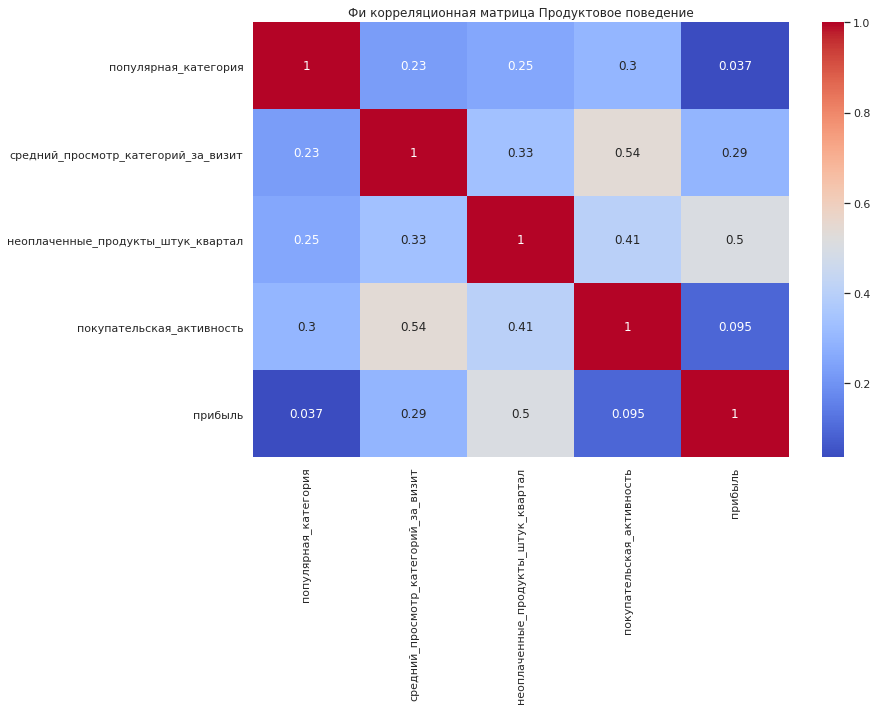

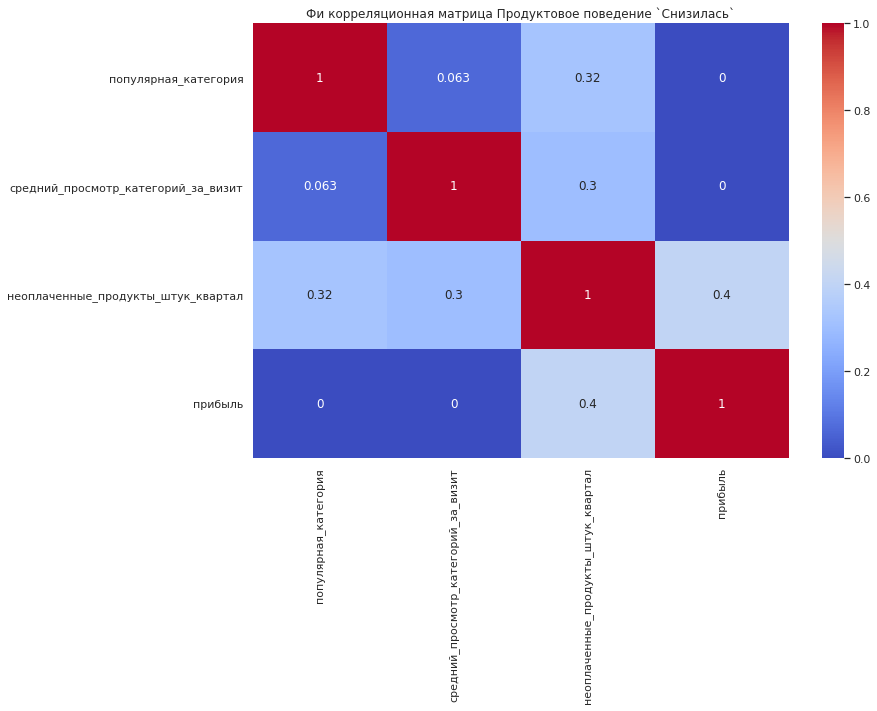

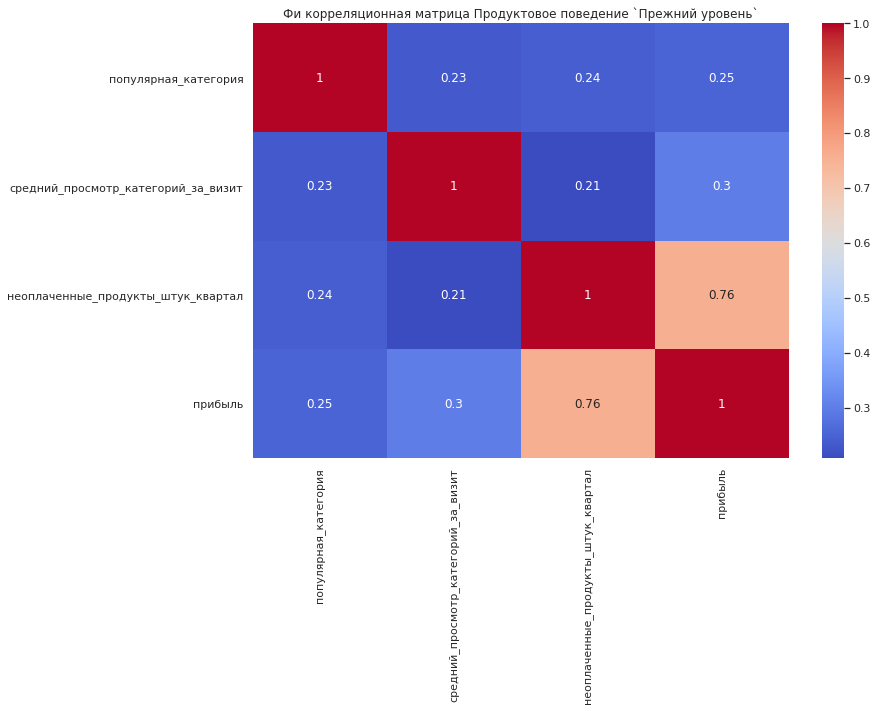

In [155]:
# df_product['средний_просмотр_категорий_за_визит']
high, low = 'Прежний уровень', 'Снизилась'
plot_fi_matrix(df_product, [], 
               'Фи корреляционная матрица Продуктовое поведение')
plot_fi_matrix(df_product[df_product['покупательская_активность'] == low], 
                ['маркет_актив_6_мес', 'длительность'], 
               f'Фи корреляционная матрица Продуктовое поведение `{low}`')
plot_fi_matrix(df_product[df_product['покупательская_активность'] == high], 
                ['маркет_актив_6_мес', 'длительность'], 
               f'Фи корреляционная матрица Продуктовое поведение `{high}`')

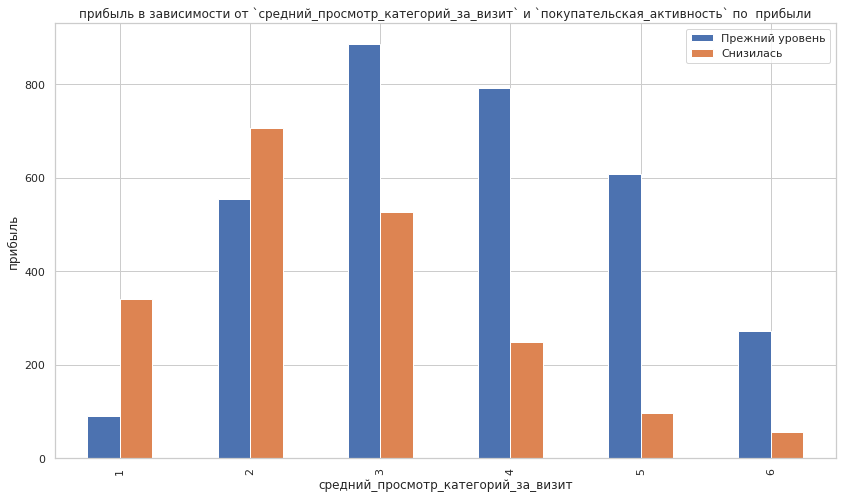

In [156]:
df_product.pivot_table(index='средний_просмотр_категорий_за_визит', 
                                       columns=['покупательская_активность'],
                                       values='прибыль', aggfunc='sum').plot(kind='bar', figsize=(14, 8))
pb.title('прибыль в зависимости от `средний_просмотр_категорий_за_визит` и `покупательская_активность` по  прибыли')
pb.legend()
pb.ylabel('прибыль')
pb.show()

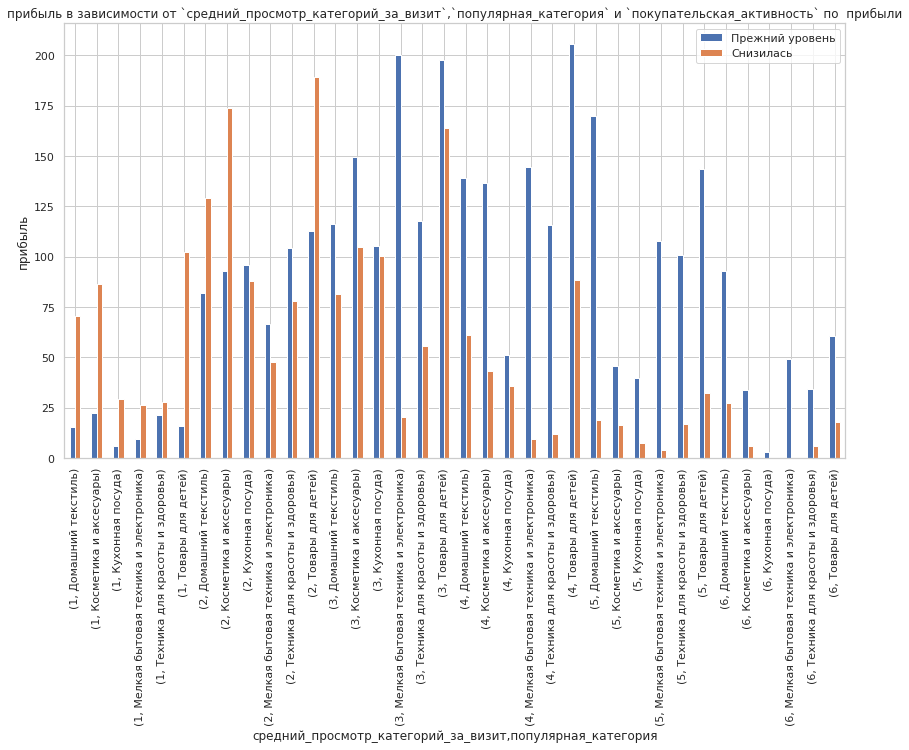

In [157]:
df_product.pivot_table(index=['средний_просмотр_категорий_за_визит', 'популярная_категория'], 
                                       columns=['покупательская_активность'],
                                       values='прибыль', aggfunc='sum').plot(kind='bar', figsize=(14, 8))
pb.title('прибыль в зависимости от `средний_просмотр_категорий_за_визит`,`популярная_категория` и `покупательская_активность` по  прибыли')
pb.legend()
pb.ylabel('прибыль')
pb.show()

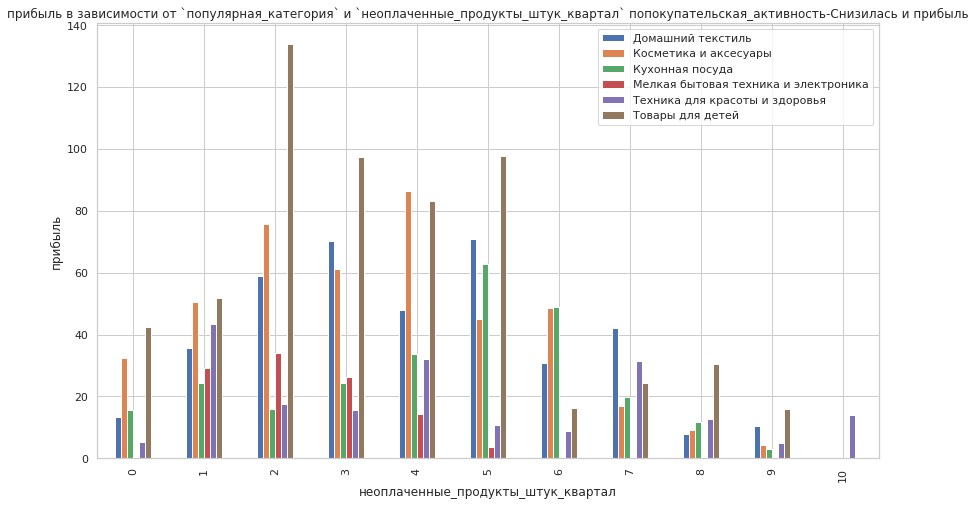

In [158]:
df_product[df_product['покупательская_активность'] == low].pivot_table(index='неоплаченные_продукты_штук_квартал', 
                   columns='популярная_категория',
                   values='прибыль', aggfunc='sum').plot(kind='bar', figsize=(14, 8))
pb.title('прибыль в зависимости от `популярная_категория` и `неоплаченные_продукты_штук_квартал` по'\
         f'покупательская_активность-{low} и прибыль')
pb.legend()
pb.ylabel('прибыль')
pb.show()



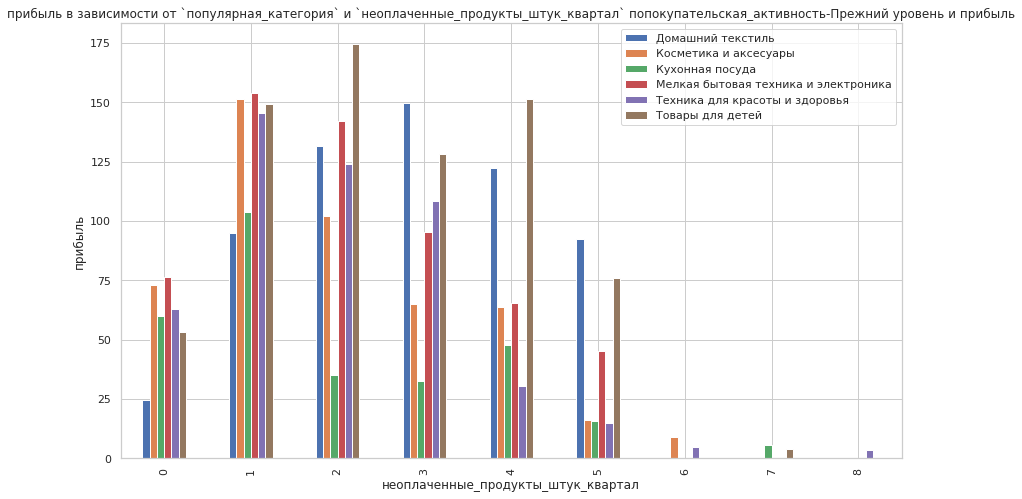

In [159]:
df_product[df_product['покупательская_активность'] == high].pivot_table(index='неоплаченные_продукты_штук_квартал', 
                   columns='популярная_категория',
                   values='прибыль', aggfunc='sum').plot(kind='bar', figsize=(14, 8))
pb.title('прибыль в зависимости от `популярная_категория` и `неоплаченные_продукты_штук_квартал` по'\
         f'покупательская_активность-{high} и прибыль')
pb.legend()
pb.ylabel('прибыль')
pb.show()

Анализируя продуктовое поведение можно отметить несколько особенностей: 

- Очень высокая корреляция между `прибылью`, `прежним_уровнем` покупательской активности и `неоплаченные_продукты`;

- У `средний_просмотр_категорий_за_визит`  начиная с 3-х страниц характеризуется повышением `прежним_уровнем` покупок и уменьшением снижения: 
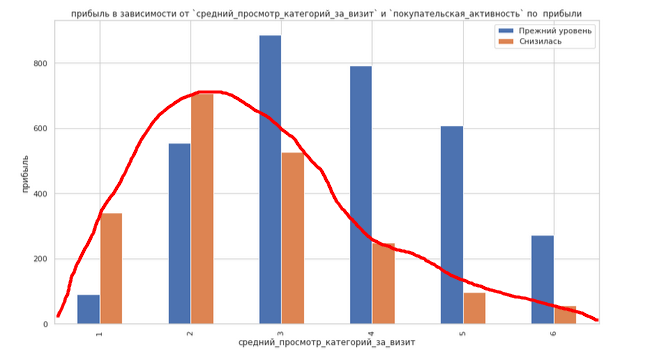

- При рассомтрении более детально по категориям `средних просмотров` и `покупательская_активность` можно заметить что при трех и четырёх просмотрах сильно выделяется `Мелкая бытовая техника и электроника` на `прежнем уровне` в контексте `покупательской активности` и больших сумм `прибыли`.    

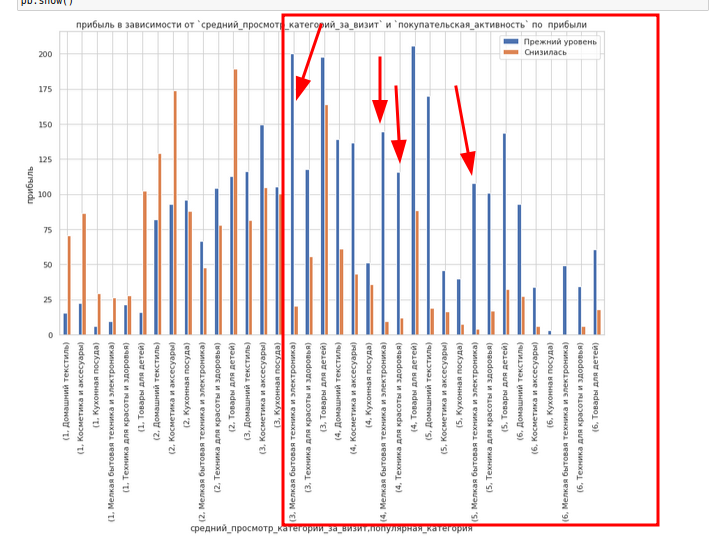


- Суммы прибыли довольно высоки при покупке `Товаров для детей`, однако наблюдается корреляция при обоих вариантах `покупательской активности` с `неоплаченные_продукты_штук_квартал`, особенно с группой где `покупательская активность` осталась прежней. 

### Поведение на сайте 

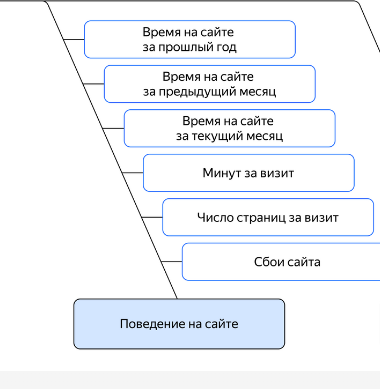

In [160]:
cols_metrics = ['предыдущий_месяц_время', 'текущий_месяц_время', 
                 'страниц_за_визит', 'ошибка_сервиса'] 
cols_target = ['покупательская_активность', 'прибыль']
df_metrics = df_full_new.copy().drop(['id'], axis=1)[cols_metrics + cols_target]
df_metrics.tail()

предыдущий_месяц_время  текущий_месяц_время  страниц_за_визит  \
1291                      14                    7                11   
1292                      12                   11                 9   
1293                      12                   18                 7   
1294                      18                    7                 7   
1295                      15                   10                12   

      ошибка_сервиса покупательская_активность  прибыль  
1291               3           Прежний уровень     4.44  
1292               3           Прежний уровень     6.11  
1293               5           Прежний уровень     3.29  
1294               5           Прежний уровень     4.03  
1295               3           Прежний уровень     3.28

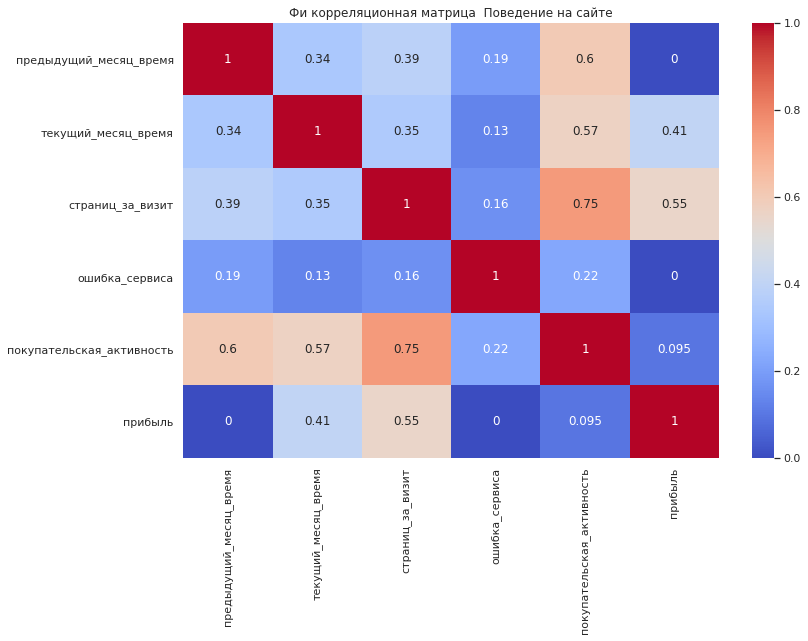

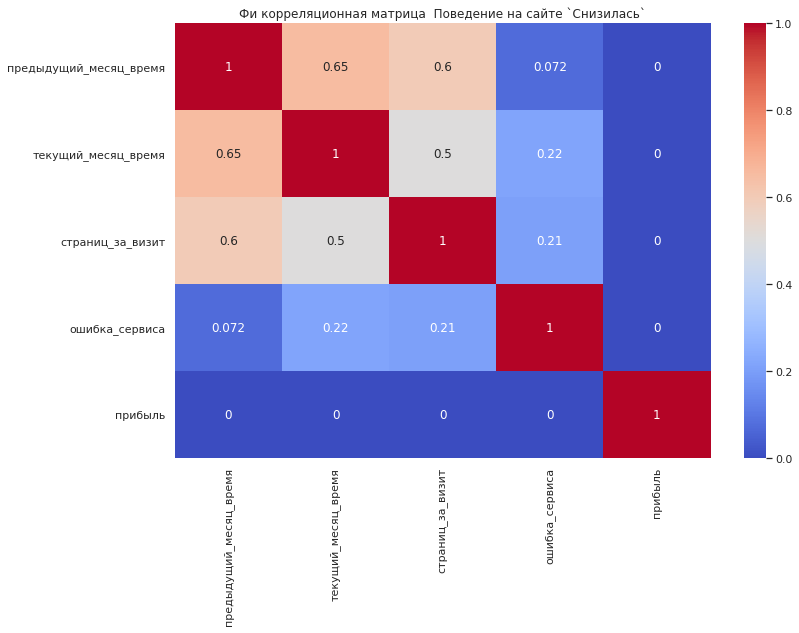

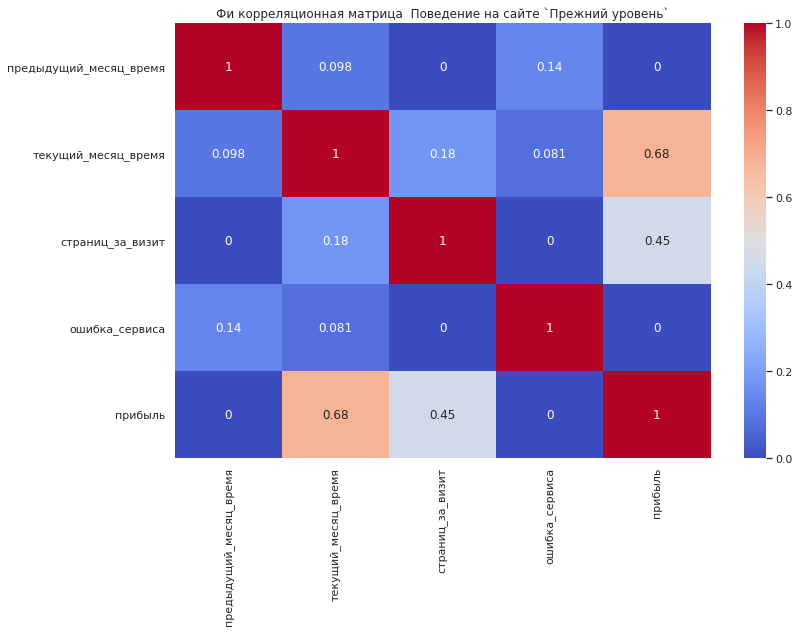

In [161]:
high, low = 'Прежний уровень', 'Снизилась'
plot_fi_matrix(df_metrics, [], 
               'Фи корреляционная матрица  Поведение на сайте')

plot_fi_matrix(df_metrics[df_metrics['покупательская_активность'] == low], 
                [], 
               f'Фи корреляционная матрица  Поведение на сайте `{low}`')

plot_fi_matrix(df_metrics[df_metrics['покупательская_активность'] == high], 
                [], 
               f'Фи корреляционная матрица  Поведение на сайте `{high}`')

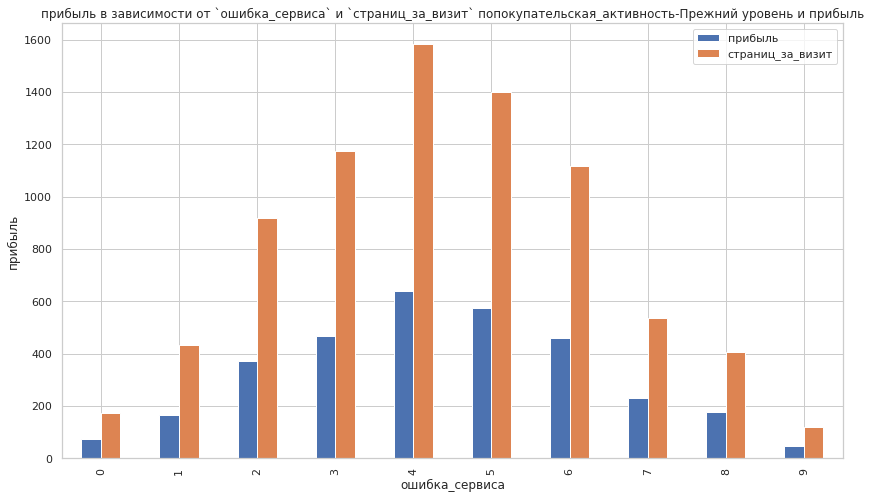

In [195]:
df_metrics[df_metrics['покупательская_активность'] == high].pivot_table(index='ошибка_сервиса', 
#                    columns='страниц_за_визит',
                   values=['прибыль','страниц_за_визит'], aggfunc='sum').plot(kind='bar', figsize=(14, 8))
pb.title('прибыль в зависимости от `ошибка_сервиса` и `страниц_за_визит` по'\
         f'покупательская_активность-{high} и прибыль')
pb.legend()
pb.ylabel('прибыль')
pb.show()





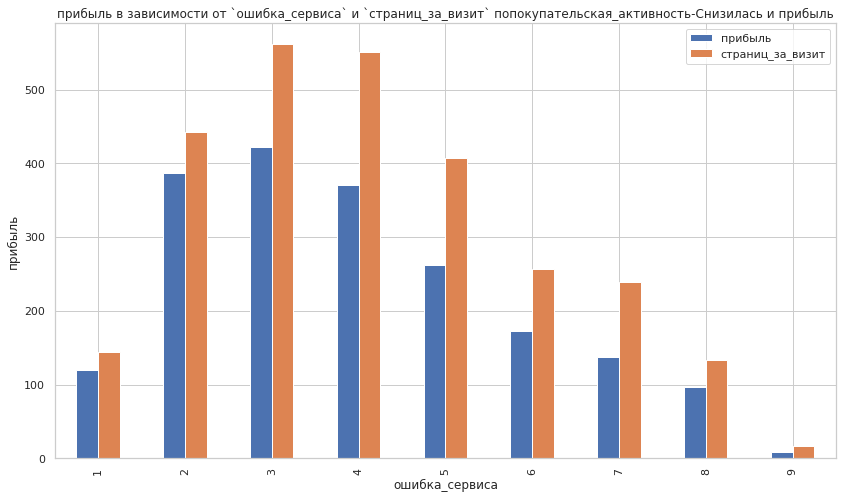

In [197]:
df_metrics[df_metrics['покупательская_активность'] == low].pivot_table(index='ошибка_сервиса', 
#                    columns='страниц_за_визит',
                   values=['прибыль','страниц_за_визит'], aggfunc='sum').plot(kind='bar', figsize=(14, 8))
pb.title('прибыль в зависимости от `ошибка_сервиса` и `страниц_за_визит` по'\
         f'покупательская_активность-{low} и прибыль')
pb.legend()
pb.ylabel('прибыль')
pb.show()

- При рассмотрении прибыль в зависимости от `ошибка_сервиса` и `страниц_за_визит` по `покупательская_активность` -`осталось прежней` и прибыль можно рассмотреть тенденцию к уменьшению количества запросов при и прибыли, тоесть динамика количества `страниц за визит` и `падает` с увеличением количества `ошибок сервиса` при количестве ошибок >4:

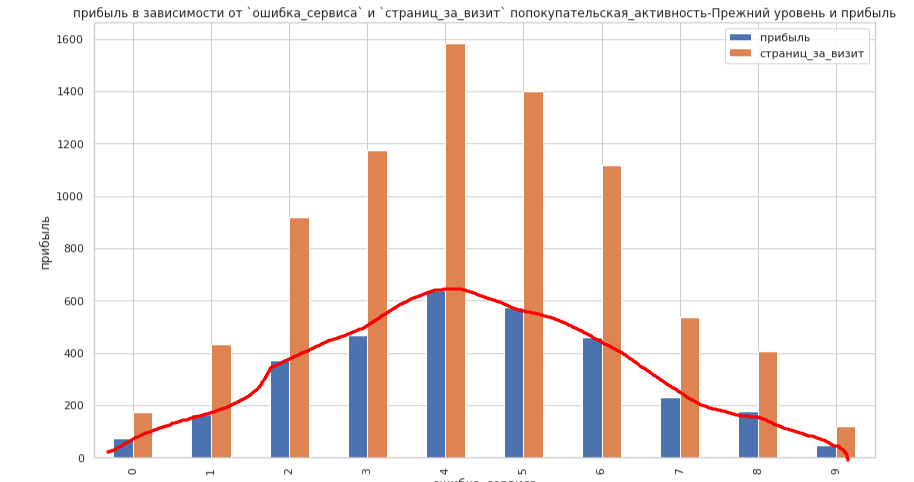

- При рассмотрении прибыль в зависимости от `ошибка_сервиса` и `страниц_за_визит` по `покупательская_активность` -`снизилась` и прибыль можно рассмотреть тенденцию к уменьшению количества запросов при и прибыли, тоесть динамика количества `страниц за визит` и `падает` с увеличением количества `ошибок сервиса` при количестве ошибок >3:    

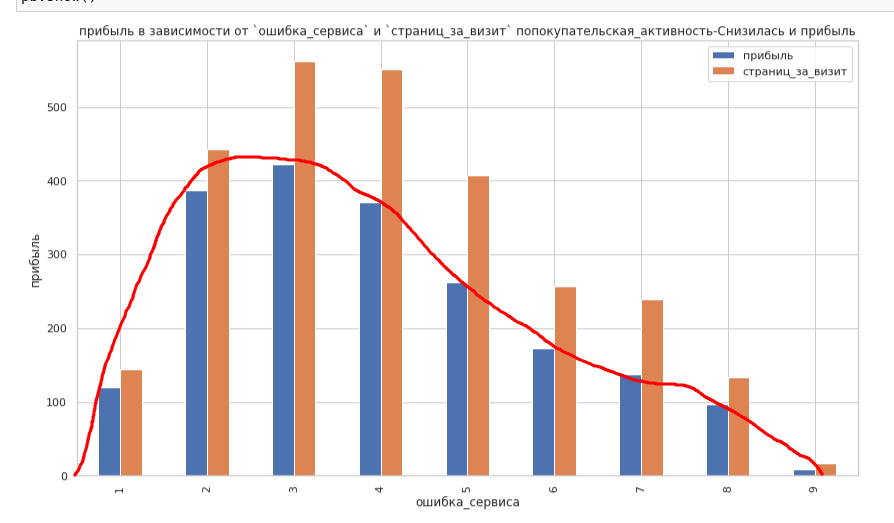



### Финансовое положение

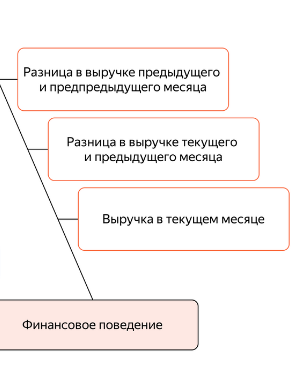

In [215]:
cols_financial = ['текущий_месяц_выручка', 'предыдущий_месяц_выручка', 
               'препредыдущий_месяц_выручка']
cols_target = ['покупательская_активность', 'прибыль']
df_financial = df_full_new.copy().drop(['id'], axis=1)[cols_financial + cols_target]
df_financial.tail()

текущий_месяц_выручка  предыдущий_месяц_выручка  \
1291                 4741.7                    3664.0   
1292                 5353.0                    4729.0   
1293                 5139.2                    5160.0   
1294                 5224.6                    4923.0   
1295                 4448.3                    4720.0   

      препредыдущий_месяц_выручка покупательская_активность  прибыль  
1291                       4704.0           Прежний уровень     4.44  
1292                       5299.0           Прежний уровень     6.11  
1293                       5334.0           Прежний уровень     3.29  
1294                       4725.0           Прежний уровень     4.03  
1295                       5183.0           Прежний уровень     3.28

In [257]:
col_mt_3, col_mt_2, col_mt_1 = 'препредыдущий_месяц_выручка', 'предыдущий_месяц_выручка', 'текущий_месяц_выручка'
col_mt_5, col_mt_6, col_mt_7 = 'разница_3_2_abs', 'разница_2_1_abs', 'разница_3_1_abs'
col_mt_8, col_mt_9, col_mt_10 = 'разница_3_2_pct', 'разница_2_1_pct', 'разница_3_1_pct'

df_financial[col_mt_5] = df_financial[col_mt_2] - df_financial[col_mt_3]
df_financial[col_mt_6] = df_financial[col_mt_1] - df_financial[col_mt_2]
df_financial[col_mt_7] = df_financial[col_mt_1] - df_financial[col_mt_3]

df_financial[col_mt_8] = ((df_financial[col_mt_2] - df_financial[col_mt_3]) / df_financial[col_mt_2]) 
df_financial[col_mt_9] = ((df_financial[col_mt_1] - df_financial[col_mt_2]) / df_financial[col_mt_1]) 
df_financial[col_mt_10] = ((df_financial[col_mt_1] - df_financial[col_mt_3]) / df_financial[col_mt_1]) 

df_financial.head()

текущий_месяц_выручка  предыдущий_месяц_выручка  \
0                 4971.6                    5216.0   
1                 5058.4                    5457.5   
2                 6610.4                    6158.0   
3                 5872.5                    5807.5   
4                 5388.5                    4738.5   

   препредыдущий_месяц_выручка покупательская_активность  прибыль  \
0                       4472.0                 Снизилась     4.16   
1                       4826.0                 Снизилась     3.13   
2                       4793.0                 Снизилась     4.87   
3                       4594.0                 Снизилась     4.21   
4                       5124.0                 Снизилась     3.95   

   разница_3_2_abs  разница_2_1_abs  разница_3_2_pct  разница_2_1_pct  \
0            744.0           -244.4         0.142638        -0.049159   
1            631.5           -399.1         0.115712        -0.078898   
2           1365.0            452.4         0.221663         0.068438   
3           1213.5             65.0         0.208954         0.011069   
4           -385.5            650.0        -0.081355         0.120627   

   разница_3_1_pct  разница_3_1_abs  
0         0.100491            499.6  
1         0.045943            232.4  
2         0.274930           1817.4  
3         0.217710           1278.5  
4         0.049086            264.5

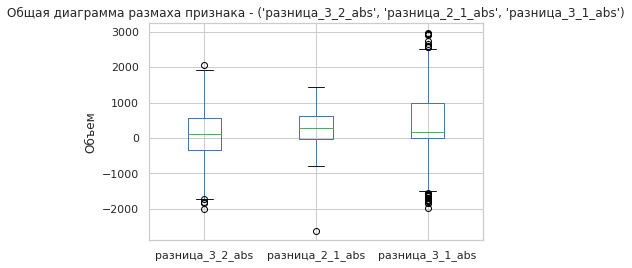

In [258]:
df_financial[[col_mt_5, col_mt_6, col_mt_7]].plot(kind='box')
pb.title(f"Общая диаграмма размаха для - {col_mt_5, col_mt_6, col_mt_7}")
pb.ylabel("Объем")
pb.show()

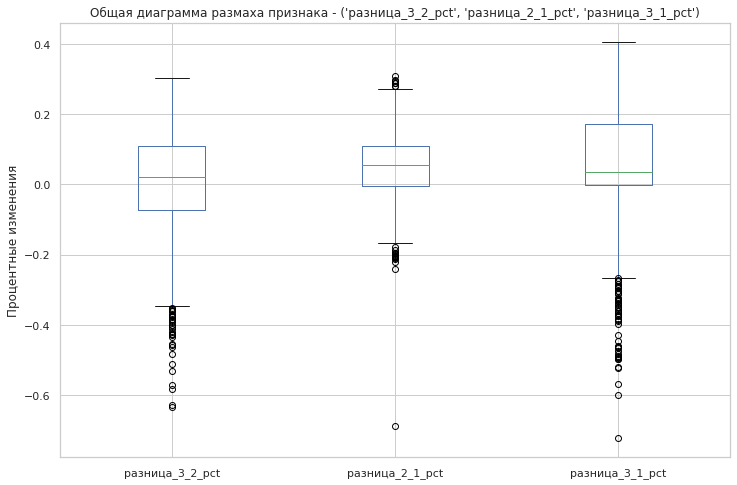

In [259]:
df_financial[[col_mt_8, col_mt_9, col_mt_10]].plot(kind='box', figsize=(12, 8))
pb.title(f"Общая диаграмма размаха для - {col_mt_8, col_mt_9, col_mt_10}")
pb.ylabel("Процентные изменения")
pb.show()

In [280]:
def show_pct_stats(col_name): 
    pct_high = df_financial[df_financial[col_name] >= 0][col_name]
    pct_low =  df_financial[df_financial[col_name] <=0][col_name]
    print(f'{col_name} Общая положительных сумма %-ых изменений - {pct_high.sum()}, отрицательных - {pct_low.sum()} ')
    print(f'{col_name} Общая положительных сумма %-ых изменений количественно'\
          f'- {len(pct_high)}, отрицательных - {len(pct_low)}')
    perc = len(pct_high) / (len(pct_high) + len(pct_low))
    print(f'Общее количество процентных изменений для колонки - {col_name}: {perc}')

show_pct_stats(col_mt_8)

разница_3_2_pct Общая положительных сумма %-ых изменений - 76.69798646739113, отрицательных - -71.3015455802705 
разница_3_2_pct Общая положительных сумма %-ых изменений количественно- 721, отрицательных - 577
Общее количество процентных изменений для колонки - разница_3_2_pct: 0.5554699537750385


In [281]:
show_pct_stats(col_mt_9)

разница_2_1_pct Общая положительных сумма %-ых изменений - 85.28493780880942, отрицательных - -21.557515059015454 
разница_2_1_pct Общая положительных сумма %-ых изменений количественно- 950, отрицательных - 348
Общее количество процентных изменений для колонки - разница_2_1_pct: 0.7318952234206472


In [282]:
show_pct_stats(col_mt_10)

разница_3_1_pct Общая положительных сумма %-ых изменений - 118.08477255896612, отрицательных - -48.69139398214206 
разница_3_1_pct Общая положительных сумма %-ых изменений количественно- 958, отрицательных - 338
Общее количество процентных изменений для колонки - разница_3_1_pct: 0.7391975308641975


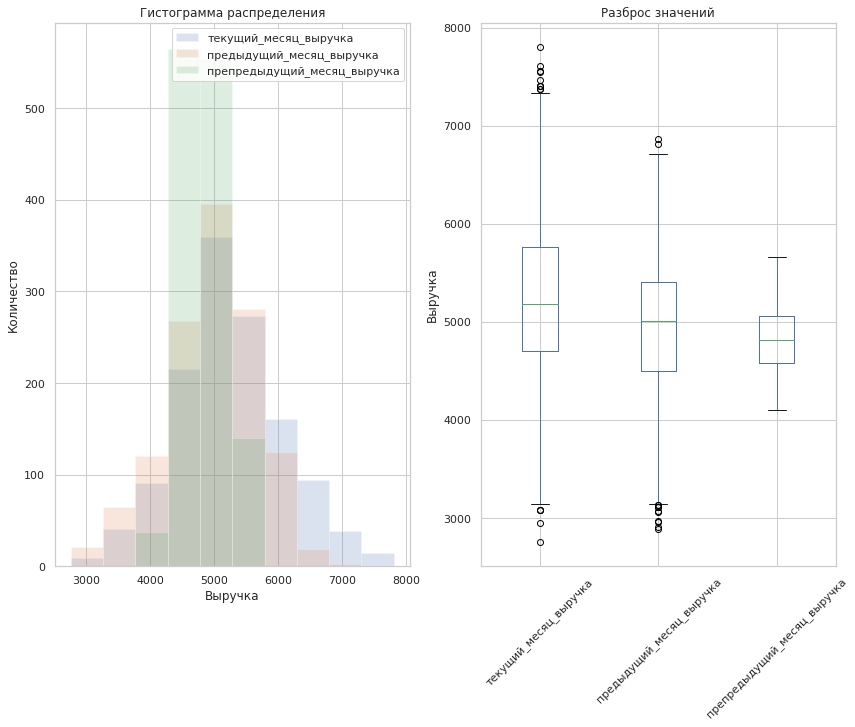

In [270]:
fig, axes = pb.subplots(nrows=1, ncols=2, figsize=(14,10))
df_financial[cols_financial].plot(kind='hist', bins=10, ax=axes[0], alpha=0.2)
axes[0].set_title('Гистограмма распределения')
axes[0].set_ylabel('Количество')
axes[0].set_xlabel('Выручка')
df_financial[cols_financial].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений')
axes[1].set_ylabel('Выручка')
pb.show()

- `разница_3_2_pct` Общая положительных сумма %-ых изменений - 76.69798646739113, отрицательных - -71.3015455802705 
  `разница_3_2_pct` Общая положительных сумма %-ых изменений количественно- 721, отрицательных - 577
  Общее количество процентных изменений для колонки - `разница_3_2_pct`: 0.5554699537750385

- `разница_2_1_pct` Общая положительных сумма %-ых изменений - 85.28493780880942, отрицательных -     -21.557515059015454 
  `разница_2_1_pct` Общая положительных сумма %-ых изменений количественно- 950, отрицательных - 348
  Общее количество процентных изменений для колонки - `разница_2_1_pct`: 0.7318952234206472

- `разница_3_1_pct` Общая положительных сумма %-ых изменений - 118.08477255896612, отрицательных - -48.69139398214206 
  Общая положительных сумма %-ых изменений количественно- 958, отрицательных - 338
  Общее количество процентных изменений для колонки - `разница_3_1_pct`: 0.7391975308641975


### Вероятностное снижение активности

In [306]:
df_pred = df_full_new.copy().drop(['id'], axis=1)
predicts = model_best.predict_proba(
    df_pred.drop(
        ['прибыль',  'покупательская_активность'], axis=1
    )
)[:,1]
df_pred['прогноз'] = predicts
median_profit = df_pred['прибыль'].median()

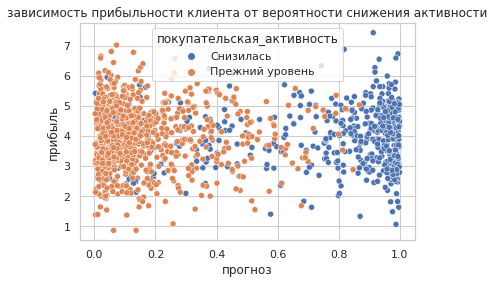

In [358]:
sns.scatterplot(data=df_pred, x='прогноз', y="прибыль", hue=f"покупательская_активность", )
pb.title('зависимость прибыльности клиента от вероятности снижения активности')
pb.show()

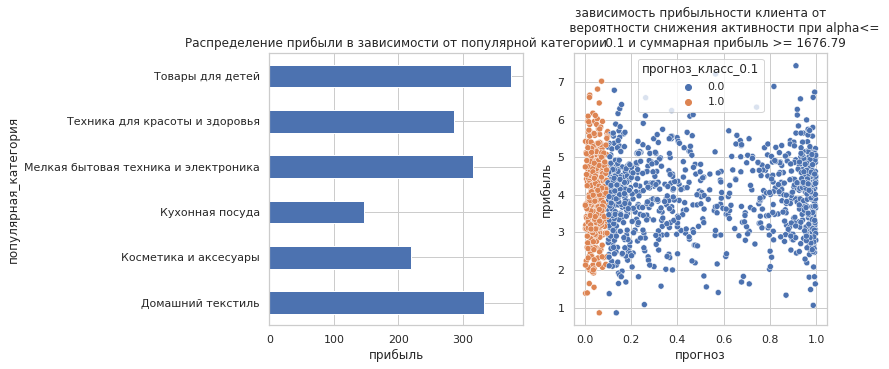

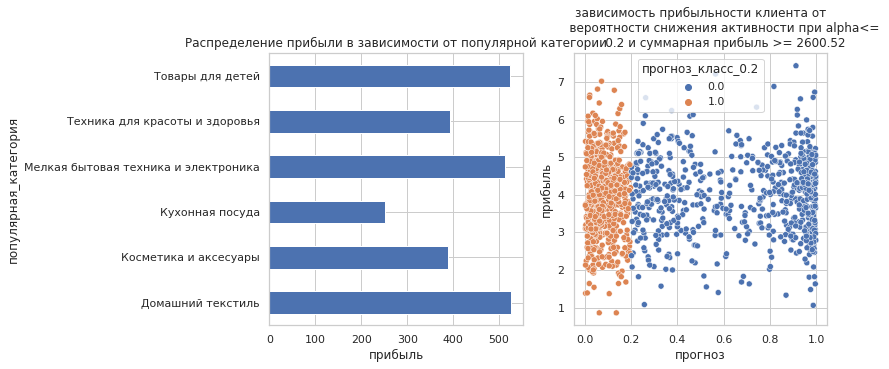

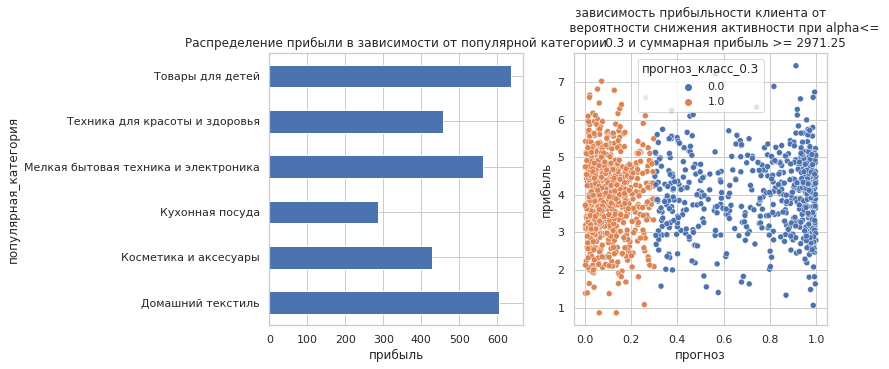

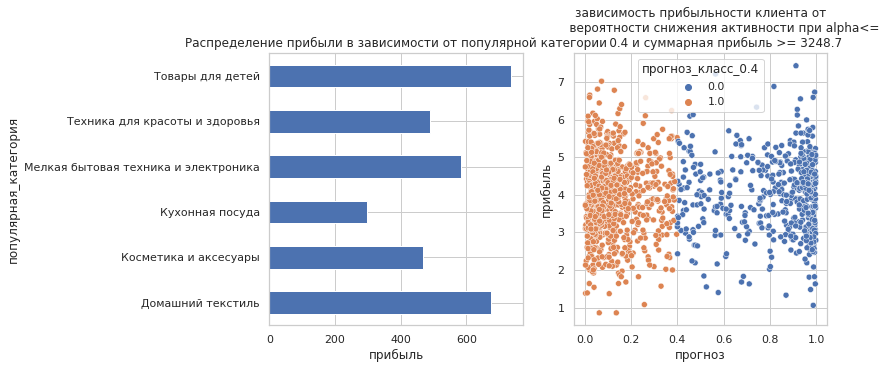

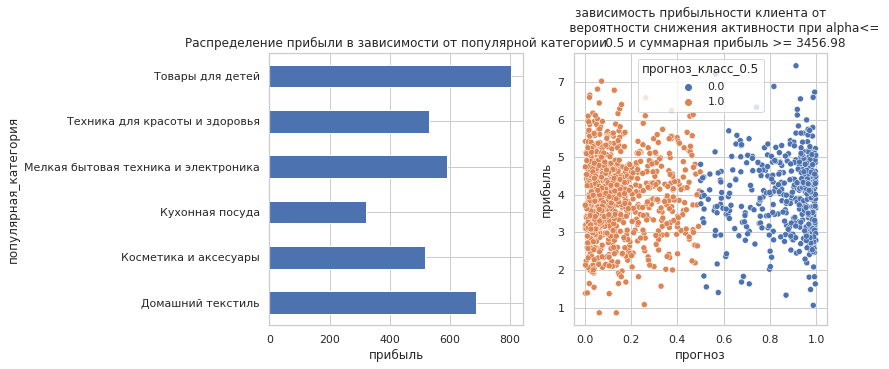

In [351]:
for x in range(1, 6): 
    value = x / 10
    fig, axes = pb.subplots(nrows=1, ncols=2, figsize=(10,5))
    df_pred[f'прогноз_класс_{value}'] = np.zeros(len(df_pred))
    df_pred.loc[((df_pred.прогноз <= value)), f'прогноз_класс_{value}'] = 1
    prof_val = df_pred.query(f"прогноз<={value}")
    
    axes[0].set_title('Распределение прибыли в зависимости от популярной категории')
    axes[0].set_xlabel('прибыль')
    prof_val.groupby('популярная_категория').agg('прибыль').sum().plot(kind='barh', ax=axes[0])
    
    sns.scatterplot(data=df_pred, x='прогноз', y="прибыль", hue=f"прогноз_класс_{value}", ax=axes[1])
    pb.title(f'''зависимость прибыльности клиента от
             вероятности снижения активности при alpha<= 
             {value} и суммарная прибыль >= {prof_val['прибыль'].sum()}''')
    pb.show()

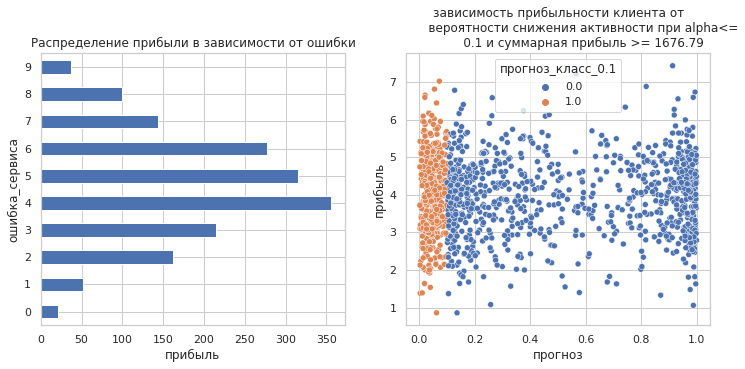

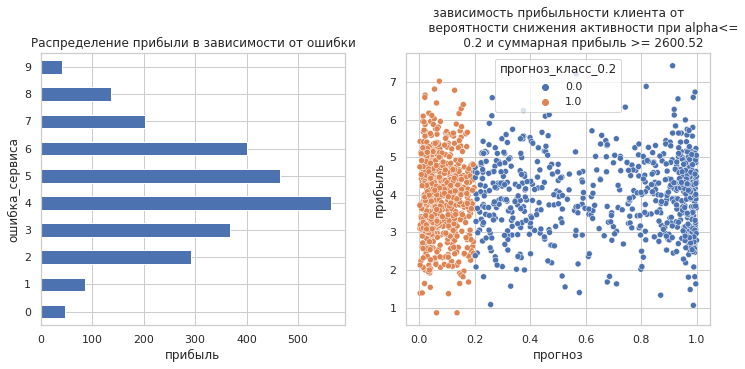

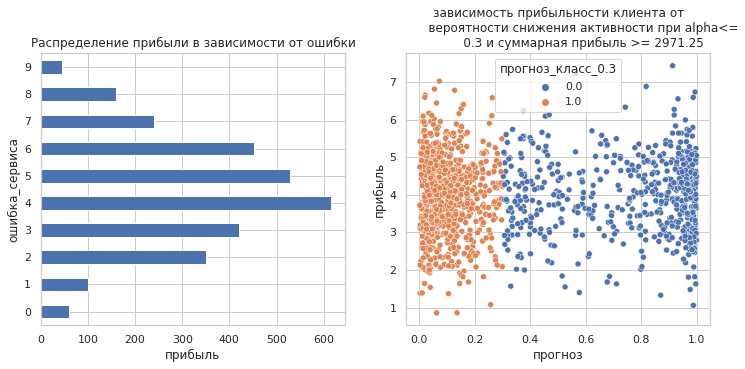

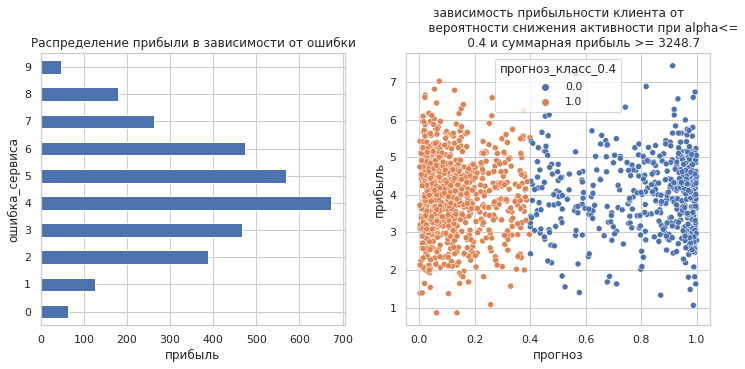

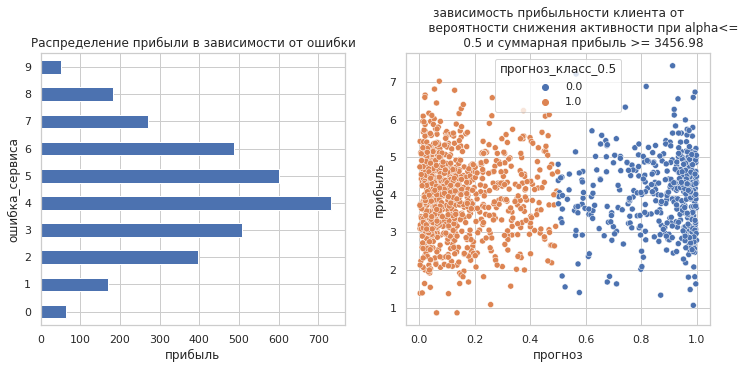

In [361]:
for x in range(1, 6): 
    value = x / 10
    fig, axes = pb.subplots(nrows=1, ncols=2, figsize=(12,5))
    
    df_pred[f'прогноз_класс_{value}'] = np.zeros(len(df_pred))
    df_pred.loc[((df_pred.прогноз <= value)), f'прогноз_класс_{value}'] = 1
    
    prof_val = df_pred.query(f"прогноз<={value}")
    
    axes[0].set_title('Распределение прибыли в зависимости от ошибки')
    axes[0].set_xlabel('прибыль')
    prof_val.groupby('ошибка_сервиса').agg('прибыль').sum().plot(kind='barh', ax=axes[0])
    
    sns.scatterplot(data=df_pred, x='прогноз', y="прибыль", hue=f"прогноз_класс_{value}", ax=axes[1])
    pb.title(f'''зависимость прибыльности клиента от
             вероятности снижения активности при alpha<=
             {value} и суммарная прибыль >= {prof_val['прибыль'].sum()}''')
    pb.show()

- Рекомендации оставить значение aplha при 0.3 и 0.4,  


### __Вывод по cегментации покупателей__

__1. Вывод по анализу страниц_за_визит__

- значение прибыли при снижении покупательской активности при просмотре 4-х страниц за визит;

- значение прибыли при прежнем уровне покупательской активности при просмотре 8-и страниц за визит;

- наименьшая дисперсия прибыли между снижением покупательской активности и прежней покупательской активности составляет при просмотре 6-и страниц за визит;

- наибольшая дисперсия прибыли между снижением покупательской активности и прежней покупательской активности составляет при просмотре 8-и страниц за визит.

__2 Вывод по анализу акционные_покупки__

2.1 Пользователи предпочитающие в основном `акционные покупки` по `прибыли`: 

- группа пользователей которая совершает более 80% `акционных покупок` значитально меньше оставшейся группы, всего 12.8%; 

- `покупательская активность` у группы пользоватей которая совершает в основном `акционные покупки` __снизилась__ на 79.3%, 20.6% из этой группы осталось на __прежнем__ уровне;

2.2 Пользователи которые совершают `акционные покупки` реже по `прибыли`: 

- `покупательская активность` которая осталась __прежней__ в сумме `прибыли` составляет 67.7%; 

- `покупательская активность` которая __снизилась__  в сумме `прибыли` составляет 32.2%; 

__3 Вывод по анализу ошибка_сервиса__

- `прибыль` начинает снижаться при количестве ошибок более 4 по обоим сегментам; 

- наибольшая дисcперсия по `прибыли` между сегментами при 5 ошибках; 

__4. Вывод по анализу рассмотрение корреляций__

- При рассмотрении Фи корреляционной матрицы `снижения` покупательской активности можно заметить что присутствует корреляция на `Длительность`, `маркет_актив_за_6_мес` коррелирует с `акциоными_покупками` а они в свою очередь влияют на `прибыль`; 

- При рассмотрении Фи корреляционной матрицы на `Прежний уровень` покупательской активности, можно заметить корреляцию между `неоплаченные_продукты_штук_квартал` и `прибылью`, также между `прибылью` и `акциоными_покупками` из чего можно сделать вывод что на прежнем уровне `покупальская активность` вероятно осталась при покупках товаров по акции в долг; 

- Наибольшая категория неоплаченных товаров в `товарах для детей`  от 1 до 4 покупок. 

__5 Коммуникация с клиентом__

- Возвожно клиентам не нравиться слишком навязчивая реклама; 
- Прибыль по покупательской активности замечан у пользователей которые находятся зарегестрированными порядка 400 дней; 
- Наибольшая прибыль у группы людей у которых `Разрешить сообщать` - `да` допольнительная `Тип сервиса` - `Стандарт`. 

__6 Продуктовое поведение__

Анализируя продуктовое поведение можно отметить несколько особенностей: 

- Очень высокая корреляция между `прибылью`, `прежним_уровнем` покупательской активности и `неоплаченные_продукты`;

- У `средний_просмотр_категорий_за_визит`  начиная с 3-х страниц характеризуется повышением `прежним_уровнем` покупок и уменьшением снижения: 
![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5-2.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5-2.png)

- При рассомтрении более детально по категориям `средних просмотров` и `покупательская_активность` можно заметить что при трех и четырёх просмотрах сильно выделяется `Мелкая бытовая техника и электроника` на `прежнем уровне` в контексте `покупательской активности` и больших сумм `прибыли`.    


![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5-3.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5-3.png)


- Суммы прибыли довольно высоки при покупке `Товаров для детей`, однако наблюдается корреляция при обоих вариантах `покупательской активности` с `неоплаченные_продукты_штук_квартал`, особенно с группой где `покупательская активность` осталась прежней. 

__7 Поведение на сайте__ 

- При рассмотрении прибыль в зависимости от `ошибка_сервиса` и `страниц_за_визит` по `покупательская_активность` -`осталось прежней` и прибыль можно рассмотреть тенденцию к уменьшению количества запросов при и прибыли, тоесть динамика количества `страниц за визит` и `падает` с увеличением количества `ошибок сервиса` при количестве ошибок >4:

![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5-2.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5-2.png)

- При рассмотрении прибыль в зависимости от `ошибка_сервиса` и `страниц_за_визит` по `покупательская_активность` -`снизилась` и прибыль можно рассмотреть тенденцию к уменьшению количества запросов при и прибыли, тоесть динамика количества `страниц за визит` и `падает` с увеличением количества `ошибок сервиса` при количестве ошибок >3:    

![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png)


__8 Финансовое поведение__ 

- `разница_3_2_pct` Общая положительных сумма %-ых изменений - 76.69798646739113, отрицательных - -71.3015455802705 
  `разница_3_2_pct` Общая положительных сумма %-ых изменений количественно- 721, отрицательных - 577
  Общее количество процентных изменений для колонки - `разница_3_2_pct`: 0.5554699537750385

- `разница_2_1_pct` Общая положительных сумма %-ых изменений - 85.28493780880942, отрицательных -     -21.557515059015454 
  `разница_2_1_pct` Общая положительных сумма %-ых изменений количественно- 950, отрицательных - 348
  Общее количество процентных изменений для колонки - `разница_2_1_pct`: 0.7318952234206472

- `разница_3_1_pct` Общая положительных сумма %-ых изменений - 118.08477255896612, отрицательных - -48.69139398214206 
  Общая положительных сумма %-ых изменений количественно- 958, отрицательных - 338
  Общее количество процентных изменений для колонки - `разница_3_1_pct`: 0.7391975308641975
  

__9 Вероятностное снижение активности__ 

- Рекомендации оставить значение aplha при 0.3 и 0.4, наиболее оптимальное количество прибыли и уменьшен риск ошибок при данных параметрах



__Ввод по сегментации, Рекомендации__

- уменьшить количество ошибок на сайте, хотя бы 3; 

- рассмотреть будут ли оплаченны в дальнейшем неоплаченные покупки, исходя из этого уже делать вывод о необходимости делать такую рекламу с акционными покупками; 

- при маркетинговой рекламе обратить внимание на акции связанные с детскими товарами; 

- стараться проводить маркетинговую компанию менее агрессивно. 




## Общий вывод

__Цель проекта:__

Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

___Вывод по предобработке данных:___

- У датафреймов `df_file`, `df_mark_money`, `df_time`, `df_money` отуствуют явные дубликаты;
- У датафреймов `df_file`, `df_mark_money`, `df_time`, `df_money` отуствуют пропуски; 
- у датафрейма df_file в колонке `тип_сервиса` присутсвовал неявный дубликат `стандартт` который был заменён на `стандарт`; 
- у датафрейма df_mark_money в колонке `период` присутсвовал неявный дубликат `препредыдущий_месяц` который был заменён на `предыдущий_месяц`; 
- у датафрейма df_time в колонке `период` присутсвовал неявный дубликат `предыдцщий_месяц` который был заменён на `предыдущий_месяц`; 
- у датафрейма `df_money` в значениях колонки `прибыль` присутствовала `,` она была заменена на `.` и тип данных колонки был заменён на `float64`. 


___Вывод по исследовательскому анализу данных:___

Описание колонок датафрейма _`df_file`_: 

1.1 `покупательская_активность`:

- Распределение неравномерное;
- У 61.7 % пользователей покупательская активность осталась на прежнем уровне, а у 38.3 % пользователей снизилась. 
1.2 `тип_сервиса`:

- Распределение неравномерное;
- У 71.1 % пользователей сервис типа `стандарт`, а у 28.9 % пользователей `премиум`. 

1.3 `разрешить_сообщать`:

- Распределение неравномерное;
- 74 % пользователей можно присылать дополнительные предложения о товаре `да`, а у 26 % пользователей `нет`. 

1.4 `маркет_актив_6_мес`:

- По гистограмме колонка немного скошенна влево; 
- Медианное значение 4.2; 
- В колонке присутствует 36 анамольно низких значений что состовляет `0.027` % от выборки. 

|Показатели       |   маркет_актив_6_мес |
|:------|---------------------:|
| count |           1300       |
| mean  |              4.25377 |
| std   |              1.01481 |
| min   |              0.9     |
| 25%   |              3.7     |
| 50%   |              4.2     |
| 75%   |              4.9     |
| max   |              6.6     |

1.5 `маркет_актив_тек_мес`:

- Распределение неравномерное, однако количество маркетинговых коммуникаций: `5` и `3` очень близки;
- количество маркетинговых коммуникаций разделено на три группы: `5`(24.8%), `4`(51.5%), `3`(23.7%). 

1.6 `длительность`:
- Гистограмма распределения показывает равномерное распределение;
- В колонке отсутствуют выбросы; 
- Диапазон регистрации пользователей с 110 до 1079 дней, медианое значение 606. 

|Показатель       |   длительность |
|:------|---------------:|
| count |       1300     |
| mean  |        601.898 |
| std   |        249.856 |
| min   |        110     |
| 25%   |        405.5   |
| 50%   |        606     |
| 75%   |        806     |
| max   |       1079     |

1.7 `акционные_покупки`:
Данную колонку возможно имеет смысл перевести категориальный признак, прослеживается две группы пользователей на гистограмме рис ниже 

![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png)


Хотя также видно что группа пользователей которая совершает акционные покупки меньше.

1.8  `популярная_категория`:
- Колонка относительно нормально распределенна; 
- Товары для детей являются самыми многочисленными за последние 6 мес. и составляют 25.4 % от общего числа.

|      популярная_категория            | Количество             |
|:-------------------------------------|-----------------------:|
| Товары для детей                     |                    330 |
| Домашний текстиль                    |                    251 |
| Косметика и аксесуары                |                    223 |
| Техника для красоты и здоровья       |                    184 |
| Мелкая бытовая техника и электроника |                    174 |
| Кухонная посуда                      |                    138 |

1.9 `популярная_категория`:
- Наиболее многочисленая категория  `3` и составляет 27.4 %; 
- В среднем видно небольшую тенденцию что пользователи больше всего смотрят `2`(24%), `3`( 27.4%), `4`(20.2%) категории товаров и меньше всего `5`(13.6%), `6`(8.2%) и `1`(6.6%).  

| Количество просмотренных категорий   |   средний_просмотр_категорий_за_визит |    средний_просмотр_категорий_за_визит в %       |
|---:|--------------------------------------:|----------:|
|  3 |                                   356 |    27.4%  |
|  2 |                                   312 |    24%    |
|  4 |                                   263 |    20.2%  |
|  5 |                                   177 |    13.6%  |
|  1 |                                   106 |    8.2%   |
|  6 |                                    86 |    6.6%   |

1.10 `неоплаченные_продукты_штук_квартал`:
- Тут показатели данной колонки также можно разделить на большие подгруппы `1`(20.1%) - `4`(15.2%) и `5`(10.4%) - `10`(0.3%); 
- Можно сказать что больше всего польззователи неоплачивают от 1 до 4 товаров за последние три месяца и гараздо реже производят неоплату  от 5 до 10 покупок; 
- Также небольшой процент пользователей не имеет неоплаченных товаров `0`(8.9%). 
| Количество неоплаченных тов   |   неоплаченные_продукты_штук_квартал | неоплаченные_продукты_штук_квартал в %|
|---:|-------------------------------------:|-------------------------------------:|
|  1 |                                  261 |20.1|
|  2 |                                  261 |20.1|
|  3 |                                  218 |16.8|
|  4 |                                  197 |15.2|
|  5 |                                  135 |10.4|
|  0 |                                  116 |8.9|
|  6 |                                   44 |3.4|
|  7 |                                   34 |2.6|
|  8 |                                   20 |1.5|
|  9 |                                   10 |0.8|
| 10 |                                    4 |0.3|

1.11 `неоплаченные_продукты_штук_квартал`:
- Тут показатели данной колонки также можно разделить на большие подгруппы `1`(20.1%) - `4`(15.2%) и `5`(10.4%) - `10`(0.3%); 
- Можно сказать что больше всего польззователи неоплачивают от 1 до 4 товаров за последние три месяца и гараздо реже производят неоплату  от 5 до 10 покупок; 
- Также небольшой процент пользователей не имеет неоплаченных товаров `0`(8.9%). 
| Количество неоплаченных тов   |   неоплаченные_продукты_штук_квартал | неоплаченные_продукты_штук_квартал в %|
|---:|-------------------------------------:|-------------------------------------:|
|  1 |                                  261 |20.1|
|  2 |                                  261 |20.1|
|  3 |                                  218 |16.8|
|  4 |                                  197 |15.2|
|  5 |                                  135 |10.4|
|  0 |                                  116 |8.9|
|  6 |                                   44 |3.4|
|  7 |                                   34 |2.6|
|  8 |                                   20 |1.5|
|  9 |                                   10 |0.8|
| 10 |                                    4 |0.3|

1.12 `страниц_за_визит`:
- На гистограмме распределения показатели смещена вправо; 
- Медианое значение: `8`; 
- Минимальное количество посещенных страниц `1`, максимальное `20`; 
- Стандартное распределение - `3.9` страниц. 

|   Показатели    |   страниц_за_визит |
|:------|-------------------:|
| count |         1300       |
| mean  |            8.17692 |
| std   |            3.97813 |
| min   |            1       |
| 25%   |            5       |
| 50%   |            8       |
| 75%   |           11       |
| max   |           20       |

Описание колонок датафрейма _`df_mark`_:

2.1 `период`:
- Данные о периоде равномерно распределенны по 1200 наблюдений;

2.2 `выручка`:
- В колонки присутсвуют нулевые значения, тоесть у определенных покупателей нет покупок; 
- Также присутствует выброс: один из покупателей потратил 106862 руб; 
- Если убрать нулевые и аномальный выброс гистограмма вуручки распределенна нормально;
- медианная выручка - 4957 руб. 

2.3 `исследование вуручки за три месяца`

Средний и медианный объём выручки растёт от месяца к месяцу, но стоит отметить что в 

- `препредыдущий_месяц` диапазон выручки сегментируется в диапазоне примерно от 4000 до 5600;
- `предыдущий_месяц` диапазон выручки сегментируется в диапазоне примерно от 2800 до 6800;
- `текущий_месяц` диапазон выручки сегментируется в диапазоне примерно от 2700 до 7700.

Также растёт и общая сумма покупок:

| период              |     выручка |
|:--------------------|------------:|
| препредыдущий_месяц |  6272769.0  |
| предыдущий_месяц    |  6417996.5  |
| текущий_месяц       |  6802586.9  |

Описание колонок датафрейма `df_time`:

3.1 `период`:
- Данных о предедущем месяце(1300) столько же сколько и в текущем(1300).

3.2 `минут`:
- Гистограмма нормально распределена с небольшим скосом вправо; 
- Медианое время проведенное пользователем на сайте 13. 

Описание колонок датафрейма `df_money`:

4.1 `прибыль`:
- Гистограмма нормально распределена с небольшим скосом влево; 
- Медианая прибыль: 4.045. 

___Вывод по Корреляционному анализу:___


__Корреляция больше 0.5 для колонки `покупательская_активность`:__

- `маркет_актив_6_мес` корреляция больше 0.5 с колонкой `покупательская_активность`: `0.61`;

- `акционные_покупки` корреляция больше 0.5 с колонкой `покупательская_активность`: `0.68`;

- `средний_просмотр_категорий_за_визит` корреляция больше 0.5 с колонкой `покупательская_активность`: `0.54`;

- `страниц_за_визит` корреляция больше 0.5 с колонкой `покупательская_активность`: `0.75`;

- `предыдущий_месяц_время` корреляция больше 0.5 с колонкой `покупательская_активность`: `0.69`;

- `текущий_месяц_время` корреляция больше 0.5 с колонкой `покупательская_активность`: `0.58`.


__Корреляция больше 0.5 для колонки `длительность`:__
    
- `тип_сервиса` корреляция больше 0.5 с колонкой `длительность`: `0.61`;

- `разрешить_сообщать` корреляция больше 0.5 с колонкой `длительность`: `0.61`;

- `маркет_актив_6_мес` корреляция больше 0.5 с колонкой `длительность`: `0.7`; 

- `маркет_актив_тек_мес` корреляция больше 0.5 с колонкой `длительность`: `0.68`;

- `акционные_покупки` корреляция больше 0.5 с колонкой `длительность`: `0.59`;

- `популярная_категория` корреляция больше 0.5 с колонкой `длительность`: `0.76`;

- `средний_просмотр_категорий_за_визит` корреляция больше 0.5 с колонкой `длительность`: `0.77`;

- `неоплаченные_продукты_штук_квартал` корреляция больше 0.5 с колонкой `длительность`: `0.85`;

- `ошибка_сервиса` корреляция больше 0.5 с колонкой `длительность`: `0.68`;

- `страниц_за_визит` корреляция больше 0.5 с колонкой `длительность`: `0.51`;

- `текущий_месяц_время` корреляция больше 0.5 с колонкой `длительность`: `0.53`;

__Корреляция больше 0.5 для колонки `текущий_месяц_выручка`:__ 

- `предыдущий_месяц_выручка` корреляция больше 0.5 с колонкой `текущий_месяц_выручка`: `0.84`;

__Мультиколлинеарность:__

Мультиколлинеарность не прослеживается, хотя безусловно некоторая взимосвязь между признаками присутствует.


___Итог по использованию piplene:___

- Лучшая модель: `KNeighborsClassifier(n_neighbors=10)`, модель показала результат на тренировочном датасете 89.8%;
- Оценка на тесте `accuracy`: 90.7%; 
- Оценка на тесте `roc_auc`: 92.1%. 



__Вывод по важности признаков:__

1. признаки мало значимы для модели: 

- `популярные категории`; 
- `маркет_актив_тек_мес`; 
- `тип_сервиса`. 

2. признаки сильнее всего влияют на целевой признак: 

- `страниц_за_визит`; 
- `акционные_покупки`;
- `текущий_месяц_время`;

3. как можно использовать эти наблюдения при моделировании и принятии бизнес-решений: 

- `страниц_за_визит`: Компании необходимо обратать внимание на среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца, возможно проанализировать поведение пользователей на сайте;  

- `акционные_покупки`: Также компании следуюет учесть что акционные покупки сильно влияют на целевой признак, возможно делать больше промоакций; 

- `текущий_месяц_время`: также подпадает под логическую категорию `времени` проведенного пользователем на сайте; 

- `ошибка сервиса`: вносит вклад в модель, компании также стоит обратить внимание на ошибки сервиса. 



___Вывод по cегментации покупателей___

__1. Вывод по анализу страниц_за_визит__

- значение прибыли при снижении покупательской активности при просмотре 4-х страниц за визит;

- значение прибыли при прежнем уровне покупательской активности при просмотре 8-и страниц за визит;

- наименьшая дисперсия прибыли между снижением покупательской активности и прежней покупательской активности составляет при просмотре 6-и страниц за визит;

- наибольшая дисперсия прибыли между снижением покупательской активности и прежней покупательской активности составляет при просмотре 8-и страниц за визит.

__2 Вывод по анализу акционные_покупки__

2.1 Пользователи предпочитающие в основном `акционные покупки` по `прибыли`: 

- группа пользователей которая совершает более 80% `акционных покупок` значитально меньше оставшейся группы, всего 12.8%; 

- `покупательская активность` у группы пользоватей которая совершает в основном `акционные покупки` __снизилась__ на 79.3%, 20.6% из этой группы осталось на __прежнем__ уровне;

2.2 Пользователи которые совершают `акционные покупки` реже по `прибыли`: 

- `покупательская активность` которая осталась __прежней__ в сумме `прибыли` составляет 67.7%; 

- `покупательская активность` которая __снизилась__  в сумме `прибыли` составляет 32.2%; 

__3 Вывод по анализу ошибка_сервиса__

- `прибыль` начинает снижаться при количестве ошибок более 4 по обоим сегментам; 

- наибольшая дисcперсия по `прибыли` между сегментами при 5 ошибках; 

__4. Вывод по анализу рассмотрение корреляций__

- При рассмотрении Фи корреляционной матрицы `снижения` покупательской активности можно заметить что присутствует корреляция на `Длительность`, `маркет_актив_за_6_мес` коррелирует с `акциоными_покупками` а они в свою очередь влияют на `прибыль`; 

- При рассмотрении Фи корреляционной матрицы на `Прежний уровень` покупательской активности, можно заметить корреляцию между `неоплаченные_продукты_штук_квартал` и `прибылью`, также между `прибылью` и `акциоными_покупками` из чего можно сделать вывод что на прежнем уровне `покупальская активность` вероятно осталась при покупках товаров по акции в долг; 

- Наибольшая категория неоплаченных товаров в `товарах для детей`  от 1 до 4 покупок. 

__5 Коммуникация с клиентом__

- Возвожно клиентам не нравиться слишком навязчивая реклама; 
- Прибыль по покупательской активности замечан у пользователей которые находятся зарегестрированными порядка 400 дней; 
- Наибольшая прибыль у группы людей у которых `Разрешить сообщать` - `да` допольнительная `Тип сервиса` - `Стандарт`. 

__6 Продуктовое поведение__

Анализируя продуктовое поведение можно отметить несколько особенностей: 

- Очень высокая корреляция между `прибылью`, `прежним_уровнем` покупательской активности и `неоплаченные_продукты`;

- У `средний_просмотр_категорий_за_визит`  начиная с 3-х страниц характеризуется повышением `прежним_уровнем` покупок и уменьшением снижения: 
![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5-2.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5-2.png)

- При рассомтрении более детально по категориям `средних просмотров` и `покупательская_активность` можно заметить что при трех и четырёх просмотрах сильно выделяется `Мелкая бытовая техника и электроника` на `прежнем уровне` в контексте `покупательской активности` и больших сумм `прибыли`.    


![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5-3.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5-3.png)


- Суммы прибыли довольно высоки при покупке `Товаров для детей`, однако наблюдается корреляция при обоих вариантах `покупательской активности` с `неоплаченные_продукты_штук_квартал`, особенно с группой где `покупательская активность` осталась прежней. 

__7 Поведение на сайте__ 

- При рассмотрении прибыль в зависимости от `ошибка_сервиса` и `страниц_за_визит` по `покупательская_активность` -`осталось прежней` и прибыль можно рассмотреть тенденцию к уменьшению количества запросов при и прибыли, тоесть динамика количества `страниц за визит` и `падает` с увеличением количества `ошибок сервиса` при количестве ошибок >4:

![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5-2.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5-2.png)

- При рассмотрении прибыль в зависимости от `ошибка_сервиса` и `страниц_за_визит` по `покупательская_активность` -`снизилась` и прибыль можно рассмотреть тенденцию к уменьшению количества запросов при и прибыли, тоесть динамика количества `страниц за визит` и `падает` с увеличением количества `ошибок сервиса` при количестве ошибок >3:    

![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png)


__8 Финансовое поведение__ 

- `разница_3_2_pct` Общая положительных сумма %-ых изменений - 76.69798646739113, отрицательных - -71.3015455802705 
  `разница_3_2_pct` Общая положительных сумма %-ых изменений количественно- 721, отрицательных - 577
  Общее количество процентных изменений для колонки - `разница_3_2_pct`: 0.5554699537750385

- `разница_2_1_pct` Общая положительных сумма %-ых изменений - 85.28493780880942, отрицательных -     -21.557515059015454 
  `разница_2_1_pct` Общая положительных сумма %-ых изменений количественно- 950, отрицательных - 348
  Общее количество процентных изменений для колонки - `разница_2_1_pct`: 0.7318952234206472

- `разница_3_1_pct` Общая положительных сумма %-ых изменений - 118.08477255896612, отрицательных - -48.69139398214206 
  Общая положительных сумма %-ых изменений количественно- 958, отрицательных - 338
  Общее количество процентных изменений для колонки - `разница_3_1_pct`: 0.7391975308641975
  

__9 Вероятностное снижение активности__ 

- Рекомендации оставить значение aplha при 0.3 и 0.4, наиболее оптимальное количество прибыли и уменьшен риск ошибок при данных параметрах

__10. Рекомендации__

- уменьшить количество ошибок на сайте, хотя бы 3; 

- рассмотреть будут ли оплаченны в дальнейшем неоплаченные покупки, исходя из этого уже делать вывод о необходимости делать такую рекламу с акционными покупками; 

- при маркетинговой рекламе обратить внимание на акции связанные с детскими товарами; 

- стараться проводить маркетинговую компанию менее агрессивно. 